## V1 Data import (Shape)

In [1]:
import sys
if sys.platform=='darwin':
    Dir="/Users/binxu/Documents/TangSM Diphoton Imaging Data Learning/"
    WorkDir="/Users/binxu/Documents/V1 CNN/"
else :
    Dir="D:/CompuNeuroLab/TangSM Diphoton Imaging Data Learning/"


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import copy
import pickle
#/Users/binxu/Documents/TangSM Diphoton Imaging Data Learning/Shape
import scipy.io
NumE = scipy.io.loadmat(Dir+"Shape/NumE.mat")
NumO = scipy.io.loadmat(Dir+"Shape/NumO.mat")
FullRsp = scipy.io.loadmat(Dir+"Shape/Rsp8OT5S.mat")

NumO=NumO['NumO']
NumE=NumE['NumE']
FullRsp=FullRsp['Rsp8OT5S']
NumT=NumO+NumE

Data shape 1142 neurons, 9500 stimuli, and maximally 8 trials.  

In [219]:
FullRsp.shape

(1142, 8, 9500)

### Exclude zero trial

For same stimuli, there is several trials and the variability is bit.
And Neural network is deterministic, so we can only fit the mean. 
(Maybe the variance can be used as weight)

Note that some neurons sometimes has **no signal/trial**, so we must exclude them when averaging

In [220]:
np.nonzero(NumT==0)

(array([ 98,  98,  98, ..., 763, 763, 763]),
 array([  10,   11,   12, ..., 9477, 9478, 9479]))

In [221]:
np.unique(np.nonzero(NumT==0)[0])

array([ 98, 148, 643, 703, 763])

In [222]:
LostId=np.unique(np.nonzero(NumT==0)[0])
Msk=np.asarray([i not in LostId for i in range(1142)])

In [223]:
CorrTabInv=np.arange(1142)[Msk]# cid before=CorrTabInv[cid after ommission]

In [224]:
NNSelec=len(SelAvgRsp)

In [225]:
SelAvgRsp=FullRsp[Msk,:,:].sum(axis=1)/NumT[Msk,:]

### Mean, Std of each neuron

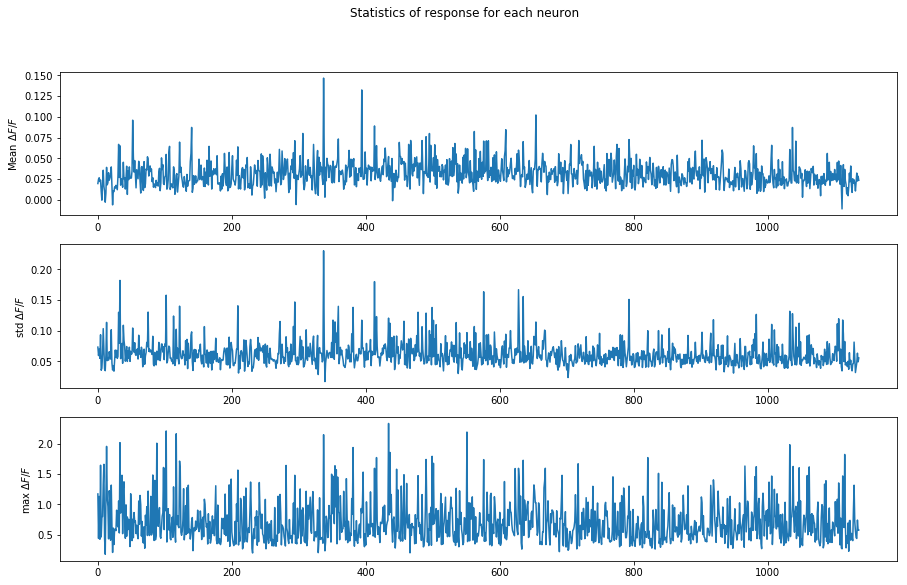

In [8]:
plt.figure(figsize=[15,9])
plt.suptitle("Statistics of response for each neuron")
plt.subplot(3,1,1)
plt.plot(SelAvgRsp.mean(axis=1))
plt.ylabel(r"Mean $\Delta F/F$")
plt.subplot(3,1,2)
plt.plot(SelAvgRsp.std(axis=1))
plt.ylabel(r"std $\Delta F/F$")
plt.subplot(3,1,3)
plt.plot(SelAvgRsp.max(axis=1))
plt.ylabel(r"max $\Delta F/F$")
plt.show()

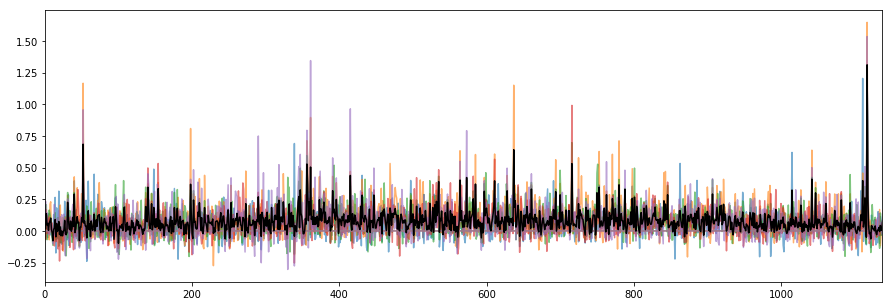

In [215]:
si=6550#1925
plt.figure(figsize=[15,5])
for i in range(8):
    plt.plot(FullRsp[:,i,si],alpha=0.6)
plt.plot(FullRsp[:,:,si].sum(axis=1)/NumT[:,si],color='black')
plt.xlim(0,NNSelec)
plt.savefig("Typical Neural response.png")
plt.show()

### Sparsity 

In [200]:
Thr=0.11
RspPeakcnt=len((FullRsp>0.2).nonzero()[0])
print("Threshold:%.1f\tSparsity:%.4f"%(Thr,RspPeakcnt/NumT.sum()))

Threshold:0.1	Sparsity:0.0635


In [216]:
SelAvgRsp.mean(axis=0)[6550]

0.076831445922156391

## Read in Shapes Stimuli

In [9]:
Stimuli = scipy.io.loadmat(Dir+"Shape/Shapedata.mat")
Stimuli = Stimuli['ShapeStimi']

In [10]:
Stimuli.shape

(9500, 160, 160)

In [60]:
Stimuli.dtype

dtype('uint8')

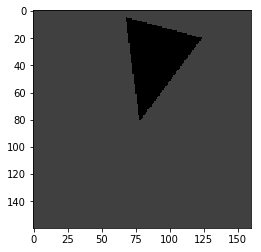

In [28]:
si=1938
plt.figure()
plt.imshow(Stimuli[si,:,:],cmap=plt.cm.gray,vmin=0,vmax=256)
plt.show()

### Receptive Field Estimation-Response Weighted Average

In [29]:
AvgStimi=(64-Stimuli.mean(axis=0))/64
NormStimuli=(64-Stimuli)/64

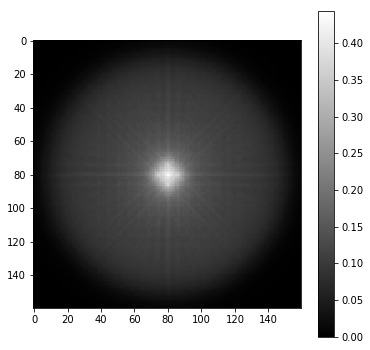

In [218]:
plt.figure(figsize=[6,6])
plt.imshow(AvgStimi,cmap=plt.cm.gray)#,vmin=0,vmax=256
plt.colorbar()
plt.show()

In [39]:
plt.savefig(WorkDir+"StimAvgNormThr0.1/"+str(ci)+"RF.png")

In [42]:
len(SelAvgRsp)

1137

In [37]:
NormStimuli.shape

(9500, 160, 160)

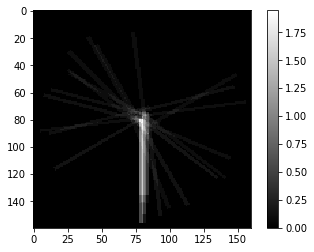

In [41]:
ci=130
Msk=(SelAvgRsp[ci,:]<=0.1)
ThrRsp=SelAvgRsp[ci,:].copy()
ThrRsp[Msk]=0
meanRsp=ThrRsp.mean()
WAvgStimi=np.einsum('i,ijk',ThrRsp,NormStimuli)#/len(Stimuli)/AvgStimi#/meanRsp
plt.figure()
plt.imshow(WAvgStimi,cmap=plt.cm.gray)#,vmin=0,vmax=256
plt.colorbar()
plt.show()

In [43]:
#ci=300
Thr=0.1
for ci in range(len(SelAvgRsp)):
    Msk=(SelAvgRsp[ci,:]<=0.1)
    ThrRsp=SelAvgRsp[ci,:].copy()
    ThrRsp[Msk]=0
    meanRsp=ThrRsp.mean()
    WAvgStimi=np.einsum('i,ijk',ThrRsp,NormStimuli)/len(Stimuli)/AvgStimi#/meanRsp
    plt.figure()
    plt.imshow(WAvgStimi,cmap=plt.cm.gray)#,vmin=0,vmax=256
    plt.colorbar()
    plt.savefig(WorkDir+"RF_StimAvgNormThr0.1/"+str(ci)+"RF.png")
    plt.close()
#plt.show()
# 结果很好的ci 102 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [27]:
WAvgStimi

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

### Weighted average stimuli for each class

In [123]:
TotNoList=[1040,2630,2000,480,2400,120,240,240,1950]
sum(TotNoList)

11100

In [129]:
def WeightAvgStimuli(indtups,Norm=True,MaxNorm=True,PixFreqNorm=False,title="",ax=None,plt=None):
    '''Norm+MaxNorm= Rsp*Imagearr/L/MaxW'''
    if type(indtups) is tuple:
        beg,end=indtups
        WAvgStimi=np.einsum('i,ijk',ThrRsp[beg:end],NormStimuli[beg:end,:,:])
        SumStimi=NormStimuli[beg:end,:,:].sum(axis=0)
        L=end-beg
        SelecRsp=Rspi[beg:end]  # Mean and std is calculated with original non-thresholded response
    else:     
        WAvgStimi=np.zeros_like(NormStimuli[0,:,:])
        SumStimi=np.zeros_like(WAvgStimi)
        L=0
        SelecRsp=[]
        for tup in indtups:
            beg,end=tup
            WAvgStimi=WAvgStimi+np.einsum('i,ijk',ThrRsp[beg:end],NormStimuli[beg:end,:,:])
            SumStimi=SumStimi+NormStimuli[beg:end,:,:].sum(axis=0)
            L+=end-beg
            SelecRsp+=list(Rspi[beg:end])
        SelecRsp=np.array(SelecRsp)
    maxRsp=ThrRsp.max()# Use the max response in 
    if Norm:
        WAvgStimi/=L
    if MaxNorm:
        WAvgStimi/=maxRsp# 最小是0
    if PixFreqNorm:
        WAvgStimi=(WAvgStimi)/(AvgStimi+0.001)#((SumStimi+1)/L)
    if not ax is None:
        Stat=(SelecRsp.max(),SelecRsp.mean(),SelecRsp.std())
        plt.imshow(WAvgStimi,cmap=plt.cm.gray)#,vmin=0,vmax=256
        plt.title(title+" SignifN:%d"%( (SelecRsp>Thr).sum() ))
        plt.xlabel("Max:%.3f Mean:%.3f Std:%.3f" % Stat)
        plt.xticks([])
        plt.yticks([])
        plt.colorbar()
        Stat+=((SelecRsp>Thr).sum(),)
        SelecRsp[(SelecRsp<Thr)]=0
        Stat+=(SelecRsp.sum(),SelecRsp.mean())
    return WAvgStimi,Stat


#
for ci in range(NNSelec):#[171]:
    Thr=0.1
    Rspi=SelAvgRsp[ci,:]
    Msk=(Rspi<=0.1)
    ThrRsp=Rspi.copy()
    ThrRsp[Msk]=0
    maxlist=[];meanlist=[];signNolist=[];sumrsplist=[]
    plt.figure(figsize=[25,14])
    plt.suptitle("Cell id:%d MaxRsp:%.3f Mean:%.3f Std:%.3f SigNum:%d" % (ci,ThrRsp.max(),Rspi.mean(),Rspi.std(),sum(Rspi>Thr)))
    plt.subplot(451)
    AllAvgStimi,Stat=WeightAvgStimuli((0,9500),title="Overall",plt=plt,ax=axtmp,PixFreqNorm=True)
    plt.subplot(452)
    AngAvgStimi,Stat=WeightAvgStimuli((560,1600),title="Line/Orientation",plt=plt,ax=axtmp,PixFreqNorm=True)
    maxlist+=[Stat[0]];meanlist+=[Stat[5]];signNolist+=[Stat[3]];sumrsplist+=[Stat[4]]
    plt.subplot(453)
    MultiAngAvgStimi,Stat=WeightAvgStimuli((3920,6550),title="Multi-line",plt=plt,ax=axtmp,PixFreqNorm=True)
    maxlist+=[Stat[0]];meanlist+=[Stat[5]];signNolist+=[Stat[3]];sumrsplist+=[Stat[4]]
    plt.subplot(454)
    TriangAvgStimi,Stat=WeightAvgStimuli((1600,3600),title="Triangle",plt=plt,ax=axtmp,PixFreqNorm=True)
    maxlist+=[Stat[0]];meanlist+=[Stat[5]];signNolist+=[Stat[3]];sumrsplist+=[Stat[4]]
    plt.subplot(455)
    CurvAvgStimi,Stat=WeightAvgStimuli((8110,8590),title="Curvature",plt=plt,ax=axtmp)
    maxlist+=[Stat[0]];meanlist+=[Stat[5]];signNolist+=[Stat[3]];sumrsplist+=[Stat[4]]
    plt.subplot(456)
    SectAvgStimi,Stat=WeightAvgStimuli([(0,80),(1600,3920)],title="Sector",plt=plt,ax=axtmp)
    maxlist+=[Stat[0]];meanlist+=[Stat[5]];signNolist+=[Stat[3]];sumrsplist+=[Stat[4]]
    plt.subplot(457)
    GratAvgStimi,Stat=WeightAvgStimuli([(240,320),(7590,7630)],title="Grating",plt=plt,ax=axtmp)
    maxlist+=[Stat[0]];meanlist+=[Stat[5]];signNolist+=[Stat[3]];sumrsplist+=[Stat[4]]
    plt.subplot(458)
    PointAvgStimi,Stat=WeightAvgStimuli((7630,7870),title="Round Point",plt=plt,ax=axtmp)
    maxlist+=[Stat[0]];meanlist+=[Stat[5]];signNolist+=[Stat[3]];sumrsplist+=[Stat[4]]
    plt.subplot(459)
    RingAvgStimi,Stat=WeightAvgStimuli((7870,8110),title="Ring Point",plt=plt,ax=axtmp)
    maxlist+=[Stat[0]];meanlist+=[Stat[5]];signNolist+=[Stat[3]];sumrsplist+=[Stat[4]]
    plt.subplot(4,5,10)
    MiscAvgStimi,Stat=WeightAvgStimuli([(6550,7590),(8590,9500)],title="Miscellany",plt=plt,ax=axtmp)
    maxlist+=[Stat[0]];meanlist+=[Stat[5]];signNolist+=[Stat[3]];sumrsplist+=[Stat[4]]
    plt.subplot(234)
    index = np.arange(9)
    bar_width = 0.35;opacity = 0.8
    plt.bar(index, maxlist, bar_width,alpha=opacity,color='b',label='Max')
    plt.bar(index + bar_width, meanlist, bar_width, alpha=opacity,color='g',label='Mean')
    plt.xlabel('Shape Class')
    plt.ylabel('Rsponse')
    plt.xticks(index + bar_width/2, ('Line', 'Multiline', 'Triangle', 'Curvature', 'Sector', 'Grating', 'Round', 'Ring', 'Misc'))
    plt.legend()
    plt.subplot(235)
    plt.bar(index, signNolist, bar_width,alpha=opacity,color='red',label='Significant Response No')
    plt.xlabel('Shape Class')
    plt.ylabel('Rsponse')
    plt.xticks(index + bar_width/2, ('Line', 'Multiline', 'Triangle', 'Curvature', 'Sector', 'Grating', 'Round', 'Ring', 'Misc'))
    plt.legend()
    plt.subplot(236)
    plt.bar(index + bar_width, sumrsplist, bar_width, alpha=opacity,color='black',label='Summed Rsp')
    plt.xlabel('Shape Class')
    plt.ylabel('Rsponse')
    plt.xticks(index + bar_width/2, ('Line', 'Multiline', 'Triangle', 'Curvature', 'Sector', 'Grating', 'Round', 'Ring', 'Misc'))
    plt.legend()
    #plt.tight_layout()
    plt.savefig(WorkDir+"StimRspProfileThr0.1/"+str(ci)+"RspProf.png")
    #plt.show()
    plt.close()

* No. 113 Typical simple cell no complex feature driving it
* Triangle and Sector selecting neurons are different from those selecting lines and Multilines
* No. 117 Round and Shade selecting
* No. 122 line and edge selecting
* No. 141,757 Grating selection
* No. 301,308 2 triangle tuning/two shade edge
* No. 315 2 Orientation tuning! 
* No. 328 Curvature Tuning, and everything
* No. 337 Vigorous neuron to everything
* No. 362 Orthogonal Orientation tuning
* No. 368 Round Ring Selection
* No. 413 Edge and Shade tuning
* No. 448,616,634,739,967 Typical simple orientation tuning cell (**All complex feature are simple in his eyes**)
* No. 461 Prefer triangle is different from preferred orientation, Curvature selection
* No. 478 Round point selection
* No. 499,523,584,597,612,780,837,920,926,1034,1035,1037,1038,1062,1104 Ring and Round  **Complementary Selectivity**,
* No. 512 Ring Tuning
* No. 559,852,1087 **Curvature Selection**
* No. 572 No Line orientation selection, only shading triangle
* No. 628 Strong line tuning weak shade tuning
* No. 648,780 Shade Tuning
* No. 652,809 Round Point Tuning regardless of position
* No. 726 Ring Responding! 
* NO. 815 only tuning to line, not HO
* No. 833 Ring Round responding
* No. 835,937 Ring Responding!!! Very vigorously
* No. 837 Orientation and Shade edge tuning
* No. 873 Sector Selection
* No. 934 Ring and Curvature tuning
* No. 967 seems like simple cell, Vigorous to complex stimuli, also to Orientation
* No. 979 Vigorous to everything
* No. 1086 Round but not Ring
* No. 1113 Only multiline not single line
* No. 1115, 1120, 1129, 1131. 1135 Ring Responding

Inspiration
* If multiline profile looks like single line profile, then it may respond to single orientation instead of certain combination of orientations! 
* Some Neuron only respond to shade stimuli not line stimuli (*Large spatial frequency*)
* Complementary selectivity may due to respond to shade area insdead of edge!!!! 
* Multiline usually more vigorous than single line recurrent? 

In [ ]:
del NormStimuli

### Different Class Response Statistics as signature

In [143]:
Rayind=np.arange(560,1600)
Lineind=np.hstack((np.arange(80,240),np.arange(320,560))) # Short thick line and long line
MultiLineind=np.arange(3920,6630)# Angle, Multiline angle and Radiation lines
Triangind=np.arange(1600,3600)
Sectorind=np.hstack((np.arange(0,80),np.arange(1600,3920)))
Curvind=np.hstack((np.arange(8110,8590),np.arange(8590,8605))) # Curve + Diffraction/Rings
Gratind=np.arange(7590,7630) # 1D+2D Grating
Roundind=np.arange(7630,7870) 
Ringind=np.hstack((np.arange(7870,8110),np.arange(240,320)))
EyeBrow=np.arange(9245,9485)
LineGratind=np.arange(6630,7590)
RoundSemiind=np.arange(8605,8925) # Semi circle +- Round
RoundRadiind=np.arange(8925,9245)

In [153]:
RspClassStat=np.zeros((NNSelec,4,len(IndexSetList)))

In [155]:
IndexSetList=[Rayind,Lineind,MultiLineind,Triangind,Sectorind,Curvind,Gratind,Roundind,Ringind,EyeBrow,LineGratind,RoundSemiind,RoundRadiind]
for ci in range(NNSelec):
    for ind,i in zip(IndexSetList,range(len(IndexSetList))):
        RspClassStat[ci,:,i]=[SelAvgRsp[ci,ind].max(),SelAvgRsp[ci,ind].mean(),SelAvgRsp[ci,ind].sum(),sum(SelAvgRsp[ci,ind]>Thr)]

In [196]:
SignNo=(SelAvgRsp>=Thr).sum(axis=1)

### Clustering Neuron by their Bar plot or Feature trans vector

In [186]:
from sklearn.cluster import AgglomerativeClustering,KMeans
AggCluster=KMeans(n_clusters=8)#AgglomerativeClustering(n_clusters=10)

In [193]:
AggCluster.fit(RspClassStat.reshape(NNSelec,-1))
BarStatlab=AggCluster.labels_

In [194]:
[(AggCluster.labels_==i).nonzero()[0] for i in range(10)]

[array([   7,   28,   32,   35,   56,   57,   59,   60,   63,   72,   77,
          79,   85,   92,   94,   97,  109,  114,  117,  129,  133,  135,
         146,  148,  150,  153,  160,  167,  173,  174,  175,  186,  188,
         211,  243,  250,  254,  255,  286,  293,  301,  305,  333,  340,
         346,  354,  355,  365,  391,  396,  397,  420,  423,  424,  474,
         477,  478,  480,  488,  509,  512,  513,  526,  529,  542,  546,
         548,  554,  572,  577,  584,  587,  593,  605,  612,  637,  640,
         647,  652,  653,  676,  697,  698,  711,  717,  723,  725,  728,
         748,  755,  758,  764,  769,  770,  771,  780,  786,  792,  799,
         811,  817,  820,  829,  837,  850,  853,  857,  860,  861,  865,
         878,  881,  882,  885,  888,  896,  898,  904,  910,  912,  915,
         919,  921,  930,  951,  953,  960,  968,  977,  985,  993, 1007,
        1011, 1012, 1017, 1020, 1032, 1034, 1045, 1051, 1059, 1093, 1099,
        1124]),
 array([  38,   40,   

In [189]:
CNNFeatTransW=modelvis.feattrans.data.t().numpy()

In [190]:
AggCluster.fit(CNNFeatTransW)
CNNlab=AggCluster.labels_
[(AggCluster.labels_==i).nonzero()[0] for i in range(10)]

[array([   8,   31,   52,   71,   75,   77,   91,  101,  114,  117,  135,
         150,  189,  255,  330,  342,  351,  358,  359,  381,  392,  416,
         477,  485,  488,  512,  523,  525,  530,  542,  564,  595,  617,
         629,  631,  663,  667,  668,  691,  721,  776,  778,  788,  792,
         815,  823,  824,  833,  837,  845,  853,  866,  881,  886,  898,
         958,  963, 1006, 1015, 1047, 1059, 1093, 1102, 1104, 1106]),
 array([   2,    7,   20,   26,   46,   53,   56,   66,   72,   74,   85,
          88,  100,  102,  133,  134,  138,  139,  143,  146,  153,  162,
         166,  167,  228,  243,  253,  281,  294,  301,  302,  306,  322,
         328,  337,  349,  382,  396,  407,  410,  415,  438,  439,  441,
         445,  473,  481,  484,  503,  514,  518,  535,  545,  550,  554,
         562,  571,  580,  587,  590,  612,  619,  621,  626,  636,  648,
         670,  676,  706,  718,  723,  725,  748,  757,  766,  775,  780,
         782,  810,  818,  821,  825,  862

In [191]:
'''Test the correspondence of the 2 clustering feature set'''
from sklearn import metrics
metrics.adjusted_rand_score(CNNlab, BarStatlab) 

0.14357770241026666

## Neural Network Model Building Site

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import Parameter
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn.functional as F

In [131]:
StimTsr = torch.from_numpy((64-Stimuli[:,:,:])/64)# Convert to tensor and Change to variable
#StimTsr.byte()# This Tensor by default is ByteTensor, actually it can be a boolean :(

In [132]:
StimTsr=StimTsr.contiguous().view(9500,1,160,160).float() # Must add contiguous Transform or view() will raise error

In [133]:
# Add Threshold to fit the peaks only, not the noises
Thr=0.11
SparsSelAvgRsp=SelAvgRsp.copy()# Note to add copy!! 
Msk=SparsSelAvgRsp<Thr
SparsSelAvgRsp[Msk]=0
SparsSelAvgRsp=torch.from_numpy(SparsSelAvgRsp).float()
#SelAvgRsp.t()

In [24]:
Thr=0.11
SupraThrStimNo=(SelAvgRsp>Thr).sum(axis=1)

In [15]:
SelAvgRsp.shape

(1137, 9500)

In [27]:
sum(SupraThrStimNo<500)

429

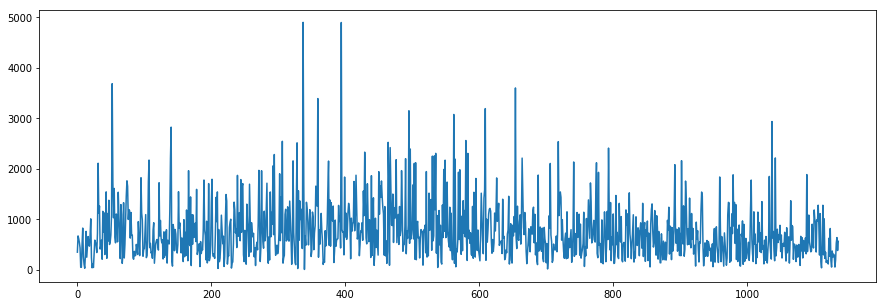

In [25]:
plt.figure(figsize=[15,5])
plt.plot(SupraThrStimNo)
plt.hlines(100)
plt.show()

### Models

In [84]:
cnn = models.vgg19(pretrained=True).features

## Dataset prepare

In [13]:
from torch.utils.data import TensorDataset,DataLoader
from torch.utils.data.sampler import RandomSampler

In [14]:
#ShapeDataset=TensorDataset(StimTsr,SelAvgRsp.t())
ShapeDataset=TensorDataset(StimTsr,SparsSelAvgRsp.t())

Random sampling to separate training and testing set
Note!! some neurons' response is too sparse so we must select response that is none zero

In [211]:
p=0.2# Test Sample size
idx=np.random.binomial(1,p,(9500)).astype(np.bool)
#ind=np.random.choice(9500,int(9500*p),replace=False,p=None)
ind=np.arange(9500)[idx]# Test id List
nind=np.arange(9500)[np.logical_not(idx)]
#for i in range(9500):
#   if i not in ind:
#      nind.append(i)
# Training id List
#vind=np.random.choice(nind,int(len(nind)*p),replace=False,p=None)
idx=np.random.binomial(1,0.2,(len(nind))).astype(np.bool)
vind=nind[idx]
nind=nind[np.logical_not(idx)]

In [212]:
print("Training Set #:%d Validation Set #:%d Test Set #:%d "%(len(nind),len(vind),len(ind)))

Training Set #:6052 Validation Set #:1503 Test Set #:1945 


In [20]:
TrainDataset=TensorDataset(StimTsr[nind,:,:,:],SparsSelAvgRsp[:,nind].t())
ValidDataset=TensorDataset(StimTsr[vind,:,:,:],SparsSelAvgRsp[:,vind].t())
TestDataset=TensorDataset(StimTsr[ind,:,:,:],SparsSelAvgRsp[:,ind].t())

In [21]:
batch_size=200
train_loader=DataLoader(TrainDataset, batch_size=batch_size, shuffle=True, drop_last=False)
valid_loader=DataLoader(ValidDataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader=DataLoader(TestDataset, batch_size=batch_size, shuffle=True, drop_last=False)

## Wrapping

Credit goes to https://github.com/pytorch/examples/blob/master/mnist/main.py

In [198]:
import torch.nn.functional as F

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        self.conv2=nn.Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        #self.conv3=nn.Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.fc1 = nn.Linear(20*20*20,1142-5)

    def forward(self, x):
        B,C,H,W=x.size()
        x = F.relu(F.max_pool2d(self.conv1(x),(4,4)))# 40*40*10 # Pooling相当于Stride?
        x = F.relu(F.max_pool2d(self.conv2(x),(2,2)))# 20*20*20
        #x = F.relu(F.max_pool2d(self.conv3(x),(2,2)))# 20*20*20
        x = x.view(B*C,-1)
        x = nn.functional.leaky_relu(self.fc1(x),negative_slope=0.1,inplace=True)
        return x

model = Net()

In [18]:
# Initialization Scaling
model.conv1.weight.data.normal_(mean=0,std=1)
model.conv1.bias.data.normal_(mean=0,std=1)
model.conv2.weight.data.normal_(mean=0,std=1)
model.conv2.bias.data.normal_(mean=0,std=1)
model.fc1.weight.data.normal_(mean=0,std=0.0001)


 1.3148e-04  9.7856e-05  1.1544e-04  ...   1.8265e-05  1.6509e-05 -1.4568e-04
-4.9060e-05 -5.7093e-05 -9.0685e-05  ...  -1.5231e-05 -6.5272e-07  9.6130e-05
-2.3866e-05  8.3032e-05  1.6861e-04  ...   1.6635e-04  1.6248e-05  1.4151e-04
                ...                   ⋱                   ...                
 1.2609e-04 -1.5223e-04  1.2191e-06  ...   8.1815e-06  8.6434e-05 -4.4533e-07
 1.3538e-04 -1.1395e-04 -4.7265e-05  ...   6.0729e-05 -8.4132e-05 -6.3719e-05
-4.1481e-05  1.9321e-04  1.9727e-04  ...   1.3884e-04  1.9253e-04 -9.4517e-05
[torch.FloatTensor of size 1137x8000]

In [199]:
model(StimTsrSlice)

Variable containing:
  0.0000   0.0000   0.0000  ...    0.0000   3.3307   7.5825
  0.0000   0.0000   0.0000  ...    0.0000   7.5551   5.6877
  0.0000   0.0000   1.0882  ...    0.0000   4.4222   3.6006
           ...               ⋱              ...            
  0.0000   3.0352   0.0000  ...    0.0000   6.3304   9.7863
  0.0000   0.0000   0.0119  ...    0.0000   6.3991   9.9737
  0.0000   0.1910   0.0000  ...    0.0000   7.8033   9.6250
[torch.FloatTensor of size 100x1137]

## Training

In [100]:
Learn_rate=0.05
optimizer = optim.SGD(model.parameters(),lr=Learn_rate,momentum=0.9)#, lr=args.lr, momentum=args.momentum)
def train(epoch,iteration=1):
    model.train()
    for j in range(epoch):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = Variable(data), Variable(target) 
            for i in range(iteration):
                optimizer.zero_grad()
                output = model(data)
                loss = nn.functional.mse_loss(output, target)
                #loss=((output-target)**4).sum()/len(target)/1000
                loss.backward()
                optimizer.step()
                #if i % 10 == 0:
                #    print('Iteration: {} \t Loss: {:.6f}'.format(
                #        i,loss.data[0]))
            if batch_idx%5==0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    j, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.data[0]))

In [26]:
train(50,2)# lr=0.01

Train Epoch: 0 [0/6650 (0%)]	Loss: 0.048185
Train Epoch: 0 [500/6650 (7%)]	Loss: 22.042112
Train Epoch: 0 [1000/6650 (15%)]	Loss: 2.862102
Train Epoch: 0 [1500/6650 (22%)]	Loss: 0.519925
Train Epoch: 0 [2000/6650 (30%)]	Loss: 0.093888
Train Epoch: 0 [2500/6650 (37%)]	Loss: 0.086553
Train Epoch: 0 [3000/6650 (45%)]	Loss: 0.070796
Train Epoch: 0 [3500/6650 (52%)]	Loss: 0.054770
Train Epoch: 0 [4000/6650 (60%)]	Loss: 0.037101
Train Epoch: 0 [4500/6650 (67%)]	Loss: 0.043369
Train Epoch: 0 [5000/6650 (75%)]	Loss: 0.021696
Train Epoch: 0 [5500/6650 (82%)]	Loss: 0.019301
Train Epoch: 0 [6000/6650 (90%)]	Loss: 0.011209
Train Epoch: 0 [6500/6650 (97%)]	Loss: 0.012916
Train Epoch: 1 [0/6650 (0%)]	Loss: 0.009614
Train Epoch: 1 [500/6650 (7%)]	Loss: 0.010048
Train Epoch: 1 [1000/6650 (15%)]	Loss: 0.011656
Train Epoch: 1 [1500/6650 (22%)]	Loss: 0.009986
Train Epoch: 1 [2000/6650 (30%)]	Loss: 0.008581
Train Epoch: 1 [2500/6650 (37%)]	Loss: 0.014931
Train Epoch: 1 [3000/6650 (45%)]	Loss: 0.007870
Tra

Train Epoch: 12 [2000/6650 (30%)]	Loss: 0.003770
Train Epoch: 12 [2500/6650 (37%)]	Loss: 0.003517
Train Epoch: 12 [3000/6650 (45%)]	Loss: 0.003764
Train Epoch: 12 [3500/6650 (52%)]	Loss: 0.003304
Train Epoch: 12 [4000/6650 (60%)]	Loss: 0.003674
Train Epoch: 12 [4500/6650 (67%)]	Loss: 0.003792
Train Epoch: 12 [5000/6650 (75%)]	Loss: 0.003778
Train Epoch: 12 [5500/6650 (82%)]	Loss: 0.003533
Train Epoch: 12 [6000/6650 (90%)]	Loss: 0.003527
Train Epoch: 12 [6500/6650 (97%)]	Loss: 0.003966
Train Epoch: 13 [0/6650 (0%)]	Loss: 0.003577
Train Epoch: 13 [500/6650 (7%)]	Loss: 0.003450
Train Epoch: 13 [1000/6650 (15%)]	Loss: 0.004091
Train Epoch: 13 [1500/6650 (22%)]	Loss: 0.003935
Train Epoch: 13 [2000/6650 (30%)]	Loss: 0.003619
Train Epoch: 13 [2500/6650 (37%)]	Loss: 0.003412
Train Epoch: 13 [3000/6650 (45%)]	Loss: 0.003621
Train Epoch: 13 [3500/6650 (52%)]	Loss: 0.003407
Train Epoch: 13 [4000/6650 (60%)]	Loss: 0.003620
Train Epoch: 13 [4500/6650 (67%)]	Loss: 0.003953
Train Epoch: 13 [5000/6650

Train Epoch: 24 [2500/6650 (37%)]	Loss: 0.003278
Train Epoch: 24 [3000/6650 (45%)]	Loss: 0.003258
Train Epoch: 24 [3500/6650 (52%)]	Loss: 0.002981
Train Epoch: 24 [4000/6650 (60%)]	Loss: 0.003217
Train Epoch: 24 [4500/6650 (67%)]	Loss: 0.003216
Train Epoch: 24 [5000/6650 (75%)]	Loss: 0.003261
Train Epoch: 24 [5500/6650 (82%)]	Loss: 0.003533
Train Epoch: 24 [6000/6650 (90%)]	Loss: 0.003390
Train Epoch: 24 [6500/6650 (97%)]	Loss: 0.003088
Train Epoch: 25 [0/6650 (0%)]	Loss: 0.003165
Train Epoch: 25 [500/6650 (7%)]	Loss: 0.003057
Train Epoch: 25 [1000/6650 (15%)]	Loss: 0.003556
Train Epoch: 25 [1500/6650 (22%)]	Loss: 0.003241
Train Epoch: 25 [2000/6650 (30%)]	Loss: 0.003202
Train Epoch: 25 [2500/6650 (37%)]	Loss: 0.003088
Train Epoch: 25 [3000/6650 (45%)]	Loss: 0.003098
Train Epoch: 25 [3500/6650 (52%)]	Loss: 0.003405
Train Epoch: 25 [4000/6650 (60%)]	Loss: 0.003333
Train Epoch: 25 [4500/6650 (67%)]	Loss: 0.003282
Train Epoch: 25 [5000/6650 (75%)]	Loss: 0.003255
Train Epoch: 25 [5500/6650

Train Epoch: 36 [3000/6650 (45%)]	Loss: 0.002999
Train Epoch: 36 [3500/6650 (52%)]	Loss: 0.003130
Train Epoch: 36 [4000/6650 (60%)]	Loss: 0.003030
Train Epoch: 36 [4500/6650 (67%)]	Loss: 0.003008
Train Epoch: 36 [5000/6650 (75%)]	Loss: 0.003224
Train Epoch: 36 [5500/6650 (82%)]	Loss: 0.003090
Train Epoch: 36 [6000/6650 (90%)]	Loss: 0.002716
Train Epoch: 36 [6500/6650 (97%)]	Loss: 0.002720
Train Epoch: 37 [0/6650 (0%)]	Loss: 0.002814
Train Epoch: 37 [500/6650 (7%)]	Loss: 0.003050
Train Epoch: 37 [1000/6650 (15%)]	Loss: 0.003029
Train Epoch: 37 [1500/6650 (22%)]	Loss: 0.003214
Train Epoch: 37 [2000/6650 (30%)]	Loss: 0.002948
Train Epoch: 37 [2500/6650 (37%)]	Loss: 0.003197
Train Epoch: 37 [3000/6650 (45%)]	Loss: 0.002981
Train Epoch: 37 [3500/6650 (52%)]	Loss: 0.003055
Train Epoch: 37 [4000/6650 (60%)]	Loss: 0.003035
Train Epoch: 37 [4500/6650 (67%)]	Loss: 0.003061
Train Epoch: 37 [5000/6650 (75%)]	Loss: 0.003331
Train Epoch: 37 [5500/6650 (82%)]	Loss: 0.003018
Train Epoch: 37 [6000/6650

Train Epoch: 48 [3500/6650 (52%)]	Loss: 0.002750
Train Epoch: 48 [4000/6650 (60%)]	Loss: 0.002767
Train Epoch: 48 [4500/6650 (67%)]	Loss: 0.002704
Train Epoch: 48 [5000/6650 (75%)]	Loss: 0.002882
Train Epoch: 48 [5500/6650 (82%)]	Loss: 0.002807
Train Epoch: 48 [6000/6650 (90%)]	Loss: 0.002717
Train Epoch: 48 [6500/6650 (97%)]	Loss: 0.002841
Train Epoch: 49 [0/6650 (0%)]	Loss: 0.002847
Train Epoch: 49 [500/6650 (7%)]	Loss: 0.002707
Train Epoch: 49 [1000/6650 (15%)]	Loss: 0.002948
Train Epoch: 49 [1500/6650 (22%)]	Loss: 0.002769
Train Epoch: 49 [2000/6650 (30%)]	Loss: 0.002835
Train Epoch: 49 [2500/6650 (37%)]	Loss: 0.002862
Train Epoch: 49 [3000/6650 (45%)]	Loss: 0.002948
Train Epoch: 49 [3500/6650 (52%)]	Loss: 0.002778
Train Epoch: 49 [4000/6650 (60%)]	Loss: 0.002833
Train Epoch: 49 [4500/6650 (67%)]	Loss: 0.002762
Train Epoch: 49 [5000/6650 (75%)]	Loss: 0.002712
Train Epoch: 49 [5500/6650 (82%)]	Loss: 0.002762
Train Epoch: 49 [6000/6650 (90%)]	Loss: 0.002968
Train Epoch: 49 [6500/6650

In [101]:
train(250,1)# lr=0.05

Train Epoch: 0 [0/6650 (0%)]	Loss: 0.002931
Train Epoch: 0 [500/6650 (7%)]	Loss: 0.002783
Train Epoch: 0 [1000/6650 (15%)]	Loss: 0.002948
Train Epoch: 0 [1500/6650 (22%)]	Loss: 0.002863
Train Epoch: 0 [2000/6650 (30%)]	Loss: 0.002801
Train Epoch: 0 [2500/6650 (37%)]	Loss: 0.002990
Train Epoch: 0 [3000/6650 (45%)]	Loss: 0.002984
Train Epoch: 0 [3500/6650 (52%)]	Loss: 0.002712
Train Epoch: 0 [4000/6650 (60%)]	Loss: 0.003235
Train Epoch: 0 [4500/6650 (67%)]	Loss: 0.002824
Train Epoch: 0 [5000/6650 (75%)]	Loss: 0.002915
Train Epoch: 0 [5500/6650 (82%)]	Loss: 0.003059
Train Epoch: 0 [6000/6650 (90%)]	Loss: 0.002980
Train Epoch: 0 [6500/6650 (97%)]	Loss: 0.002705
Train Epoch: 1 [0/6650 (0%)]	Loss: 0.003066
Train Epoch: 1 [500/6650 (7%)]	Loss: 0.002792
Train Epoch: 1 [1000/6650 (15%)]	Loss: 0.002749
Train Epoch: 1 [1500/6650 (22%)]	Loss: 0.002660
Train Epoch: 1 [2000/6650 (30%)]	Loss: 0.002838
Train Epoch: 1 [2500/6650 (37%)]	Loss: 0.002854
Train Epoch: 1 [3000/6650 (45%)]	Loss: 0.003034
Trai

Train Epoch: 12 [2000/6650 (30%)]	Loss: 0.002378
Train Epoch: 12 [2500/6650 (37%)]	Loss: 0.002577
Train Epoch: 12 [3000/6650 (45%)]	Loss: 0.002674
Train Epoch: 12 [3500/6650 (52%)]	Loss: 0.002542
Train Epoch: 12 [4000/6650 (60%)]	Loss: 0.002564
Train Epoch: 12 [4500/6650 (67%)]	Loss: 0.002715
Train Epoch: 12 [5000/6650 (75%)]	Loss: 0.002766
Train Epoch: 12 [5500/6650 (82%)]	Loss: 0.002891
Train Epoch: 12 [6000/6650 (90%)]	Loss: 0.002670
Train Epoch: 12 [6500/6650 (97%)]	Loss: 0.002635
Train Epoch: 13 [0/6650 (0%)]	Loss: 0.002635
Train Epoch: 13 [500/6650 (7%)]	Loss: 0.002388
Train Epoch: 13 [1000/6650 (15%)]	Loss: 0.002541
Train Epoch: 13 [1500/6650 (22%)]	Loss: 0.002654
Train Epoch: 13 [2000/6650 (30%)]	Loss: 0.002603
Train Epoch: 13 [2500/6650 (37%)]	Loss: 0.002424
Train Epoch: 13 [3000/6650 (45%)]	Loss: 0.002711
Train Epoch: 13 [3500/6650 (52%)]	Loss: 0.002801
Train Epoch: 13 [4000/6650 (60%)]	Loss: 0.002646
Train Epoch: 13 [4500/6650 (67%)]	Loss: 0.002631
Train Epoch: 13 [5000/6650

Train Epoch: 24 [2500/6650 (37%)]	Loss: 0.002619
Train Epoch: 24 [3000/6650 (45%)]	Loss: 0.002625
Train Epoch: 24 [3500/6650 (52%)]	Loss: 0.002331
Train Epoch: 24 [4000/6650 (60%)]	Loss: 0.002383
Train Epoch: 24 [4500/6650 (67%)]	Loss: 0.002296
Train Epoch: 24 [5000/6650 (75%)]	Loss: 0.002427
Train Epoch: 24 [5500/6650 (82%)]	Loss: 0.002296
Train Epoch: 24 [6000/6650 (90%)]	Loss: 0.002497
Train Epoch: 24 [6500/6650 (97%)]	Loss: 0.002487
Train Epoch: 25 [0/6650 (0%)]	Loss: 0.002404
Train Epoch: 25 [500/6650 (7%)]	Loss: 0.002345
Train Epoch: 25 [1000/6650 (15%)]	Loss: 0.002490
Train Epoch: 25 [1500/6650 (22%)]	Loss: 0.002357
Train Epoch: 25 [2000/6650 (30%)]	Loss: 0.002435
Train Epoch: 25 [2500/6650 (37%)]	Loss: 0.002359
Train Epoch: 25 [3000/6650 (45%)]	Loss: 0.002402
Train Epoch: 25 [3500/6650 (52%)]	Loss: 0.002252
Train Epoch: 25 [4000/6650 (60%)]	Loss: 0.002395
Train Epoch: 25 [4500/6650 (67%)]	Loss: 0.002384
Train Epoch: 25 [5000/6650 (75%)]	Loss: 0.002526
Train Epoch: 25 [5500/6650

Train Epoch: 36 [3000/6650 (45%)]	Loss: 0.002258
Train Epoch: 36 [3500/6650 (52%)]	Loss: 0.002296
Train Epoch: 36 [4000/6650 (60%)]	Loss: 0.002257
Train Epoch: 36 [4500/6650 (67%)]	Loss: 0.002472
Train Epoch: 36 [5000/6650 (75%)]	Loss: 0.002294
Train Epoch: 36 [5500/6650 (82%)]	Loss: 0.002124
Train Epoch: 36 [6000/6650 (90%)]	Loss: 0.002378
Train Epoch: 36 [6500/6650 (97%)]	Loss: 0.002402
Train Epoch: 37 [0/6650 (0%)]	Loss: 0.002303
Train Epoch: 37 [500/6650 (7%)]	Loss: 0.002274
Train Epoch: 37 [1000/6650 (15%)]	Loss: 0.002123
Train Epoch: 37 [1500/6650 (22%)]	Loss: 0.002200
Train Epoch: 37 [2000/6650 (30%)]	Loss: 0.002388
Train Epoch: 37 [2500/6650 (37%)]	Loss: 0.002236
Train Epoch: 37 [3000/6650 (45%)]	Loss: 0.002510
Train Epoch: 37 [3500/6650 (52%)]	Loss: 0.002140
Train Epoch: 37 [4000/6650 (60%)]	Loss: 0.002337
Train Epoch: 37 [4500/6650 (67%)]	Loss: 0.002246
Train Epoch: 37 [5000/6650 (75%)]	Loss: 0.002333
Train Epoch: 37 [5500/6650 (82%)]	Loss: 0.002389
Train Epoch: 37 [6000/6650

Train Epoch: 48 [3500/6650 (52%)]	Loss: 0.001983
Train Epoch: 48 [4000/6650 (60%)]	Loss: 0.002305
Train Epoch: 48 [4500/6650 (67%)]	Loss: 0.002311
Train Epoch: 48 [5000/6650 (75%)]	Loss: 0.002182
Train Epoch: 48 [5500/6650 (82%)]	Loss: 0.002084
Train Epoch: 48 [6000/6650 (90%)]	Loss: 0.002131
Train Epoch: 48 [6500/6650 (97%)]	Loss: 0.002150
Train Epoch: 49 [0/6650 (0%)]	Loss: 0.002277
Train Epoch: 49 [500/6650 (7%)]	Loss: 0.002288
Train Epoch: 49 [1000/6650 (15%)]	Loss: 0.002105
Train Epoch: 49 [1500/6650 (22%)]	Loss: 0.002128
Train Epoch: 49 [2000/6650 (30%)]	Loss: 0.002130
Train Epoch: 49 [2500/6650 (37%)]	Loss: 0.002150
Train Epoch: 49 [3000/6650 (45%)]	Loss: 0.002273
Train Epoch: 49 [3500/6650 (52%)]	Loss: 0.002180
Train Epoch: 49 [4000/6650 (60%)]	Loss: 0.002085
Train Epoch: 49 [4500/6650 (67%)]	Loss: 0.002219
Train Epoch: 49 [5000/6650 (75%)]	Loss: 0.002181
Train Epoch: 49 [5500/6650 (82%)]	Loss: 0.002213
Train Epoch: 49 [6000/6650 (90%)]	Loss: 0.002107
Train Epoch: 49 [6500/6650

Train Epoch: 60 [4000/6650 (60%)]	Loss: 0.002007
Train Epoch: 60 [4500/6650 (67%)]	Loss: 0.001964
Train Epoch: 60 [5000/6650 (75%)]	Loss: 0.001982
Train Epoch: 60 [5500/6650 (82%)]	Loss: 0.002086
Train Epoch: 60 [6000/6650 (90%)]	Loss: 0.002063
Train Epoch: 60 [6500/6650 (97%)]	Loss: 0.002027
Train Epoch: 61 [0/6650 (0%)]	Loss: 0.001949
Train Epoch: 61 [500/6650 (7%)]	Loss: 0.001844
Train Epoch: 61 [1000/6650 (15%)]	Loss: 0.002053
Train Epoch: 61 [1500/6650 (22%)]	Loss: 0.001927
Train Epoch: 61 [2000/6650 (30%)]	Loss: 0.002101
Train Epoch: 61 [2500/6650 (37%)]	Loss: 0.002145
Train Epoch: 61 [3000/6650 (45%)]	Loss: 0.002043
Train Epoch: 61 [3500/6650 (52%)]	Loss: 0.002129
Train Epoch: 61 [4000/6650 (60%)]	Loss: 0.002043
Train Epoch: 61 [4500/6650 (67%)]	Loss: 0.002092
Train Epoch: 61 [5000/6650 (75%)]	Loss: 0.002179
Train Epoch: 61 [5500/6650 (82%)]	Loss: 0.002079
Train Epoch: 61 [6000/6650 (90%)]	Loss: 0.002080
Train Epoch: 61 [6500/6650 (97%)]	Loss: 0.001982
Train Epoch: 62 [0/6650 (0

Train Epoch: 72 [4500/6650 (67%)]	Loss: 0.001984
Train Epoch: 72 [5000/6650 (75%)]	Loss: 0.001964
Train Epoch: 72 [5500/6650 (82%)]	Loss: 0.001891
Train Epoch: 72 [6000/6650 (90%)]	Loss: 0.001862
Train Epoch: 72 [6500/6650 (97%)]	Loss: 0.002032
Train Epoch: 73 [0/6650 (0%)]	Loss: 0.001883
Train Epoch: 73 [500/6650 (7%)]	Loss: 0.001980
Train Epoch: 73 [1000/6650 (15%)]	Loss: 0.001960
Train Epoch: 73 [1500/6650 (22%)]	Loss: 0.001971
Train Epoch: 73 [2000/6650 (30%)]	Loss: 0.002032
Train Epoch: 73 [2500/6650 (37%)]	Loss: 0.001878
Train Epoch: 73 [3000/6650 (45%)]	Loss: 0.001890
Train Epoch: 73 [3500/6650 (52%)]	Loss: 0.001837
Train Epoch: 73 [4000/6650 (60%)]	Loss: 0.002129
Train Epoch: 73 [4500/6650 (67%)]	Loss: 0.002070
Train Epoch: 73 [5000/6650 (75%)]	Loss: 0.001930
Train Epoch: 73 [5500/6650 (82%)]	Loss: 0.001927
Train Epoch: 73 [6000/6650 (90%)]	Loss: 0.002040
Train Epoch: 73 [6500/6650 (97%)]	Loss: 0.001929
Train Epoch: 74 [0/6650 (0%)]	Loss: 0.001838
Train Epoch: 74 [500/6650 (7%)

Train Epoch: 84 [5000/6650 (75%)]	Loss: 0.002031
Train Epoch: 84 [5500/6650 (82%)]	Loss: 0.001971
Train Epoch: 84 [6000/6650 (90%)]	Loss: 0.001890
Train Epoch: 84 [6500/6650 (97%)]	Loss: 0.001903
Train Epoch: 85 [0/6650 (0%)]	Loss: 0.001699
Train Epoch: 85 [500/6650 (7%)]	Loss: 0.001884
Train Epoch: 85 [1000/6650 (15%)]	Loss: 0.001887
Train Epoch: 85 [1500/6650 (22%)]	Loss: 0.001938
Train Epoch: 85 [2000/6650 (30%)]	Loss: 0.001847
Train Epoch: 85 [2500/6650 (37%)]	Loss: 0.001901
Train Epoch: 85 [3000/6650 (45%)]	Loss: 0.001844
Train Epoch: 85 [3500/6650 (52%)]	Loss: 0.001990
Train Epoch: 85 [4000/6650 (60%)]	Loss: 0.001828
Train Epoch: 85 [4500/6650 (67%)]	Loss: 0.001851
Train Epoch: 85 [5000/6650 (75%)]	Loss: 0.001949
Train Epoch: 85 [5500/6650 (82%)]	Loss: 0.001839
Train Epoch: 85 [6000/6650 (90%)]	Loss: 0.001829
Train Epoch: 85 [6500/6650 (97%)]	Loss: 0.001938
Train Epoch: 86 [0/6650 (0%)]	Loss: 0.001757
Train Epoch: 86 [500/6650 (7%)]	Loss: 0.001949
Train Epoch: 86 [1000/6650 (15%)

Train Epoch: 96 [5500/6650 (82%)]	Loss: 0.001885
Train Epoch: 96 [6000/6650 (90%)]	Loss: 0.001867
Train Epoch: 96 [6500/6650 (97%)]	Loss: 0.001982
Train Epoch: 97 [0/6650 (0%)]	Loss: 0.001787
Train Epoch: 97 [500/6650 (7%)]	Loss: 0.002037
Train Epoch: 97 [1000/6650 (15%)]	Loss: 0.001759
Train Epoch: 97 [1500/6650 (22%)]	Loss: 0.001889
Train Epoch: 97 [2000/6650 (30%)]	Loss: 0.001905
Train Epoch: 97 [2500/6650 (37%)]	Loss: 0.001770
Train Epoch: 97 [3000/6650 (45%)]	Loss: 0.001889
Train Epoch: 97 [3500/6650 (52%)]	Loss: 0.001814
Train Epoch: 97 [4000/6650 (60%)]	Loss: 0.001744
Train Epoch: 97 [4500/6650 (67%)]	Loss: 0.001831
Train Epoch: 97 [5000/6650 (75%)]	Loss: 0.001993
Train Epoch: 97 [5500/6650 (82%)]	Loss: 0.001889
Train Epoch: 97 [6000/6650 (90%)]	Loss: 0.001927
Train Epoch: 97 [6500/6650 (97%)]	Loss: 0.001919
Train Epoch: 98 [0/6650 (0%)]	Loss: 0.001710
Train Epoch: 98 [500/6650 (7%)]	Loss: 0.001808
Train Epoch: 98 [1000/6650 (15%)]	Loss: 0.001904
Train Epoch: 98 [1500/6650 (22%)

Train Epoch: 108 [5000/6650 (75%)]	Loss: 0.001836
Train Epoch: 108 [5500/6650 (82%)]	Loss: 0.001721
Train Epoch: 108 [6000/6650 (90%)]	Loss: 0.001856
Train Epoch: 108 [6500/6650 (97%)]	Loss: 0.001816
Train Epoch: 109 [0/6650 (0%)]	Loss: 0.001804
Train Epoch: 109 [500/6650 (7%)]	Loss: 0.001773
Train Epoch: 109 [1000/6650 (15%)]	Loss: 0.001722
Train Epoch: 109 [1500/6650 (22%)]	Loss: 0.001832
Train Epoch: 109 [2000/6650 (30%)]	Loss: 0.001841
Train Epoch: 109 [2500/6650 (37%)]	Loss: 0.001713
Train Epoch: 109 [3000/6650 (45%)]	Loss: 0.001809
Train Epoch: 109 [3500/6650 (52%)]	Loss: 0.001774
Train Epoch: 109 [4000/6650 (60%)]	Loss: 0.001753
Train Epoch: 109 [4500/6650 (67%)]	Loss: 0.001706
Train Epoch: 109 [5000/6650 (75%)]	Loss: 0.001717
Train Epoch: 109 [5500/6650 (82%)]	Loss: 0.001701
Train Epoch: 109 [6000/6650 (90%)]	Loss: 0.001822
Train Epoch: 109 [6500/6650 (97%)]	Loss: 0.001677
Train Epoch: 110 [0/6650 (0%)]	Loss: 0.001756
Train Epoch: 110 [500/6650 (7%)]	Loss: 0.001805
Train Epoch:

Train Epoch: 120 [4000/6650 (60%)]	Loss: 0.001616
Train Epoch: 120 [4500/6650 (67%)]	Loss: 0.001722
Train Epoch: 120 [5000/6650 (75%)]	Loss: 0.001664
Train Epoch: 120 [5500/6650 (82%)]	Loss: 0.001594
Train Epoch: 120 [6000/6650 (90%)]	Loss: 0.001743
Train Epoch: 120 [6500/6650 (97%)]	Loss: 0.001714
Train Epoch: 121 [0/6650 (0%)]	Loss: 0.001623
Train Epoch: 121 [500/6650 (7%)]	Loss: 0.001788
Train Epoch: 121 [1000/6650 (15%)]	Loss: 0.001715
Train Epoch: 121 [1500/6650 (22%)]	Loss: 0.001620
Train Epoch: 121 [2000/6650 (30%)]	Loss: 0.001711
Train Epoch: 121 [2500/6650 (37%)]	Loss: 0.001748
Train Epoch: 121 [3000/6650 (45%)]	Loss: 0.001748
Train Epoch: 121 [3500/6650 (52%)]	Loss: 0.001646
Train Epoch: 121 [4000/6650 (60%)]	Loss: 0.001723
Train Epoch: 121 [4500/6650 (67%)]	Loss: 0.001754
Train Epoch: 121 [5000/6650 (75%)]	Loss: 0.001678
Train Epoch: 121 [5500/6650 (82%)]	Loss: 0.001669
Train Epoch: 121 [6000/6650 (90%)]	Loss: 0.001694
Train Epoch: 121 [6500/6650 (97%)]	Loss: 0.001758
Train 

Train Epoch: 132 [3000/6650 (45%)]	Loss: 0.001782
Train Epoch: 132 [3500/6650 (52%)]	Loss: 0.001558
Train Epoch: 132 [4000/6650 (60%)]	Loss: 0.001554
Train Epoch: 132 [4500/6650 (67%)]	Loss: 0.001544
Train Epoch: 132 [5000/6650 (75%)]	Loss: 0.001714
Train Epoch: 132 [5500/6650 (82%)]	Loss: 0.001661
Train Epoch: 132 [6000/6650 (90%)]	Loss: 0.001537
Train Epoch: 132 [6500/6650 (97%)]	Loss: 0.001685
Train Epoch: 133 [0/6650 (0%)]	Loss: 0.001490
Train Epoch: 133 [500/6650 (7%)]	Loss: 0.001639
Train Epoch: 133 [1000/6650 (15%)]	Loss: 0.001573
Train Epoch: 133 [1500/6650 (22%)]	Loss: 0.001597
Train Epoch: 133 [2000/6650 (30%)]	Loss: 0.001648
Train Epoch: 133 [2500/6650 (37%)]	Loss: 0.001704
Train Epoch: 133 [3000/6650 (45%)]	Loss: 0.001554
Train Epoch: 133 [3500/6650 (52%)]	Loss: 0.001586
Train Epoch: 133 [4000/6650 (60%)]	Loss: 0.001588
Train Epoch: 133 [4500/6650 (67%)]	Loss: 0.001652
Train Epoch: 133 [5000/6650 (75%)]	Loss: 0.001706
Train Epoch: 133 [5500/6650 (82%)]	Loss: 0.001892
Train 

Train Epoch: 144 [2000/6650 (30%)]	Loss: 0.001709
Train Epoch: 144 [2500/6650 (37%)]	Loss: 0.001624
Train Epoch: 144 [3000/6650 (45%)]	Loss: 0.001514
Train Epoch: 144 [3500/6650 (52%)]	Loss: 0.001654
Train Epoch: 144 [4000/6650 (60%)]	Loss: 0.001619
Train Epoch: 144 [4500/6650 (67%)]	Loss: 0.001565
Train Epoch: 144 [5000/6650 (75%)]	Loss: 0.001698
Train Epoch: 144 [5500/6650 (82%)]	Loss: 0.001667
Train Epoch: 144 [6000/6650 (90%)]	Loss: 0.001502
Train Epoch: 144 [6500/6650 (97%)]	Loss: 0.001594
Train Epoch: 145 [0/6650 (0%)]	Loss: 0.001527
Train Epoch: 145 [500/6650 (7%)]	Loss: 0.001675
Train Epoch: 145 [1000/6650 (15%)]	Loss: 0.001528
Train Epoch: 145 [1500/6650 (22%)]	Loss: 0.001708
Train Epoch: 145 [2000/6650 (30%)]	Loss: 0.001623
Train Epoch: 145 [2500/6650 (37%)]	Loss: 0.001661
Train Epoch: 145 [3000/6650 (45%)]	Loss: 0.001740
Train Epoch: 145 [3500/6650 (52%)]	Loss: 0.001582
Train Epoch: 145 [4000/6650 (60%)]	Loss: 0.001692
Train Epoch: 145 [4500/6650 (67%)]	Loss: 0.001528
Train 

Train Epoch: 156 [1000/6650 (15%)]	Loss: 0.001552
Train Epoch: 156 [1500/6650 (22%)]	Loss: 0.001506
Train Epoch: 156 [2000/6650 (30%)]	Loss: 0.001611
Train Epoch: 156 [2500/6650 (37%)]	Loss: 0.001573
Train Epoch: 156 [3000/6650 (45%)]	Loss: 0.001573
Train Epoch: 156 [3500/6650 (52%)]	Loss: 0.001668
Train Epoch: 156 [4000/6650 (60%)]	Loss: 0.001523
Train Epoch: 156 [4500/6650 (67%)]	Loss: 0.001613
Train Epoch: 156 [5000/6650 (75%)]	Loss: 0.001590
Train Epoch: 156 [5500/6650 (82%)]	Loss: 0.001531
Train Epoch: 156 [6000/6650 (90%)]	Loss: 0.001586
Train Epoch: 156 [6500/6650 (97%)]	Loss: 0.001634
Train Epoch: 157 [0/6650 (0%)]	Loss: 0.001508
Train Epoch: 157 [500/6650 (7%)]	Loss: 0.001518
Train Epoch: 157 [1000/6650 (15%)]	Loss: 0.001629
Train Epoch: 157 [1500/6650 (22%)]	Loss: 0.001579
Train Epoch: 157 [2000/6650 (30%)]	Loss: 0.001641
Train Epoch: 157 [2500/6650 (37%)]	Loss: 0.001486
Train Epoch: 157 [3000/6650 (45%)]	Loss: 0.001671
Train Epoch: 157 [3500/6650 (52%)]	Loss: 0.001626
Train 

Train Epoch: 168 [0/6650 (0%)]	Loss: 0.001576
Train Epoch: 168 [500/6650 (7%)]	Loss: 0.001672
Train Epoch: 168 [1000/6650 (15%)]	Loss: 0.001492
Train Epoch: 168 [1500/6650 (22%)]	Loss: 0.001469
Train Epoch: 168 [2000/6650 (30%)]	Loss: 0.001519
Train Epoch: 168 [2500/6650 (37%)]	Loss: 0.001410
Train Epoch: 168 [3000/6650 (45%)]	Loss: 0.001551
Train Epoch: 168 [3500/6650 (52%)]	Loss: 0.001573
Train Epoch: 168 [4000/6650 (60%)]	Loss: 0.001529
Train Epoch: 168 [4500/6650 (67%)]	Loss: 0.001551
Train Epoch: 168 [5000/6650 (75%)]	Loss: 0.001550
Train Epoch: 168 [5500/6650 (82%)]	Loss: 0.001571
Train Epoch: 168 [6000/6650 (90%)]	Loss: 0.001513
Train Epoch: 168 [6500/6650 (97%)]	Loss: 0.001617
Train Epoch: 169 [0/6650 (0%)]	Loss: 0.001530
Train Epoch: 169 [500/6650 (7%)]	Loss: 0.001583
Train Epoch: 169 [1000/6650 (15%)]	Loss: 0.001531
Train Epoch: 169 [1500/6650 (22%)]	Loss: 0.001516
Train Epoch: 169 [2000/6650 (30%)]	Loss: 0.001607
Train Epoch: 169 [2500/6650 (37%)]	Loss: 0.001411
Train Epoch:

Train Epoch: 179 [6000/6650 (90%)]	Loss: 0.001545
Train Epoch: 179 [6500/6650 (97%)]	Loss: 0.001534
Train Epoch: 180 [0/6650 (0%)]	Loss: 0.001475
Train Epoch: 180 [500/6650 (7%)]	Loss: 0.001389
Train Epoch: 180 [1000/6650 (15%)]	Loss: 0.001499
Train Epoch: 180 [1500/6650 (22%)]	Loss: 0.001522
Train Epoch: 180 [2000/6650 (30%)]	Loss: 0.001367
Train Epoch: 180 [2500/6650 (37%)]	Loss: 0.001530
Train Epoch: 180 [3000/6650 (45%)]	Loss: 0.001440
Train Epoch: 180 [3500/6650 (52%)]	Loss: 0.001376
Train Epoch: 180 [4000/6650 (60%)]	Loss: 0.001483
Train Epoch: 180 [4500/6650 (67%)]	Loss: 0.001504
Train Epoch: 180 [5000/6650 (75%)]	Loss: 0.001536
Train Epoch: 180 [5500/6650 (82%)]	Loss: 0.001488
Train Epoch: 180 [6000/6650 (90%)]	Loss: 0.001599
Train Epoch: 180 [6500/6650 (97%)]	Loss: 0.001519
Train Epoch: 181 [0/6650 (0%)]	Loss: 0.001510
Train Epoch: 181 [500/6650 (7%)]	Loss: 0.001385
Train Epoch: 181 [1000/6650 (15%)]	Loss: 0.001527
Train Epoch: 181 [1500/6650 (22%)]	Loss: 0.001301
Train Epoch:

Train Epoch: 191 [5000/6650 (75%)]	Loss: 0.001616
Train Epoch: 191 [5500/6650 (82%)]	Loss: 0.001450
Train Epoch: 191 [6000/6650 (90%)]	Loss: 0.001417
Train Epoch: 191 [6500/6650 (97%)]	Loss: 0.001340
Train Epoch: 192 [0/6650 (0%)]	Loss: 0.001411
Train Epoch: 192 [500/6650 (7%)]	Loss: 0.001531
Train Epoch: 192 [1000/6650 (15%)]	Loss: 0.001475
Train Epoch: 192 [1500/6650 (22%)]	Loss: 0.001449
Train Epoch: 192 [2000/6650 (30%)]	Loss: 0.001293
Train Epoch: 192 [2500/6650 (37%)]	Loss: 0.001532
Train Epoch: 192 [3000/6650 (45%)]	Loss: 0.001512
Train Epoch: 192 [3500/6650 (52%)]	Loss: 0.001445
Train Epoch: 192 [4000/6650 (60%)]	Loss: 0.001470
Train Epoch: 192 [4500/6650 (67%)]	Loss: 0.001477
Train Epoch: 192 [5000/6650 (75%)]	Loss: 0.001591
Train Epoch: 192 [5500/6650 (82%)]	Loss: 0.001432
Train Epoch: 192 [6000/6650 (90%)]	Loss: 0.001596
Train Epoch: 192 [6500/6650 (97%)]	Loss: 0.001468
Train Epoch: 193 [0/6650 (0%)]	Loss: 0.001518
Train Epoch: 193 [500/6650 (7%)]	Loss: 0.001527
Train Epoch:

Train Epoch: 203 [4000/6650 (60%)]	Loss: 0.001469
Train Epoch: 203 [4500/6650 (67%)]	Loss: 0.001428
Train Epoch: 203 [5000/6650 (75%)]	Loss: 0.001437
Train Epoch: 203 [5500/6650 (82%)]	Loss: 0.001424
Train Epoch: 203 [6000/6650 (90%)]	Loss: 0.001467
Train Epoch: 203 [6500/6650 (97%)]	Loss: 0.001498
Train Epoch: 204 [0/6650 (0%)]	Loss: 0.001261
Train Epoch: 204 [500/6650 (7%)]	Loss: 0.001390
Train Epoch: 204 [1000/6650 (15%)]	Loss: 0.001254
Train Epoch: 204 [1500/6650 (22%)]	Loss: 0.001496
Train Epoch: 204 [2000/6650 (30%)]	Loss: 0.001421
Train Epoch: 204 [2500/6650 (37%)]	Loss: 0.001443
Train Epoch: 204 [3000/6650 (45%)]	Loss: 0.001383
Train Epoch: 204 [3500/6650 (52%)]	Loss: 0.001322
Train Epoch: 204 [4000/6650 (60%)]	Loss: 0.001385
Train Epoch: 204 [4500/6650 (67%)]	Loss: 0.001428
Train Epoch: 204 [5000/6650 (75%)]	Loss: 0.001502
Train Epoch: 204 [5500/6650 (82%)]	Loss: 0.001475
Train Epoch: 204 [6000/6650 (90%)]	Loss: 0.001537
Train Epoch: 204 [6500/6650 (97%)]	Loss: 0.001594
Train 

Train Epoch: 215 [3000/6650 (45%)]	Loss: 0.001368
Train Epoch: 215 [3500/6650 (52%)]	Loss: 0.001504
Train Epoch: 215 [4000/6650 (60%)]	Loss: 0.001296
Train Epoch: 215 [4500/6650 (67%)]	Loss: 0.001493
Train Epoch: 215 [5000/6650 (75%)]	Loss: 0.001431
Train Epoch: 215 [5500/6650 (82%)]	Loss: 0.001335
Train Epoch: 215 [6000/6650 (90%)]	Loss: 0.001281
Train Epoch: 215 [6500/6650 (97%)]	Loss: 0.001403
Train Epoch: 216 [0/6650 (0%)]	Loss: 0.001270
Train Epoch: 216 [500/6650 (7%)]	Loss: 0.001307
Train Epoch: 216 [1000/6650 (15%)]	Loss: 0.001422
Train Epoch: 216 [1500/6650 (22%)]	Loss: 0.001349
Train Epoch: 216 [2000/6650 (30%)]	Loss: 0.001380
Train Epoch: 216 [2500/6650 (37%)]	Loss: 0.001413
Train Epoch: 216 [3000/6650 (45%)]	Loss: 0.001379
Train Epoch: 216 [3500/6650 (52%)]	Loss: 0.001462
Train Epoch: 216 [4000/6650 (60%)]	Loss: 0.001446
Train Epoch: 216 [4500/6650 (67%)]	Loss: 0.001351
Train Epoch: 216 [5000/6650 (75%)]	Loss: 0.001364
Train Epoch: 216 [5500/6650 (82%)]	Loss: 0.001414
Train 

Train Epoch: 227 [2000/6650 (30%)]	Loss: 0.001406
Train Epoch: 227 [2500/6650 (37%)]	Loss: 0.001504
Train Epoch: 227 [3000/6650 (45%)]	Loss: 0.001347
Train Epoch: 227 [3500/6650 (52%)]	Loss: 0.001291
Train Epoch: 227 [4000/6650 (60%)]	Loss: 0.001378
Train Epoch: 227 [4500/6650 (67%)]	Loss: 0.001329
Train Epoch: 227 [5000/6650 (75%)]	Loss: 0.001477
Train Epoch: 227 [5500/6650 (82%)]	Loss: 0.001457
Train Epoch: 227 [6000/6650 (90%)]	Loss: 0.001319
Train Epoch: 227 [6500/6650 (97%)]	Loss: 0.001312
Train Epoch: 228 [0/6650 (0%)]	Loss: 0.001391
Train Epoch: 228 [500/6650 (7%)]	Loss: 0.001301
Train Epoch: 228 [1000/6650 (15%)]	Loss: 0.001318
Train Epoch: 228 [1500/6650 (22%)]	Loss: 0.001357
Train Epoch: 228 [2000/6650 (30%)]	Loss: 0.001369
Train Epoch: 228 [2500/6650 (37%)]	Loss: 0.001286
Train Epoch: 228 [3000/6650 (45%)]	Loss: 0.001394
Train Epoch: 228 [3500/6650 (52%)]	Loss: 0.001415
Train Epoch: 228 [4000/6650 (60%)]	Loss: 0.001622
Train Epoch: 228 [4500/6650 (67%)]	Loss: 0.001369
Train 

Train Epoch: 239 [1000/6650 (15%)]	Loss: 0.001364
Train Epoch: 239 [1500/6650 (22%)]	Loss: 0.001314
Train Epoch: 239 [2000/6650 (30%)]	Loss: 0.001349
Train Epoch: 239 [2500/6650 (37%)]	Loss: 0.001342
Train Epoch: 239 [3000/6650 (45%)]	Loss: 0.001260
Train Epoch: 239 [3500/6650 (52%)]	Loss: 0.001229
Train Epoch: 239 [4000/6650 (60%)]	Loss: 0.001315
Train Epoch: 239 [4500/6650 (67%)]	Loss: 0.001448
Train Epoch: 239 [5000/6650 (75%)]	Loss: 0.001449
Train Epoch: 239 [5500/6650 (82%)]	Loss: 0.001279
Train Epoch: 239 [6000/6650 (90%)]	Loss: 0.001284
Train Epoch: 239 [6500/6650 (97%)]	Loss: 0.001364
Train Epoch: 240 [0/6650 (0%)]	Loss: 0.001297
Train Epoch: 240 [500/6650 (7%)]	Loss: 0.001223
Train Epoch: 240 [1000/6650 (15%)]	Loss: 0.001351
Train Epoch: 240 [1500/6650 (22%)]	Loss: 0.001289
Train Epoch: 240 [2000/6650 (30%)]	Loss: 0.001341
Train Epoch: 240 [2500/6650 (37%)]	Loss: 0.001360
Train Epoch: 240 [3000/6650 (45%)]	Loss: 0.001286
Train Epoch: 240 [3500/6650 (52%)]	Loss: 0.001387
Train 

In [101]:
train(250,1)# lr=0.05

Train Epoch: 0 [0/6650 (0%)]	Loss: 0.002931
Train Epoch: 0 [500/6650 (7%)]	Loss: 0.002783
Train Epoch: 0 [1000/6650 (15%)]	Loss: 0.002948
Train Epoch: 0 [1500/6650 (22%)]	Loss: 0.002863
Train Epoch: 0 [2000/6650 (30%)]	Loss: 0.002801
Train Epoch: 0 [2500/6650 (37%)]	Loss: 0.002990
Train Epoch: 0 [3000/6650 (45%)]	Loss: 0.002984
Train Epoch: 0 [3500/6650 (52%)]	Loss: 0.002712
Train Epoch: 0 [4000/6650 (60%)]	Loss: 0.003235
Train Epoch: 0 [4500/6650 (67%)]	Loss: 0.002824
Train Epoch: 0 [5000/6650 (75%)]	Loss: 0.002915
Train Epoch: 0 [5500/6650 (82%)]	Loss: 0.003059
Train Epoch: 0 [6000/6650 (90%)]	Loss: 0.002980
Train Epoch: 0 [6500/6650 (97%)]	Loss: 0.002705
Train Epoch: 1 [0/6650 (0%)]	Loss: 0.003066
Train Epoch: 1 [500/6650 (7%)]	Loss: 0.002792
Train Epoch: 1 [1000/6650 (15%)]	Loss: 0.002749
Train Epoch: 1 [1500/6650 (22%)]	Loss: 0.002660
Train Epoch: 1 [2000/6650 (30%)]	Loss: 0.002838
Train Epoch: 1 [2500/6650 (37%)]	Loss: 0.002854
Train Epoch: 1 [3000/6650 (45%)]	Loss: 0.003034
Trai

Train Epoch: 12 [2000/6650 (30%)]	Loss: 0.002378
Train Epoch: 12 [2500/6650 (37%)]	Loss: 0.002577
Train Epoch: 12 [3000/6650 (45%)]	Loss: 0.002674
Train Epoch: 12 [3500/6650 (52%)]	Loss: 0.002542
Train Epoch: 12 [4000/6650 (60%)]	Loss: 0.002564
Train Epoch: 12 [4500/6650 (67%)]	Loss: 0.002715
Train Epoch: 12 [5000/6650 (75%)]	Loss: 0.002766
Train Epoch: 12 [5500/6650 (82%)]	Loss: 0.002891
Train Epoch: 12 [6000/6650 (90%)]	Loss: 0.002670
Train Epoch: 12 [6500/6650 (97%)]	Loss: 0.002635
Train Epoch: 13 [0/6650 (0%)]	Loss: 0.002635
Train Epoch: 13 [500/6650 (7%)]	Loss: 0.002388
Train Epoch: 13 [1000/6650 (15%)]	Loss: 0.002541
Train Epoch: 13 [1500/6650 (22%)]	Loss: 0.002654
Train Epoch: 13 [2000/6650 (30%)]	Loss: 0.002603
Train Epoch: 13 [2500/6650 (37%)]	Loss: 0.002424
Train Epoch: 13 [3000/6650 (45%)]	Loss: 0.002711
Train Epoch: 13 [3500/6650 (52%)]	Loss: 0.002801
Train Epoch: 13 [4000/6650 (60%)]	Loss: 0.002646
Train Epoch: 13 [4500/6650 (67%)]	Loss: 0.002631
Train Epoch: 13 [5000/6650

Train Epoch: 24 [2500/6650 (37%)]	Loss: 0.002619
Train Epoch: 24 [3000/6650 (45%)]	Loss: 0.002625
Train Epoch: 24 [3500/6650 (52%)]	Loss: 0.002331
Train Epoch: 24 [4000/6650 (60%)]	Loss: 0.002383
Train Epoch: 24 [4500/6650 (67%)]	Loss: 0.002296
Train Epoch: 24 [5000/6650 (75%)]	Loss: 0.002427
Train Epoch: 24 [5500/6650 (82%)]	Loss: 0.002296
Train Epoch: 24 [6000/6650 (90%)]	Loss: 0.002497
Train Epoch: 24 [6500/6650 (97%)]	Loss: 0.002487
Train Epoch: 25 [0/6650 (0%)]	Loss: 0.002404
Train Epoch: 25 [500/6650 (7%)]	Loss: 0.002345
Train Epoch: 25 [1000/6650 (15%)]	Loss: 0.002490
Train Epoch: 25 [1500/6650 (22%)]	Loss: 0.002357
Train Epoch: 25 [2000/6650 (30%)]	Loss: 0.002435
Train Epoch: 25 [2500/6650 (37%)]	Loss: 0.002359
Train Epoch: 25 [3000/6650 (45%)]	Loss: 0.002402
Train Epoch: 25 [3500/6650 (52%)]	Loss: 0.002252
Train Epoch: 25 [4000/6650 (60%)]	Loss: 0.002395
Train Epoch: 25 [4500/6650 (67%)]	Loss: 0.002384
Train Epoch: 25 [5000/6650 (75%)]	Loss: 0.002526
Train Epoch: 25 [5500/6650

Train Epoch: 36 [3000/6650 (45%)]	Loss: 0.002258
Train Epoch: 36 [3500/6650 (52%)]	Loss: 0.002296
Train Epoch: 36 [4000/6650 (60%)]	Loss: 0.002257
Train Epoch: 36 [4500/6650 (67%)]	Loss: 0.002472
Train Epoch: 36 [5000/6650 (75%)]	Loss: 0.002294
Train Epoch: 36 [5500/6650 (82%)]	Loss: 0.002124
Train Epoch: 36 [6000/6650 (90%)]	Loss: 0.002378
Train Epoch: 36 [6500/6650 (97%)]	Loss: 0.002402
Train Epoch: 37 [0/6650 (0%)]	Loss: 0.002303
Train Epoch: 37 [500/6650 (7%)]	Loss: 0.002274
Train Epoch: 37 [1000/6650 (15%)]	Loss: 0.002123
Train Epoch: 37 [1500/6650 (22%)]	Loss: 0.002200
Train Epoch: 37 [2000/6650 (30%)]	Loss: 0.002388
Train Epoch: 37 [2500/6650 (37%)]	Loss: 0.002236
Train Epoch: 37 [3000/6650 (45%)]	Loss: 0.002510
Train Epoch: 37 [3500/6650 (52%)]	Loss: 0.002140
Train Epoch: 37 [4000/6650 (60%)]	Loss: 0.002337
Train Epoch: 37 [4500/6650 (67%)]	Loss: 0.002246
Train Epoch: 37 [5000/6650 (75%)]	Loss: 0.002333
Train Epoch: 37 [5500/6650 (82%)]	Loss: 0.002389
Train Epoch: 37 [6000/6650

Train Epoch: 48 [3500/6650 (52%)]	Loss: 0.001983
Train Epoch: 48 [4000/6650 (60%)]	Loss: 0.002305
Train Epoch: 48 [4500/6650 (67%)]	Loss: 0.002311
Train Epoch: 48 [5000/6650 (75%)]	Loss: 0.002182
Train Epoch: 48 [5500/6650 (82%)]	Loss: 0.002084
Train Epoch: 48 [6000/6650 (90%)]	Loss: 0.002131
Train Epoch: 48 [6500/6650 (97%)]	Loss: 0.002150
Train Epoch: 49 [0/6650 (0%)]	Loss: 0.002277
Train Epoch: 49 [500/6650 (7%)]	Loss: 0.002288
Train Epoch: 49 [1000/6650 (15%)]	Loss: 0.002105
Train Epoch: 49 [1500/6650 (22%)]	Loss: 0.002128
Train Epoch: 49 [2000/6650 (30%)]	Loss: 0.002130
Train Epoch: 49 [2500/6650 (37%)]	Loss: 0.002150
Train Epoch: 49 [3000/6650 (45%)]	Loss: 0.002273
Train Epoch: 49 [3500/6650 (52%)]	Loss: 0.002180
Train Epoch: 49 [4000/6650 (60%)]	Loss: 0.002085
Train Epoch: 49 [4500/6650 (67%)]	Loss: 0.002219
Train Epoch: 49 [5000/6650 (75%)]	Loss: 0.002181
Train Epoch: 49 [5500/6650 (82%)]	Loss: 0.002213
Train Epoch: 49 [6000/6650 (90%)]	Loss: 0.002107
Train Epoch: 49 [6500/6650

Train Epoch: 60 [4000/6650 (60%)]	Loss: 0.002007
Train Epoch: 60 [4500/6650 (67%)]	Loss: 0.001964
Train Epoch: 60 [5000/6650 (75%)]	Loss: 0.001982
Train Epoch: 60 [5500/6650 (82%)]	Loss: 0.002086
Train Epoch: 60 [6000/6650 (90%)]	Loss: 0.002063
Train Epoch: 60 [6500/6650 (97%)]	Loss: 0.002027
Train Epoch: 61 [0/6650 (0%)]	Loss: 0.001949
Train Epoch: 61 [500/6650 (7%)]	Loss: 0.001844
Train Epoch: 61 [1000/6650 (15%)]	Loss: 0.002053
Train Epoch: 61 [1500/6650 (22%)]	Loss: 0.001927
Train Epoch: 61 [2000/6650 (30%)]	Loss: 0.002101
Train Epoch: 61 [2500/6650 (37%)]	Loss: 0.002145
Train Epoch: 61 [3000/6650 (45%)]	Loss: 0.002043
Train Epoch: 61 [3500/6650 (52%)]	Loss: 0.002129
Train Epoch: 61 [4000/6650 (60%)]	Loss: 0.002043
Train Epoch: 61 [4500/6650 (67%)]	Loss: 0.002092
Train Epoch: 61 [5000/6650 (75%)]	Loss: 0.002179
Train Epoch: 61 [5500/6650 (82%)]	Loss: 0.002079
Train Epoch: 61 [6000/6650 (90%)]	Loss: 0.002080
Train Epoch: 61 [6500/6650 (97%)]	Loss: 0.001982
Train Epoch: 62 [0/6650 (0

Train Epoch: 72 [4500/6650 (67%)]	Loss: 0.001984
Train Epoch: 72 [5000/6650 (75%)]	Loss: 0.001964
Train Epoch: 72 [5500/6650 (82%)]	Loss: 0.001891
Train Epoch: 72 [6000/6650 (90%)]	Loss: 0.001862
Train Epoch: 72 [6500/6650 (97%)]	Loss: 0.002032
Train Epoch: 73 [0/6650 (0%)]	Loss: 0.001883
Train Epoch: 73 [500/6650 (7%)]	Loss: 0.001980
Train Epoch: 73 [1000/6650 (15%)]	Loss: 0.001960
Train Epoch: 73 [1500/6650 (22%)]	Loss: 0.001971
Train Epoch: 73 [2000/6650 (30%)]	Loss: 0.002032
Train Epoch: 73 [2500/6650 (37%)]	Loss: 0.001878
Train Epoch: 73 [3000/6650 (45%)]	Loss: 0.001890
Train Epoch: 73 [3500/6650 (52%)]	Loss: 0.001837
Train Epoch: 73 [4000/6650 (60%)]	Loss: 0.002129
Train Epoch: 73 [4500/6650 (67%)]	Loss: 0.002070
Train Epoch: 73 [5000/6650 (75%)]	Loss: 0.001930
Train Epoch: 73 [5500/6650 (82%)]	Loss: 0.001927
Train Epoch: 73 [6000/6650 (90%)]	Loss: 0.002040
Train Epoch: 73 [6500/6650 (97%)]	Loss: 0.001929
Train Epoch: 74 [0/6650 (0%)]	Loss: 0.001838
Train Epoch: 74 [500/6650 (7%)

Train Epoch: 84 [5000/6650 (75%)]	Loss: 0.002031
Train Epoch: 84 [5500/6650 (82%)]	Loss: 0.001971
Train Epoch: 84 [6000/6650 (90%)]	Loss: 0.001890
Train Epoch: 84 [6500/6650 (97%)]	Loss: 0.001903
Train Epoch: 85 [0/6650 (0%)]	Loss: 0.001699
Train Epoch: 85 [500/6650 (7%)]	Loss: 0.001884
Train Epoch: 85 [1000/6650 (15%)]	Loss: 0.001887
Train Epoch: 85 [1500/6650 (22%)]	Loss: 0.001938
Train Epoch: 85 [2000/6650 (30%)]	Loss: 0.001847
Train Epoch: 85 [2500/6650 (37%)]	Loss: 0.001901
Train Epoch: 85 [3000/6650 (45%)]	Loss: 0.001844
Train Epoch: 85 [3500/6650 (52%)]	Loss: 0.001990
Train Epoch: 85 [4000/6650 (60%)]	Loss: 0.001828
Train Epoch: 85 [4500/6650 (67%)]	Loss: 0.001851
Train Epoch: 85 [5000/6650 (75%)]	Loss: 0.001949
Train Epoch: 85 [5500/6650 (82%)]	Loss: 0.001839
Train Epoch: 85 [6000/6650 (90%)]	Loss: 0.001829
Train Epoch: 85 [6500/6650 (97%)]	Loss: 0.001938
Train Epoch: 86 [0/6650 (0%)]	Loss: 0.001757
Train Epoch: 86 [500/6650 (7%)]	Loss: 0.001949
Train Epoch: 86 [1000/6650 (15%)

Train Epoch: 96 [5500/6650 (82%)]	Loss: 0.001885
Train Epoch: 96 [6000/6650 (90%)]	Loss: 0.001867
Train Epoch: 96 [6500/6650 (97%)]	Loss: 0.001982
Train Epoch: 97 [0/6650 (0%)]	Loss: 0.001787
Train Epoch: 97 [500/6650 (7%)]	Loss: 0.002037
Train Epoch: 97 [1000/6650 (15%)]	Loss: 0.001759
Train Epoch: 97 [1500/6650 (22%)]	Loss: 0.001889
Train Epoch: 97 [2000/6650 (30%)]	Loss: 0.001905
Train Epoch: 97 [2500/6650 (37%)]	Loss: 0.001770
Train Epoch: 97 [3000/6650 (45%)]	Loss: 0.001889
Train Epoch: 97 [3500/6650 (52%)]	Loss: 0.001814
Train Epoch: 97 [4000/6650 (60%)]	Loss: 0.001744
Train Epoch: 97 [4500/6650 (67%)]	Loss: 0.001831
Train Epoch: 97 [5000/6650 (75%)]	Loss: 0.001993
Train Epoch: 97 [5500/6650 (82%)]	Loss: 0.001889
Train Epoch: 97 [6000/6650 (90%)]	Loss: 0.001927
Train Epoch: 97 [6500/6650 (97%)]	Loss: 0.001919
Train Epoch: 98 [0/6650 (0%)]	Loss: 0.001710
Train Epoch: 98 [500/6650 (7%)]	Loss: 0.001808
Train Epoch: 98 [1000/6650 (15%)]	Loss: 0.001904
Train Epoch: 98 [1500/6650 (22%)

Train Epoch: 108 [5000/6650 (75%)]	Loss: 0.001836
Train Epoch: 108 [5500/6650 (82%)]	Loss: 0.001721
Train Epoch: 108 [6000/6650 (90%)]	Loss: 0.001856
Train Epoch: 108 [6500/6650 (97%)]	Loss: 0.001816
Train Epoch: 109 [0/6650 (0%)]	Loss: 0.001804
Train Epoch: 109 [500/6650 (7%)]	Loss: 0.001773
Train Epoch: 109 [1000/6650 (15%)]	Loss: 0.001722
Train Epoch: 109 [1500/6650 (22%)]	Loss: 0.001832
Train Epoch: 109 [2000/6650 (30%)]	Loss: 0.001841
Train Epoch: 109 [2500/6650 (37%)]	Loss: 0.001713
Train Epoch: 109 [3000/6650 (45%)]	Loss: 0.001809
Train Epoch: 109 [3500/6650 (52%)]	Loss: 0.001774
Train Epoch: 109 [4000/6650 (60%)]	Loss: 0.001753
Train Epoch: 109 [4500/6650 (67%)]	Loss: 0.001706
Train Epoch: 109 [5000/6650 (75%)]	Loss: 0.001717
Train Epoch: 109 [5500/6650 (82%)]	Loss: 0.001701
Train Epoch: 109 [6000/6650 (90%)]	Loss: 0.001822
Train Epoch: 109 [6500/6650 (97%)]	Loss: 0.001677
Train Epoch: 110 [0/6650 (0%)]	Loss: 0.001756
Train Epoch: 110 [500/6650 (7%)]	Loss: 0.001805
Train Epoch:

Train Epoch: 120 [4000/6650 (60%)]	Loss: 0.001616
Train Epoch: 120 [4500/6650 (67%)]	Loss: 0.001722
Train Epoch: 120 [5000/6650 (75%)]	Loss: 0.001664
Train Epoch: 120 [5500/6650 (82%)]	Loss: 0.001594
Train Epoch: 120 [6000/6650 (90%)]	Loss: 0.001743
Train Epoch: 120 [6500/6650 (97%)]	Loss: 0.001714
Train Epoch: 121 [0/6650 (0%)]	Loss: 0.001623
Train Epoch: 121 [500/6650 (7%)]	Loss: 0.001788
Train Epoch: 121 [1000/6650 (15%)]	Loss: 0.001715
Train Epoch: 121 [1500/6650 (22%)]	Loss: 0.001620
Train Epoch: 121 [2000/6650 (30%)]	Loss: 0.001711
Train Epoch: 121 [2500/6650 (37%)]	Loss: 0.001748
Train Epoch: 121 [3000/6650 (45%)]	Loss: 0.001748
Train Epoch: 121 [3500/6650 (52%)]	Loss: 0.001646
Train Epoch: 121 [4000/6650 (60%)]	Loss: 0.001723
Train Epoch: 121 [4500/6650 (67%)]	Loss: 0.001754
Train Epoch: 121 [5000/6650 (75%)]	Loss: 0.001678
Train Epoch: 121 [5500/6650 (82%)]	Loss: 0.001669
Train Epoch: 121 [6000/6650 (90%)]	Loss: 0.001694
Train Epoch: 121 [6500/6650 (97%)]	Loss: 0.001758
Train 

Train Epoch: 132 [3000/6650 (45%)]	Loss: 0.001782
Train Epoch: 132 [3500/6650 (52%)]	Loss: 0.001558
Train Epoch: 132 [4000/6650 (60%)]	Loss: 0.001554
Train Epoch: 132 [4500/6650 (67%)]	Loss: 0.001544
Train Epoch: 132 [5000/6650 (75%)]	Loss: 0.001714
Train Epoch: 132 [5500/6650 (82%)]	Loss: 0.001661
Train Epoch: 132 [6000/6650 (90%)]	Loss: 0.001537
Train Epoch: 132 [6500/6650 (97%)]	Loss: 0.001685
Train Epoch: 133 [0/6650 (0%)]	Loss: 0.001490
Train Epoch: 133 [500/6650 (7%)]	Loss: 0.001639
Train Epoch: 133 [1000/6650 (15%)]	Loss: 0.001573
Train Epoch: 133 [1500/6650 (22%)]	Loss: 0.001597
Train Epoch: 133 [2000/6650 (30%)]	Loss: 0.001648
Train Epoch: 133 [2500/6650 (37%)]	Loss: 0.001704
Train Epoch: 133 [3000/6650 (45%)]	Loss: 0.001554
Train Epoch: 133 [3500/6650 (52%)]	Loss: 0.001586
Train Epoch: 133 [4000/6650 (60%)]	Loss: 0.001588
Train Epoch: 133 [4500/6650 (67%)]	Loss: 0.001652
Train Epoch: 133 [5000/6650 (75%)]	Loss: 0.001706
Train Epoch: 133 [5500/6650 (82%)]	Loss: 0.001892
Train 

Train Epoch: 144 [2000/6650 (30%)]	Loss: 0.001709
Train Epoch: 144 [2500/6650 (37%)]	Loss: 0.001624
Train Epoch: 144 [3000/6650 (45%)]	Loss: 0.001514
Train Epoch: 144 [3500/6650 (52%)]	Loss: 0.001654
Train Epoch: 144 [4000/6650 (60%)]	Loss: 0.001619
Train Epoch: 144 [4500/6650 (67%)]	Loss: 0.001565
Train Epoch: 144 [5000/6650 (75%)]	Loss: 0.001698
Train Epoch: 144 [5500/6650 (82%)]	Loss: 0.001667
Train Epoch: 144 [6000/6650 (90%)]	Loss: 0.001502
Train Epoch: 144 [6500/6650 (97%)]	Loss: 0.001594
Train Epoch: 145 [0/6650 (0%)]	Loss: 0.001527
Train Epoch: 145 [500/6650 (7%)]	Loss: 0.001675
Train Epoch: 145 [1000/6650 (15%)]	Loss: 0.001528
Train Epoch: 145 [1500/6650 (22%)]	Loss: 0.001708
Train Epoch: 145 [2000/6650 (30%)]	Loss: 0.001623
Train Epoch: 145 [2500/6650 (37%)]	Loss: 0.001661
Train Epoch: 145 [3000/6650 (45%)]	Loss: 0.001740
Train Epoch: 145 [3500/6650 (52%)]	Loss: 0.001582
Train Epoch: 145 [4000/6650 (60%)]	Loss: 0.001692
Train Epoch: 145 [4500/6650 (67%)]	Loss: 0.001528
Train 

Train Epoch: 156 [1000/6650 (15%)]	Loss: 0.001552
Train Epoch: 156 [1500/6650 (22%)]	Loss: 0.001506
Train Epoch: 156 [2000/6650 (30%)]	Loss: 0.001611
Train Epoch: 156 [2500/6650 (37%)]	Loss: 0.001573
Train Epoch: 156 [3000/6650 (45%)]	Loss: 0.001573
Train Epoch: 156 [3500/6650 (52%)]	Loss: 0.001668
Train Epoch: 156 [4000/6650 (60%)]	Loss: 0.001523
Train Epoch: 156 [4500/6650 (67%)]	Loss: 0.001613
Train Epoch: 156 [5000/6650 (75%)]	Loss: 0.001590
Train Epoch: 156 [5500/6650 (82%)]	Loss: 0.001531
Train Epoch: 156 [6000/6650 (90%)]	Loss: 0.001586
Train Epoch: 156 [6500/6650 (97%)]	Loss: 0.001634
Train Epoch: 157 [0/6650 (0%)]	Loss: 0.001508
Train Epoch: 157 [500/6650 (7%)]	Loss: 0.001518
Train Epoch: 157 [1000/6650 (15%)]	Loss: 0.001629
Train Epoch: 157 [1500/6650 (22%)]	Loss: 0.001579
Train Epoch: 157 [2000/6650 (30%)]	Loss: 0.001641
Train Epoch: 157 [2500/6650 (37%)]	Loss: 0.001486
Train Epoch: 157 [3000/6650 (45%)]	Loss: 0.001671
Train Epoch: 157 [3500/6650 (52%)]	Loss: 0.001626
Train 

Train Epoch: 168 [0/6650 (0%)]	Loss: 0.001576
Train Epoch: 168 [500/6650 (7%)]	Loss: 0.001672
Train Epoch: 168 [1000/6650 (15%)]	Loss: 0.001492
Train Epoch: 168 [1500/6650 (22%)]	Loss: 0.001469
Train Epoch: 168 [2000/6650 (30%)]	Loss: 0.001519
Train Epoch: 168 [2500/6650 (37%)]	Loss: 0.001410
Train Epoch: 168 [3000/6650 (45%)]	Loss: 0.001551
Train Epoch: 168 [3500/6650 (52%)]	Loss: 0.001573
Train Epoch: 168 [4000/6650 (60%)]	Loss: 0.001529
Train Epoch: 168 [4500/6650 (67%)]	Loss: 0.001551
Train Epoch: 168 [5000/6650 (75%)]	Loss: 0.001550
Train Epoch: 168 [5500/6650 (82%)]	Loss: 0.001571
Train Epoch: 168 [6000/6650 (90%)]	Loss: 0.001513
Train Epoch: 168 [6500/6650 (97%)]	Loss: 0.001617
Train Epoch: 169 [0/6650 (0%)]	Loss: 0.001530
Train Epoch: 169 [500/6650 (7%)]	Loss: 0.001583
Train Epoch: 169 [1000/6650 (15%)]	Loss: 0.001531
Train Epoch: 169 [1500/6650 (22%)]	Loss: 0.001516
Train Epoch: 169 [2000/6650 (30%)]	Loss: 0.001607
Train Epoch: 169 [2500/6650 (37%)]	Loss: 0.001411
Train Epoch:

Train Epoch: 179 [6000/6650 (90%)]	Loss: 0.001545
Train Epoch: 179 [6500/6650 (97%)]	Loss: 0.001534
Train Epoch: 180 [0/6650 (0%)]	Loss: 0.001475
Train Epoch: 180 [500/6650 (7%)]	Loss: 0.001389
Train Epoch: 180 [1000/6650 (15%)]	Loss: 0.001499
Train Epoch: 180 [1500/6650 (22%)]	Loss: 0.001522
Train Epoch: 180 [2000/6650 (30%)]	Loss: 0.001367
Train Epoch: 180 [2500/6650 (37%)]	Loss: 0.001530
Train Epoch: 180 [3000/6650 (45%)]	Loss: 0.001440
Train Epoch: 180 [3500/6650 (52%)]	Loss: 0.001376
Train Epoch: 180 [4000/6650 (60%)]	Loss: 0.001483
Train Epoch: 180 [4500/6650 (67%)]	Loss: 0.001504
Train Epoch: 180 [5000/6650 (75%)]	Loss: 0.001536
Train Epoch: 180 [5500/6650 (82%)]	Loss: 0.001488
Train Epoch: 180 [6000/6650 (90%)]	Loss: 0.001599
Train Epoch: 180 [6500/6650 (97%)]	Loss: 0.001519
Train Epoch: 181 [0/6650 (0%)]	Loss: 0.001510
Train Epoch: 181 [500/6650 (7%)]	Loss: 0.001385
Train Epoch: 181 [1000/6650 (15%)]	Loss: 0.001527
Train Epoch: 181 [1500/6650 (22%)]	Loss: 0.001301
Train Epoch:

Train Epoch: 191 [5000/6650 (75%)]	Loss: 0.001616
Train Epoch: 191 [5500/6650 (82%)]	Loss: 0.001450
Train Epoch: 191 [6000/6650 (90%)]	Loss: 0.001417
Train Epoch: 191 [6500/6650 (97%)]	Loss: 0.001340
Train Epoch: 192 [0/6650 (0%)]	Loss: 0.001411
Train Epoch: 192 [500/6650 (7%)]	Loss: 0.001531
Train Epoch: 192 [1000/6650 (15%)]	Loss: 0.001475
Train Epoch: 192 [1500/6650 (22%)]	Loss: 0.001449
Train Epoch: 192 [2000/6650 (30%)]	Loss: 0.001293
Train Epoch: 192 [2500/6650 (37%)]	Loss: 0.001532
Train Epoch: 192 [3000/6650 (45%)]	Loss: 0.001512
Train Epoch: 192 [3500/6650 (52%)]	Loss: 0.001445
Train Epoch: 192 [4000/6650 (60%)]	Loss: 0.001470
Train Epoch: 192 [4500/6650 (67%)]	Loss: 0.001477
Train Epoch: 192 [5000/6650 (75%)]	Loss: 0.001591
Train Epoch: 192 [5500/6650 (82%)]	Loss: 0.001432
Train Epoch: 192 [6000/6650 (90%)]	Loss: 0.001596
Train Epoch: 192 [6500/6650 (97%)]	Loss: 0.001468
Train Epoch: 193 [0/6650 (0%)]	Loss: 0.001518
Train Epoch: 193 [500/6650 (7%)]	Loss: 0.001527
Train Epoch:

Train Epoch: 203 [4000/6650 (60%)]	Loss: 0.001469
Train Epoch: 203 [4500/6650 (67%)]	Loss: 0.001428
Train Epoch: 203 [5000/6650 (75%)]	Loss: 0.001437
Train Epoch: 203 [5500/6650 (82%)]	Loss: 0.001424
Train Epoch: 203 [6000/6650 (90%)]	Loss: 0.001467
Train Epoch: 203 [6500/6650 (97%)]	Loss: 0.001498
Train Epoch: 204 [0/6650 (0%)]	Loss: 0.001261
Train Epoch: 204 [500/6650 (7%)]	Loss: 0.001390
Train Epoch: 204 [1000/6650 (15%)]	Loss: 0.001254
Train Epoch: 204 [1500/6650 (22%)]	Loss: 0.001496
Train Epoch: 204 [2000/6650 (30%)]	Loss: 0.001421
Train Epoch: 204 [2500/6650 (37%)]	Loss: 0.001443
Train Epoch: 204 [3000/6650 (45%)]	Loss: 0.001383
Train Epoch: 204 [3500/6650 (52%)]	Loss: 0.001322
Train Epoch: 204 [4000/6650 (60%)]	Loss: 0.001385
Train Epoch: 204 [4500/6650 (67%)]	Loss: 0.001428
Train Epoch: 204 [5000/6650 (75%)]	Loss: 0.001502
Train Epoch: 204 [5500/6650 (82%)]	Loss: 0.001475
Train Epoch: 204 [6000/6650 (90%)]	Loss: 0.001537
Train Epoch: 204 [6500/6650 (97%)]	Loss: 0.001594
Train 

Train Epoch: 215 [3000/6650 (45%)]	Loss: 0.001368
Train Epoch: 215 [3500/6650 (52%)]	Loss: 0.001504
Train Epoch: 215 [4000/6650 (60%)]	Loss: 0.001296
Train Epoch: 215 [4500/6650 (67%)]	Loss: 0.001493
Train Epoch: 215 [5000/6650 (75%)]	Loss: 0.001431
Train Epoch: 215 [5500/6650 (82%)]	Loss: 0.001335
Train Epoch: 215 [6000/6650 (90%)]	Loss: 0.001281
Train Epoch: 215 [6500/6650 (97%)]	Loss: 0.001403
Train Epoch: 216 [0/6650 (0%)]	Loss: 0.001270
Train Epoch: 216 [500/6650 (7%)]	Loss: 0.001307
Train Epoch: 216 [1000/6650 (15%)]	Loss: 0.001422
Train Epoch: 216 [1500/6650 (22%)]	Loss: 0.001349
Train Epoch: 216 [2000/6650 (30%)]	Loss: 0.001380
Train Epoch: 216 [2500/6650 (37%)]	Loss: 0.001413
Train Epoch: 216 [3000/6650 (45%)]	Loss: 0.001379
Train Epoch: 216 [3500/6650 (52%)]	Loss: 0.001462
Train Epoch: 216 [4000/6650 (60%)]	Loss: 0.001446
Train Epoch: 216 [4500/6650 (67%)]	Loss: 0.001351
Train Epoch: 216 [5000/6650 (75%)]	Loss: 0.001364
Train Epoch: 216 [5500/6650 (82%)]	Loss: 0.001414
Train 

Train Epoch: 227 [2000/6650 (30%)]	Loss: 0.001406
Train Epoch: 227 [2500/6650 (37%)]	Loss: 0.001504
Train Epoch: 227 [3000/6650 (45%)]	Loss: 0.001347
Train Epoch: 227 [3500/6650 (52%)]	Loss: 0.001291
Train Epoch: 227 [4000/6650 (60%)]	Loss: 0.001378
Train Epoch: 227 [4500/6650 (67%)]	Loss: 0.001329
Train Epoch: 227 [5000/6650 (75%)]	Loss: 0.001477
Train Epoch: 227 [5500/6650 (82%)]	Loss: 0.001457
Train Epoch: 227 [6000/6650 (90%)]	Loss: 0.001319
Train Epoch: 227 [6500/6650 (97%)]	Loss: 0.001312
Train Epoch: 228 [0/6650 (0%)]	Loss: 0.001391
Train Epoch: 228 [500/6650 (7%)]	Loss: 0.001301
Train Epoch: 228 [1000/6650 (15%)]	Loss: 0.001318
Train Epoch: 228 [1500/6650 (22%)]	Loss: 0.001357
Train Epoch: 228 [2000/6650 (30%)]	Loss: 0.001369
Train Epoch: 228 [2500/6650 (37%)]	Loss: 0.001286
Train Epoch: 228 [3000/6650 (45%)]	Loss: 0.001394
Train Epoch: 228 [3500/6650 (52%)]	Loss: 0.001415
Train Epoch: 228 [4000/6650 (60%)]	Loss: 0.001622
Train Epoch: 228 [4500/6650 (67%)]	Loss: 0.001369
Train 

Train Epoch: 239 [1000/6650 (15%)]	Loss: 0.001364
Train Epoch: 239 [1500/6650 (22%)]	Loss: 0.001314
Train Epoch: 239 [2000/6650 (30%)]	Loss: 0.001349
Train Epoch: 239 [2500/6650 (37%)]	Loss: 0.001342
Train Epoch: 239 [3000/6650 (45%)]	Loss: 0.001260
Train Epoch: 239 [3500/6650 (52%)]	Loss: 0.001229
Train Epoch: 239 [4000/6650 (60%)]	Loss: 0.001315
Train Epoch: 239 [4500/6650 (67%)]	Loss: 0.001448
Train Epoch: 239 [5000/6650 (75%)]	Loss: 0.001449
Train Epoch: 239 [5500/6650 (82%)]	Loss: 0.001279
Train Epoch: 239 [6000/6650 (90%)]	Loss: 0.001284
Train Epoch: 239 [6500/6650 (97%)]	Loss: 0.001364
Train Epoch: 240 [0/6650 (0%)]	Loss: 0.001297
Train Epoch: 240 [500/6650 (7%)]	Loss: 0.001223
Train Epoch: 240 [1000/6650 (15%)]	Loss: 0.001351
Train Epoch: 240 [1500/6650 (22%)]	Loss: 0.001289
Train Epoch: 240 [2000/6650 (30%)]	Loss: 0.001341
Train Epoch: 240 [2500/6650 (37%)]	Loss: 0.001360
Train Epoch: 240 [3000/6650 (45%)]	Loss: 0.001286
Train Epoch: 240 [3500/6650 (52%)]	Loss: 0.001387
Train 

In [26]:
def test(model,lossF, validation=False):
    test_loss = 0
    loader = valid_loader if validation else test_loader
    for data, target in loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        loss = lossF(output, target) # sum up batch loss
        test_loss +=loss*len(data)
    test_loss = test_loss/len(test_loader.dataset)
    if validation:
        print('\nValiation set: Average loss: {:.6f}\n'.format(test_loss.data[0]))
    else:
        print('\nTest set: Average loss: {:.6f}\n'.format(test_loss.data[0]))
    return test_loss.data[0]

In [103]:
test(model,nn.functional.mse_loss)


Test set: Average loss: 0.001300



In [104]:
model.state_dict()

OrderedDict([('conv1.weight', 
              (0 ,0 ,.,.) = 
               -0.3153 -1.9944 -0.5804  1.1047 -0.0687
                1.3759 -0.7038 -1.3183 -1.1735 -0.6034
               -1.1425  0.0632 -0.7371 -0.3227  0.7958
               -1.4518  1.2209  0.4196 -1.2567 -0.2833
                0.3896 -0.1744 -0.2921  1.1861 -1.4370
              
              (1 ,0 ,.,.) = 
               -0.3653 -0.1230  0.0873 -1.7707 -0.3658
                0.6475 -0.4213 -0.2698  0.4069 -1.4467
                0.0348 -0.5286 -0.3106  0.7193 -0.7390
               -0.0834 -1.0554 -1.1028 -0.7929 -0.4254
               -1.2612  0.0164  2.5143 -0.0665 -1.6026
              
              (2 ,0 ,.,.) = 
                1.3511 -0.4441  0.1384 -1.5314 -0.0776
               -0.4655  0.3323  0.1883 -0.0276  0.7216
               -0.9995  0.0618 -1.8398 -1.7311 -1.8333
               -0.2845  0.6514  0.0929  0.0336  0.6656
               -0.6558 -0.9994  0.1395 -0.4066 -1.5592
              
            

In [105]:
torch.save(model.state_dict(), "2convfcmodel_300ephparam.pk")

### Reload model and New Loss

In [98]:
model_new = Net()
model_new.load_state_dict(torch.load("2convfcmodel_50ephparam.pk"))

In [126]:
i=np.random.choice(ind,1)[0]
xi=Variable(StimTsr[i:i+200,:,:,:])
Rspi=Variable(SparsSelAvgRsp[:,i:i+200].t())
Rspinfer=model_new(xi)
loss=(((Rspinfer-Rspi)**6).sum())**(1/6)
print(loss.data)


 1.5575
[torch.FloatTensor of size 1]



In [92]:
def Lp_loss(output,target,p=6,root=False):
    '''Assume same shape of output and target, '''
    if root==True:
        loss=(((output-target)**p).sum())**(1/p)
    else:
        loss=(((output-target)**p).sum())
    return loss

In [91]:
Lp_loss(Rspinfer,Rspi,6,root=False)

Variable containing:
 24.9311
[torch.FloatTensor of size 1]

In [164]:
Learn_rate=0.05
optimizer = optim.SGD(model_new.parameters(),lr=Learn_rate,momentum=0.9)#, lr=args.lr, momentum=args.momentum)
def train(model,lossF,epoch,iteration=1):
    model.train()
    for j in range(epoch):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = Variable(data), Variable(target) 
            for i in range(iteration):
                optimizer.zero_grad()
                output = model(data)
                loss = lossF(output, target)
                #loss = nn.functional.mse_loss(output, target)
                #loss=((output-target)**4).sum()/len(target)/1000
                loss.backward()
                optimizer.step()
                #if i % 10 == 0:
                #    print('Iteration: {} \t Loss: {:.6f}'.format(
                #        i,loss.data[0]))
            if batch_idx%5==0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    j, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.data[0]))

In [97]:
model_new.fc1.weight

Parameter containing:
-3.4744e+02  1.1310e-04  1.1134e-04  ...  -1.6609e+01  1.3900e-05 -1.3767e-04
-5.8856e+05  7.7241e-05  5.2133e-05  ...  -3.8634e+05 -3.9132e-06  8.1681e-05
-3.2139e+06  1.3640e-03  1.3377e-03  ...  -4.6915e-02  3.2618e-04 -6.0193e-04
                ...                   ⋱                   ...                
-1.5864e+08  6.4667e-04  5.8143e-04  ...  -1.0592e+08  9.1678e-05  2.5502e-06
-1.2924e+05 -3.7252e-06  7.6155e-05  ...  -8.2009e+04 -7.4481e-05 -8.7073e-05
 7.6617e-01  1.5150e-04  1.2953e-04  ...   1.4661e+00  1.8621e-04 -3.5772e-04
[torch.FloatTensor of size 1137x8000]

In [94]:
train(model_new,Lp_loss,50,1)

Train Epoch: 0 [0/6650 (0%)]	Loss: 22.367086


RuntimeError: value cannot be converted to type double without overflow: inf

In [161]:
F.conv2d(xi,Variable(torch.ones((1,1,15,15))),padding=0,stride=4)

Variable containing:
(0 ,0 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
[torch.FloatTensor of size 1x1x37x37]

In [213]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1=nn.Conv2d(1, 40, kernel_size=(15, 15), stride=(4, 4), padding=(0, 0))
        self.conv2=nn.Conv2d(40,40, kernel_size=(5, 5), stride=(2, 2), padding=(0, 0))
        #self.conv3=nn.Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.fc1 = nn.Linear(17*17*40,1142-5)

    def forward(self, x):
        B,C,H,W=x.size()
        x = F.relu(self.conv1(x))# 37*37*40 # Pooling相当于Stride?
        x = F.relu(self.conv2(x))# 20*20*20
        #x = F.relu(F.max_pool2d(self.conv3(x),(2,2)))# 20*20*20
        x = x.view(B*C,-1)
        x = nn.functional.leaky_relu(self.fc1(x),negative_slope=0.1,inplace=True)
        return x

model_bgker = Net2()
# Initialization Scaling
model_bgker.conv1.weight.data.normal_(mean=0,std=1)
model_bgker.conv1.bias.data.normal_(mean=0,std=1)
model_bgker.conv2.weight.data.normal_(mean=0,std=1)
model_bgker.conv2.bias.data.normal_(mean=0,std=1)
model_bgker.fc1.weight.data.normal_(mean=0,std=0.000005)
model_bgker.fc1.bias.data.normal_(mean=0,std=0.000005)


1.00000e-05 *
  0.0309
  0.6246
 -0.0093
    ⋮   
 -0.2991
 -0.5942
  0.1388
[torch.FloatTensor of size 1137]

In [246]:
Learn_rate=0.01
optimizer = optim.Adam(model_bgker.parameters(),lr=Learn_rate,weight_decay=0.0)
#SGD(model_bgker.parameters(),lr=Learn_rate,momentum=0.9)#, lr=args.lr, momentum=args.momentum)

In [230]:
train(model_bgker, nn.functional.mse_loss, 50,1)

Train Epoch: 0 [0/6650 (0%)]	Loss: 0.003706
Train Epoch: 0 [500/6650 (7%)]	Loss: 0.003575
Train Epoch: 0 [1000/6650 (15%)]	Loss: 0.003632
Train Epoch: 0 [1500/6650 (22%)]	Loss: 0.003745
Train Epoch: 0 [2000/6650 (30%)]	Loss: 0.003493
Train Epoch: 0 [2500/6650 (37%)]	Loss: 0.003570
Train Epoch: 0 [3000/6650 (45%)]	Loss: 0.003883
Train Epoch: 0 [3500/6650 (52%)]	Loss: 0.003563
Train Epoch: 0 [4000/6650 (60%)]	Loss: 0.003342
Train Epoch: 0 [4500/6650 (67%)]	Loss: 0.003513
Train Epoch: 0 [5000/6650 (75%)]	Loss: 0.003448
Train Epoch: 0 [5500/6650 (82%)]	Loss: 0.003520
Train Epoch: 0 [6000/6650 (90%)]	Loss: 0.003458
Train Epoch: 0 [6500/6650 (97%)]	Loss: 0.003574
Train Epoch: 1 [0/6650 (0%)]	Loss: 0.003946
Train Epoch: 1 [500/6650 (7%)]	Loss: 0.003457
Train Epoch: 1 [1000/6650 (15%)]	Loss: 0.003717
Train Epoch: 1 [1500/6650 (22%)]	Loss: 0.003858
Train Epoch: 1 [2000/6650 (30%)]	Loss: 0.003781
Train Epoch: 1 [2500/6650 (37%)]	Loss: 0.003506
Train Epoch: 1 [3000/6650 (45%)]	Loss: 0.003776
Trai

Train Epoch: 12 [2000/6650 (30%)]	Loss: 0.003738
Train Epoch: 12 [2500/6650 (37%)]	Loss: 0.003599
Train Epoch: 12 [3000/6650 (45%)]	Loss: 0.003357
Train Epoch: 12 [3500/6650 (52%)]	Loss: 0.003692
Train Epoch: 12 [4000/6650 (60%)]	Loss: 0.003542
Train Epoch: 12 [4500/6650 (67%)]	Loss: 0.003290
Train Epoch: 12 [5000/6650 (75%)]	Loss: 0.003668
Train Epoch: 12 [5500/6650 (82%)]	Loss: 0.003676
Train Epoch: 12 [6000/6650 (90%)]	Loss: 0.003406
Train Epoch: 12 [6500/6650 (97%)]	Loss: 0.003717
Train Epoch: 13 [0/6650 (0%)]	Loss: 0.003535
Train Epoch: 13 [500/6650 (7%)]	Loss: 0.003370
Train Epoch: 13 [1000/6650 (15%)]	Loss: 0.003746
Train Epoch: 13 [1500/6650 (22%)]	Loss: 0.003773
Train Epoch: 13 [2000/6650 (30%)]	Loss: 0.003627
Train Epoch: 13 [2500/6650 (37%)]	Loss: 0.003539
Train Epoch: 13 [3000/6650 (45%)]	Loss: 0.003912
Train Epoch: 13 [3500/6650 (52%)]	Loss: 0.003499
Train Epoch: 13 [4000/6650 (60%)]	Loss: 0.003645
Train Epoch: 13 [4500/6650 (67%)]	Loss: 0.003633
Train Epoch: 13 [5000/6650

Train Epoch: 24 [2500/6650 (37%)]	Loss: 0.003509
Train Epoch: 24 [3000/6650 (45%)]	Loss: 0.003762
Train Epoch: 24 [3500/6650 (52%)]	Loss: 0.003296
Train Epoch: 24 [4000/6650 (60%)]	Loss: 0.003616
Train Epoch: 24 [4500/6650 (67%)]	Loss: 0.003539
Train Epoch: 24 [5000/6650 (75%)]	Loss: 0.003647
Train Epoch: 24 [5500/6650 (82%)]	Loss: 0.003577
Train Epoch: 24 [6000/6650 (90%)]	Loss: 0.003818
Train Epoch: 24 [6500/6650 (97%)]	Loss: 0.003593
Train Epoch: 25 [0/6650 (0%)]	Loss: 0.003607
Train Epoch: 25 [500/6650 (7%)]	Loss: 0.004083
Train Epoch: 25 [1000/6650 (15%)]	Loss: 0.003529
Train Epoch: 25 [1500/6650 (22%)]	Loss: 0.003673
Train Epoch: 25 [2000/6650 (30%)]	Loss: 0.003893
Train Epoch: 25 [2500/6650 (37%)]	Loss: 0.003584
Train Epoch: 25 [3000/6650 (45%)]	Loss: 0.003772
Train Epoch: 25 [3500/6650 (52%)]	Loss: 0.003486
Train Epoch: 25 [4000/6650 (60%)]	Loss: 0.003653
Train Epoch: 25 [4500/6650 (67%)]	Loss: 0.003558
Train Epoch: 25 [5000/6650 (75%)]	Loss: 0.003647
Train Epoch: 25 [5500/6650

KeyboardInterrupt: 

In [247]:
train(model_bgker, nn.functional.mse_loss, 50,1)

Train Epoch: 0 [0/6650 (0%)]	Loss: 0.004542
Train Epoch: 0 [500/6650 (7%)]	Loss: 0.004100
Train Epoch: 0 [1000/6650 (15%)]	Loss: 0.003732
Train Epoch: 0 [1500/6650 (22%)]	Loss: 0.003732
Train Epoch: 0 [2000/6650 (30%)]	Loss: 0.003565
Train Epoch: 0 [2500/6650 (37%)]	Loss: 0.003365
Train Epoch: 0 [3000/6650 (45%)]	Loss: 0.003388
Train Epoch: 0 [3500/6650 (52%)]	Loss: 0.003909
Train Epoch: 0 [4000/6650 (60%)]	Loss: 0.003352
Train Epoch: 0 [4500/6650 (67%)]	Loss: 0.003700
Train Epoch: 0 [5000/6650 (75%)]	Loss: 0.003603
Train Epoch: 0 [5500/6650 (82%)]	Loss: 0.003678
Train Epoch: 0 [6000/6650 (90%)]	Loss: 0.003870
Train Epoch: 0 [6500/6650 (97%)]	Loss: 0.003564
Train Epoch: 1 [0/6650 (0%)]	Loss: 0.003577
Train Epoch: 1 [500/6650 (7%)]	Loss: 0.003640
Train Epoch: 1 [1000/6650 (15%)]	Loss: 0.003548
Train Epoch: 1 [1500/6650 (22%)]	Loss: 0.003477
Train Epoch: 1 [2000/6650 (30%)]	Loss: 0.003748
Train Epoch: 1 [2500/6650 (37%)]	Loss: 0.003530
Train Epoch: 1 [3000/6650 (45%)]	Loss: 0.003674
Trai

Train Epoch: 12 [2000/6650 (30%)]	Loss: 0.003832
Train Epoch: 12 [2500/6650 (37%)]	Loss: 0.003540
Train Epoch: 12 [3000/6650 (45%)]	Loss: 0.003476
Train Epoch: 12 [3500/6650 (52%)]	Loss: 0.003443
Train Epoch: 12 [4000/6650 (60%)]	Loss: 0.003634
Train Epoch: 12 [4500/6650 (67%)]	Loss: 0.003657
Train Epoch: 12 [5000/6650 (75%)]	Loss: 0.003349
Train Epoch: 12 [5500/6650 (82%)]	Loss: 0.003229
Train Epoch: 12 [6000/6650 (90%)]	Loss: 0.003388
Train Epoch: 12 [6500/6650 (97%)]	Loss: 0.003830
Train Epoch: 13 [0/6650 (0%)]	Loss: 0.003549
Train Epoch: 13 [500/6650 (7%)]	Loss: 0.003546
Train Epoch: 13 [1000/6650 (15%)]	Loss: 0.003783
Train Epoch: 13 [1500/6650 (22%)]	Loss: 0.003539
Train Epoch: 13 [2000/6650 (30%)]	Loss: 0.003260
Train Epoch: 13 [2500/6650 (37%)]	Loss: 0.003854
Train Epoch: 13 [3000/6650 (45%)]	Loss: 0.003203
Train Epoch: 13 [3500/6650 (52%)]	Loss: 0.003459
Train Epoch: 13 [4000/6650 (60%)]	Loss: 0.003740
Train Epoch: 13 [4500/6650 (67%)]	Loss: 0.003469
Train Epoch: 13 [5000/6650

KeyboardInterrupt: 

In [248]:
test(model_bgker, nn.functional.mse_loss)


Test set: Average loss: 0.003611



### Factorization model

In [13]:
class Net_Fact(nn.Module):
    def __init__(self):
        super(Net_Fact, self).__init__()
        self.conv1=nn.Conv2d(1, 40, kernel_size=(13, 13), stride=(4, 4), padding=(0, 0))
        self.conv2=nn.Conv2d(40,40, kernel_size=(5, 5), stride=(1, 1), padding=(0, 0))
        #self.conv3=nn.Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.spatialmsk = Parameter(torch.zeros((33*33,1142-5)))
        self.feattrans = Parameter(torch.zeros((40,1142-5)))
        
        
    def forward(self, x):
        B,C,H,W=x.size()
        CO=40
        x = F.leaky_relu(self.conv1(x),negative_slope=0.05)# 37*37*40 # Pooling相当于Stride?
        x = F.leaky_relu(self.conv2(x),negative_slope=0.05)# 33*33*40
        #x = F.relu(F.max_pool2d(self.conv3(x),(2,2)))# 20*20*20
        x = torch.matmul( x.view((B*CO,-1)), self.spatialmsk)
        x = torch.mul( x.view((B,CO,-1)), self.feattrans)
        x = x.sum(dim=1)
        x = F.leaky_relu(x,negative_slope=0.1,inplace=True)
        return x
model_Fact= Net_Fact()
# Initialization Scaling
model_Fact.spatialmsk.data.normal_(mean=0,std=0.002)
model_Fact.feattrans.data.normal_(mean=0,std=0.002)
model_Fact.conv1.weight.data.normal_(mean=0,std=1)
model_Fact.conv1.bias.data.normal_(mean=0,std=1)
model_Fact.conv2.weight.data.normal_(mean=0,std=1)
model_Fact.conv2.bias.data.normal_(mean=0,std=1);


In [549]:
model_Fact.feattrans.norm(p=1)
model_Fact.spatialmsk.norm(p=1)

Variable containing:
 1977.2773
[torch.FloatTensor of size 1]

In [550]:
model_Fact(xi)

Variable containing:
-2.1141e-03 -1.4800e-03 -3.1639e-03  ...  -2.1550e-03  2.5625e-02 -2.3252e-03
[torch.FloatTensor of size 1x1137]

In [25]:
def train_Fact(model,lossF,epoch,iteration=1,L1lambda=0.000,spatL1lambda=0.000,Maxwaittime=5):
    model.train()
    losslist=[]
    waittime=0
    bestepoch=0
    for j in range(epoch):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = Variable(data), Variable(target) 
            for i in range(iteration):
                optimizer.zero_grad()
                output = model(data)
                #model.feattrans.norm(p=1)
                if L1lambda==0.000:
                    loss = lossF(output, target)
                else:
                    loss = lossF(output, target) + L1lambda * model.feattrans.norm(p=1)* model.spatialmsk.norm(p=1)
                #loss = nn.functional.mse_loss(output, target)
                loss.backward()
                optimizer.step()
            if batch_idx%5==0:
                featL1= model.feattrans.norm(p=1)
                spatL1= model.spatialmsk.norm(p=1)
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tFeature Trans L1: {:.3f}\tSpatial L1: {:.3f}'.format(
                    j, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.data[0],featL1.data[0],spatL1.data[0]))
        loss=test(model,lossF,validation=True)
        if loss<=min(losslist)*0.98:
            waittime=0
            losslist.append(loss)
            bestepoch=j 
            torch.save(model.state_dict(), "model_train_tmp_ephparam.pk")
        elif loss<=min(losslist):
            bestepoch=j
            losslist.append(loss)
            waittime+=1
        else:
            waittime+=1  
            losslist.append(loss)
        if waittime>=Maxwaittime:
            print("No significant improvement for %d epoch, break!\nBest eopch %d" %(waittime,bestepoch))
            break
    return losslist

In [415]:

test(model_Fact,F.mse_loss,validation=True)


Test set: Average loss: 0.004605


Valiation set: Average loss: 0.003845



In [409]:
model_Fact.spatialmsk.norm(1)

Variable containing:
 2964.2275
[torch.FloatTensor of size 1]

In [408]:
model_Fact.feattrans.norm(1)

Variable containing:
 108.3557
[torch.FloatTensor of size 1]

In [420]:
Learn_rate=0.01
optimizer = optim.Adam(model_Fact.parameters(),lr=Learn_rate)#,momentum=0.9)#,weight_decay=0.0)
train_Fact(model_Fact,F.mse_loss,11,iteration=1)

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.005040	Feature Trans L1: 412.606	Spatial L1: 10532.054
Train Epoch: 0 [500/6003 (8%)]	Loss: 458.894257	Feature Trans L1: 548.387	Spatial L1: 11733.227
Train Epoch: 0 [1000/6003 (16%)]	Loss: 6.204769	Feature Trans L1: 696.401	Spatial L1: 14822.911
Train Epoch: 0 [1500/6003 (25%)]	Loss: 2.046573	Feature Trans L1: 819.338	Spatial L1: 18112.670
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.883283	Feature Trans L1: 901.238	Spatial L1: 20450.150
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.444996	Feature Trans L1: 953.207	Spatial L1: 21960.447
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.312445	Feature Trans L1: 985.330	Spatial L1: 22895.301
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.195952	Feature Trans L1: 1004.939	Spatial L1: 23459.730
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.160440	Feature Trans L1: 1016.378	Spatial L1: 23792.908
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.139989	Feature Trans L1: 1022.584	Spatial L1: 23981.861
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.

Train Epoch: 6 [3500/6003 (57%)]	Loss: 0.015580	Feature Trans L1: 981.343	Spatial L1: 23114.654
Train Epoch: 6 [4000/6003 (66%)]	Loss: 0.014543	Feature Trans L1: 981.006	Spatial L1: 23106.990
Train Epoch: 6 [4500/6003 (74%)]	Loss: 0.015713	Feature Trans L1: 980.637	Spatial L1: 23099.285
Train Epoch: 6 [5000/6003 (82%)]	Loss: 0.016605	Feature Trans L1: 980.288	Spatial L1: 23091.803
Train Epoch: 6 [5500/6003 (90%)]	Loss: 0.014625	Feature Trans L1: 979.920	Spatial L1: 23084.305
Train Epoch: 6 [180/6003 (98%)]	Loss: 0.015931	Feature Trans L1: 979.534	Spatial L1: 23076.760
Train Epoch: 7 [0/6003 (0%)]	Loss: 0.014939	Feature Trans L1: 979.466	Spatial L1: 23075.295
Train Epoch: 7 [500/6003 (8%)]	Loss: 0.014012	Feature Trans L1: 979.143	Spatial L1: 23068.387
Train Epoch: 7 [1000/6003 (16%)]	Loss: 0.017766	Feature Trans L1: 978.836	Spatial L1: 23061.617
Train Epoch: 7 [1500/6003 (25%)]	Loss: 0.011401	Feature Trans L1: 978.538	Spatial L1: 23054.969
Train Epoch: 7 [2000/6003 (33%)]	Loss: 0.014235

In [421]:
train_Fact(model_Fact,F.mse_loss,11,iteration=1)

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.008606	Feature Trans L1: 967.583	Spatial L1: 22833.291
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.008681	Feature Trans L1: 967.440	Spatial L1: 22830.219
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.010043	Feature Trans L1: 967.288	Spatial L1: 22827.041
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.008606	Feature Trans L1: 967.119	Spatial L1: 22823.816
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.009039	Feature Trans L1: 966.959	Spatial L1: 22820.771
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.008200	Feature Trans L1: 966.792	Spatial L1: 22817.430
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.007727	Feature Trans L1: 966.631	Spatial L1: 22814.266
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.008118	Feature Trans L1: 966.480	Spatial L1: 22811.162
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.007742	Feature Trans L1: 966.335	Spatial L1: 22808.166
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.007780	Feature Trans L1: 966.187	Spatial L1: 22805.316
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.00797

Train Epoch: 6 [4000/6003 (66%)]	Loss: 0.005679	Feature Trans L1: 960.360	Spatial L1: 22694.410
Train Epoch: 6 [4500/6003 (74%)]	Loss: 0.006189	Feature Trans L1: 960.330	Spatial L1: 22693.750
Train Epoch: 6 [5000/6003 (82%)]	Loss: 0.005945	Feature Trans L1: 960.295	Spatial L1: 22693.043
Train Epoch: 6 [5500/6003 (90%)]	Loss: 0.006096	Feature Trans L1: 960.256	Spatial L1: 22692.342
Train Epoch: 6 [180/6003 (98%)]	Loss: 0.005527	Feature Trans L1: 960.218	Spatial L1: 22691.705
Train Epoch: 7 [0/6003 (0%)]	Loss: 0.006034	Feature Trans L1: 960.211	Spatial L1: 22691.590
Train Epoch: 7 [500/6003 (8%)]	Loss: 0.005984	Feature Trans L1: 960.183	Spatial L1: 22691.199
Train Epoch: 7 [1000/6003 (16%)]	Loss: 0.005999	Feature Trans L1: 960.149	Spatial L1: 22690.852
Train Epoch: 7 [1500/6003 (25%)]	Loss: 0.005397	Feature Trans L1: 960.114	Spatial L1: 22690.484
Train Epoch: 7 [2000/6003 (33%)]	Loss: 0.005399	Feature Trans L1: 960.087	Spatial L1: 22690.107
Train Epoch: 7 [2500/6003 (41%)]	Loss: 0.005601

In [449]:
torch.save(model_Fact.state_dict(), "model_Fact_60ephparam.pk")

In [431]:
Learn_rate=0.01
optimizer = optim.Adam(model_Fact.parameters(),lr=Learn_rate)#,momentum=0.9)#,weight_decay=0.0)
train_Fact(model_Fact,F.mse_loss,21,iteration=1)

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.004696	Feature Trans L1: 2177.801	Spatial L1: 40174.355
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.004336	Feature Trans L1: 2153.533	Spatial L1: 40118.535
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.004380	Feature Trans L1: 2136.672	Spatial L1: 40135.887
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.004534	Feature Trans L1: 2126.649	Spatial L1: 40282.945
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.004465	Feature Trans L1: 2116.795	Spatial L1: 40565.754
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.004348	Feature Trans L1: 2106.459	Spatial L1: 40956.613
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.004098	Feature Trans L1: 2091.960	Spatial L1: 41557.984
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.003999	Feature Trans L1: 2079.500	Spatial L1: 42374.113
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.003833	Feature Trans L1: 2073.384	Spatial L1: 43315.473
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.004151	Feature Trans L1: 2067.254	Spatial L1: 44337.410
Train Epoch: 0 [5000/6003 (82%)]	Los

Train Epoch: 6 [3000/6003 (49%)]	Loss: 0.002910	Feature Trans L1: 2103.606	Spatial L1: 110967.180
Train Epoch: 6 [3500/6003 (57%)]	Loss: 0.002692	Feature Trans L1: 2101.754	Spatial L1: 111616.336
Train Epoch: 6 [4000/6003 (66%)]	Loss: 0.002961	Feature Trans L1: 2100.039	Spatial L1: 112253.648
Train Epoch: 6 [4500/6003 (74%)]	Loss: 0.003020	Feature Trans L1: 2098.802	Spatial L1: 112885.930
Train Epoch: 6 [5000/6003 (82%)]	Loss: 0.002971	Feature Trans L1: 2097.721	Spatial L1: 113478.133
Train Epoch: 6 [5500/6003 (90%)]	Loss: 0.002937	Feature Trans L1: 2095.529	Spatial L1: 114047.539
Train Epoch: 6 [180/6003 (98%)]	Loss: 0.002762	Feature Trans L1: 2091.936	Spatial L1: 114623.859
Train Epoch: 7 [0/6003 (0%)]	Loss: 0.002789	Feature Trans L1: 2091.380	Spatial L1: 114779.383
Train Epoch: 7 [500/6003 (8%)]	Loss: 0.002700	Feature Trans L1: 2094.047	Spatial L1: 115555.891
Train Epoch: 7 [1000/6003 (16%)]	Loss: 0.002864	Feature Trans L1: 2097.223	Spatial L1: 116330.078
Train Epoch: 7 [1500/6003 (

Train Epoch: 12 [180/6003 (98%)]	Loss: 0.003201	Feature Trans L1: 2117.178	Spatial L1: 153715.875
Train Epoch: 13 [0/6003 (0%)]	Loss: 0.002758	Feature Trans L1: 2117.967	Spatial L1: 153826.453
Train Epoch: 13 [500/6003 (8%)]	Loss: 0.002594	Feature Trans L1: 2121.571	Spatial L1: 154415.375
Train Epoch: 13 [1000/6003 (16%)]	Loss: 0.002675	Feature Trans L1: 2123.947	Spatial L1: 154994.938
Train Epoch: 13 [1500/6003 (25%)]	Loss: 0.002799	Feature Trans L1: 2123.233	Spatial L1: 155493.000
Train Epoch: 13 [2000/6003 (33%)]	Loss: 0.002578	Feature Trans L1: 2123.876	Spatial L1: 155999.891
Train Epoch: 13 [2500/6003 (41%)]	Loss: 0.002590	Feature Trans L1: 2124.294	Spatial L1: 156448.016
Train Epoch: 13 [3000/6003 (49%)]	Loss: 0.002502	Feature Trans L1: 2123.684	Spatial L1: 156865.203
Train Epoch: 13 [3500/6003 (57%)]	Loss: 0.002674	Feature Trans L1: 2123.290	Spatial L1: 157254.625
Train Epoch: 13 [4000/6003 (66%)]	Loss: 0.002613	Feature Trans L1: 2123.210	Spatial L1: 157655.766
Train Epoch: 13 [

Train Epoch: 19 [2000/6003 (33%)]	Loss: 0.002455	Feature Trans L1: 2412.936	Spatial L1: 183536.172
Train Epoch: 19 [2500/6003 (41%)]	Loss: 0.002695	Feature Trans L1: 2412.034	Spatial L1: 183869.719
Train Epoch: 19 [3000/6003 (49%)]	Loss: 0.002602	Feature Trans L1: 2411.552	Spatial L1: 184209.656
Train Epoch: 19 [3500/6003 (57%)]	Loss: 0.002724	Feature Trans L1: 2409.966	Spatial L1: 184505.734
Train Epoch: 19 [4000/6003 (66%)]	Loss: 0.002786	Feature Trans L1: 2408.972	Spatial L1: 184798.375
Train Epoch: 19 [4500/6003 (74%)]	Loss: 0.002579	Feature Trans L1: 2409.541	Spatial L1: 185117.750
Train Epoch: 19 [5000/6003 (82%)]	Loss: 0.002871	Feature Trans L1: 2409.891	Spatial L1: 185416.719
Train Epoch: 19 [5500/6003 (90%)]	Loss: 0.002819	Feature Trans L1: 2409.608	Spatial L1: 185696.625
Train Epoch: 19 [180/6003 (98%)]	Loss: 0.002323	Feature Trans L1: 2408.809	Spatial L1: 185971.609
Train Epoch: 20 [0/6003 (0%)]	Loss: 0.002454	Feature Trans L1: 2408.976	Spatial L1: 186057.656
Train Epoch: 20

In [462]:
Learn_rate=0.010
optimizer = optim.Adam(model_Fact.parameters(),lr=Learn_rate)#,momentum=0.9)#,weight_decay=0.0)
train_Fact(model_Fact,F.mse_loss,41,iteration=1,L1lambda=1E-9)

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.460235	Feature Trans L1: 2010.749	Spatial L1: 179510.312
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.151544	Feature Trans L1: 863.705	Spatial L1: 140962.266
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.077110	Feature Trans L1: 577.363	Spatial L1: 114826.805
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.051396	Feature Trans L1: 442.693	Spatial L1: 96590.828
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.034072	Feature Trans L1: 325.611	Spatial L1: 82888.312
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.024820	Feature Trans L1: 254.332	Spatial L1: 72287.828
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.017946	Feature Trans L1: 192.477	Spatial L1: 63872.293
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.014009	Feature Trans L1: 149.580	Spatial L1: 57206.277
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.010881	Feature Trans L1: 114.553	Spatial L1: 51893.820
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.009193	Feature Trans L1: 95.282	Spatial L1: 47585.844
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.00

Train Epoch: 6 [4000/6003 (66%)]	Loss: 0.004152	Feature Trans L1: 34.905	Spatial L1: 19775.359
Train Epoch: 6 [4500/6003 (74%)]	Loss: 0.004148	Feature Trans L1: 34.328	Spatial L1: 19571.729
Train Epoch: 6 [5000/6003 (82%)]	Loss: 0.003955	Feature Trans L1: 33.981	Spatial L1: 19371.447
Train Epoch: 6 [5500/6003 (90%)]	Loss: 0.004214	Feature Trans L1: 34.252	Spatial L1: 19205.281
Train Epoch: 6 [180/6003 (98%)]	Loss: 0.004907	Feature Trans L1: 34.620	Spatial L1: 19134.838
Train Epoch: 7 [0/6003 (0%)]	Loss: 0.003997	Feature Trans L1: 34.959	Spatial L1: 19176.221
Train Epoch: 7 [500/6003 (8%)]	Loss: 0.004050	Feature Trans L1: 37.892	Spatial L1: 19549.285
Train Epoch: 7 [1000/6003 (16%)]	Loss: 0.004322	Feature Trans L1: 39.264	Spatial L1: 19638.857
Train Epoch: 7 [1500/6003 (25%)]	Loss: 0.004124	Feature Trans L1: 37.577	Spatial L1: 19586.969
Train Epoch: 7 [2000/6003 (33%)]	Loss: 0.004279	Feature Trans L1: 37.700	Spatial L1: 19589.863
Train Epoch: 7 [2500/6003 (41%)]	Loss: 0.004264	Feature T

Train Epoch: 13 [1500/6003 (25%)]	Loss: 0.003919	Feature Trans L1: 42.065	Spatial L1: 18693.709
Train Epoch: 13 [2000/6003 (33%)]	Loss: 0.003880	Feature Trans L1: 41.536	Spatial L1: 18676.926
Train Epoch: 13 [2500/6003 (41%)]	Loss: 0.004155	Feature Trans L1: 38.965	Spatial L1: 18717.074
Train Epoch: 13 [3000/6003 (49%)]	Loss: 0.003978	Feature Trans L1: 38.924	Spatial L1: 18656.021
Train Epoch: 13 [3500/6003 (57%)]	Loss: 0.003903	Feature Trans L1: 37.811	Spatial L1: 18400.252
Train Epoch: 13 [4000/6003 (66%)]	Loss: 0.003994	Feature Trans L1: 40.121	Spatial L1: 18125.330
Train Epoch: 13 [4500/6003 (74%)]	Loss: 0.003839	Feature Trans L1: 38.036	Spatial L1: 17901.314
Train Epoch: 13 [5000/6003 (82%)]	Loss: 0.003996	Feature Trans L1: 37.500	Spatial L1: 17719.596
Train Epoch: 13 [5500/6003 (90%)]	Loss: 0.003805	Feature Trans L1: 37.841	Spatial L1: 17556.277
Train Epoch: 13 [180/6003 (98%)]	Loss: 0.003733	Feature Trans L1: 38.152	Spatial L1: 17551.572
Train Epoch: 14 [0/6003 (0%)]	Loss: 0.003

Train Epoch: 19 [5500/6003 (90%)]	Loss: 0.004143	Feature Trans L1: 40.981	Spatial L1: 16768.695
Train Epoch: 19 [180/6003 (98%)]	Loss: 0.004088	Feature Trans L1: 41.200	Spatial L1: 16915.342
Train Epoch: 20 [0/6003 (0%)]	Loss: 0.003908	Feature Trans L1: 41.454	Spatial L1: 17202.932
Train Epoch: 20 [500/6003 (8%)]	Loss: 0.004082	Feature Trans L1: 47.210	Spatial L1: 18511.164
Train Epoch: 20 [1000/6003 (16%)]	Loss: 0.004142	Feature Trans L1: 48.929	Spatial L1: 18846.857
Train Epoch: 20 [1500/6003 (25%)]	Loss: 0.004618	Feature Trans L1: 50.755	Spatial L1: 18677.621
Train Epoch: 20 [2000/6003 (33%)]	Loss: 0.004201	Feature Trans L1: 48.788	Spatial L1: 18334.725
Train Epoch: 20 [2500/6003 (41%)]	Loss: 0.004240	Feature Trans L1: 47.047	Spatial L1: 17940.148
Train Epoch: 20 [3000/6003 (49%)]	Loss: 0.004168	Feature Trans L1: 42.902	Spatial L1: 17515.383
Train Epoch: 20 [3500/6003 (57%)]	Loss: 0.004083	Feature Trans L1: 42.867	Spatial L1: 17294.750
Train Epoch: 20 [4000/6003 (66%)]	Loss: 0.00411

Train Epoch: 26 [3000/6003 (49%)]	Loss: 0.004006	Feature Trans L1: 45.044	Spatial L1: 17367.051
Train Epoch: 26 [3500/6003 (57%)]	Loss: 0.004130	Feature Trans L1: 44.620	Spatial L1: 17079.283
Train Epoch: 26 [4000/6003 (66%)]	Loss: 0.003945	Feature Trans L1: 46.537	Spatial L1: 16866.807
Train Epoch: 26 [4500/6003 (74%)]	Loss: 0.003967	Feature Trans L1: 45.499	Spatial L1: 16722.846
Train Epoch: 26 [5000/6003 (82%)]	Loss: 0.003971	Feature Trans L1: 43.726	Spatial L1: 16600.172
Train Epoch: 26 [5500/6003 (90%)]	Loss: 0.003876	Feature Trans L1: 44.550	Spatial L1: 16448.322
Train Epoch: 26 [180/6003 (98%)]	Loss: 0.003912	Feature Trans L1: 41.436	Spatial L1: 16571.482
Train Epoch: 27 [0/6003 (0%)]	Loss: 0.003756	Feature Trans L1: 43.217	Spatial L1: 16748.143
Train Epoch: 27 [500/6003 (8%)]	Loss: 0.003796	Feature Trans L1: 45.775	Spatial L1: 17561.955
Train Epoch: 27 [1000/6003 (16%)]	Loss: 0.003884	Feature Trans L1: 49.519	Spatial L1: 17688.658
Train Epoch: 27 [1500/6003 (25%)]	Loss: 0.00397

Train Epoch: 33 [500/6003 (8%)]	Loss: 0.004177	Feature Trans L1: 50.605	Spatial L1: 18050.486
Train Epoch: 33 [1000/6003 (16%)]	Loss: 0.003763	Feature Trans L1: 53.062	Spatial L1: 18289.584
Train Epoch: 33 [1500/6003 (25%)]	Loss: 0.004273	Feature Trans L1: 52.746	Spatial L1: 18101.818
Train Epoch: 33 [2000/6003 (33%)]	Loss: 0.004270	Feature Trans L1: 50.978	Spatial L1: 17760.107
Train Epoch: 33 [2500/6003 (41%)]	Loss: 0.004254	Feature Trans L1: 49.217	Spatial L1: 17382.422
Train Epoch: 33 [3000/6003 (49%)]	Loss: 0.004003	Feature Trans L1: 48.404	Spatial L1: 17054.604
Train Epoch: 33 [3500/6003 (57%)]	Loss: 0.004182	Feature Trans L1: 47.258	Spatial L1: 16789.723
Train Epoch: 33 [4000/6003 (66%)]	Loss: 0.004097	Feature Trans L1: 48.630	Spatial L1: 16622.684
Train Epoch: 33 [4500/6003 (74%)]	Loss: 0.003880	Feature Trans L1: 47.277	Spatial L1: 16449.514
Train Epoch: 33 [5000/6003 (82%)]	Loss: 0.003891	Feature Trans L1: 46.335	Spatial L1: 16334.215
Train Epoch: 33 [5500/6003 (90%)]	Loss: 0.

KeyboardInterrupt: 

In [ ]:
Learn_rate=0.010
optimizer = optim.Adam(model_Fact.parameters(),lr=Learn_rate)#,momentum=0.9)#,weight_decay=0.0)
train_Fact(model_Fact,F.mse_loss,61,iteration=1,L1lambda=1E-9)

In [464]:
torch.save(model_Fact.state_dict(), "model_Fact_L135ephparam.pk")

In [567]:
test(model_Fact,F.mse_loss,validation=False)


Test set: Average loss: 0.026948



### Add Leaky-relu

In [559]:
Learn_rate=0.010
optimizer = optim.Adam(model_Fact.parameters(),lr=Learn_rate)#,momentum=0.9)#,weight_decay=0.0)
train_Fact(model_Fact,F.mse_loss,31,iteration=1)#,L1lambda=1E-9)

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.004802	Feature Trans L1: 413.192	Spatial L1: 10224.468
Train Epoch: 0 [500/6003 (8%)]	Loss: 123.250359	Feature Trans L1: 645.558	Spatial L1: 14333.854
Train Epoch: 0 [1000/6003 (16%)]	Loss: 14.199609	Feature Trans L1: 942.664	Spatial L1: 17738.777
Train Epoch: 0 [1500/6003 (25%)]	Loss: 17.456812	Feature Trans L1: 1182.675	Spatial L1: 20564.771
Train Epoch: 0 [2000/6003 (33%)]	Loss: 9.884375	Feature Trans L1: 1325.828	Spatial L1: 22150.803
Train Epoch: 0 [2500/6003 (41%)]	Loss: 4.017575	Feature Trans L1: 1407.923	Spatial L1: 22678.037
Train Epoch: 0 [3000/6003 (49%)]	Loss: 6.012896	Feature Trans L1: 1455.342	Spatial L1: 22754.979
Train Epoch: 0 [3500/6003 (57%)]	Loss: 2.848054	Feature Trans L1: 1477.616	Spatial L1: 22589.986
Train Epoch: 0 [4000/6003 (66%)]	Loss: 1.480071	Feature Trans L1: 1487.067	Spatial L1: 22294.893
Train Epoch: 0 [4500/6003 (74%)]	Loss: 1.010842	Feature Trans L1: 1490.375	Spatial L1: 21989.422
Train Epoch: 0 [5000/6003 (82%)]	Lo

Train Epoch: 6 [3500/6003 (57%)]	Loss: 0.045760	Feature Trans L1: 1349.133	Spatial L1: 16053.465
Train Epoch: 6 [4000/6003 (66%)]	Loss: 0.037562	Feature Trans L1: 1348.154	Spatial L1: 16013.174
Train Epoch: 6 [4500/6003 (74%)]	Loss: 0.031278	Feature Trans L1: 1347.220	Spatial L1: 15973.046
Train Epoch: 6 [5000/6003 (82%)]	Loss: 0.030914	Feature Trans L1: 1346.230	Spatial L1: 15933.780
Train Epoch: 6 [5500/6003 (90%)]	Loss: 0.029879	Feature Trans L1: 1345.377	Spatial L1: 15894.138
Train Epoch: 6 [180/6003 (98%)]	Loss: 0.062638	Feature Trans L1: 1344.260	Spatial L1: 15855.003
Train Epoch: 7 [0/6003 (0%)]	Loss: 0.032559	Feature Trans L1: 1344.122	Spatial L1: 15849.577
Train Epoch: 7 [500/6003 (8%)]	Loss: 0.113957	Feature Trans L1: 1343.101	Spatial L1: 15821.531
Train Epoch: 7 [1000/6003 (16%)]	Loss: 0.045620	Feature Trans L1: 1341.383	Spatial L1: 15783.203
Train Epoch: 7 [1500/6003 (25%)]	Loss: 0.093173	Feature Trans L1: 1340.900	Spatial L1: 15742.913
Train Epoch: 7 [2000/6003 (33%)]	Loss

In [574]:
Learn_rate=0.002 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact.parameters(),lr=Learn_rate)#,momentum=0.9)#,weight_decay=0.0)
train_Fact(model_Fact,F.mse_loss,31,iteration=1)#,L1lambda=1E-10)

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.005817	Feature Trans L1: 96.254	Spatial L1: 2665.966
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.868033	Feature Trans L1: 122.123	Spatial L1: 2630.638
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.219682	Feature Trans L1: 148.518	Spatial L1: 3389.597
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.170644	Feature Trans L1: 166.533	Spatial L1: 3928.889
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.113307	Feature Trans L1: 176.815	Spatial L1: 4180.750
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.066913	Feature Trans L1: 183.615	Spatial L1: 4282.110
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.049932	Feature Trans L1: 187.042	Spatial L1: 4300.925
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.040731	Feature Trans L1: 189.119	Spatial L1: 4291.877
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.024896	Feature Trans L1: 190.385	Spatial L1: 4264.106
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.017510	Feature Trans L1: 190.582	Spatial L1: 4225.654
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.012218	Feature T

Train Epoch: 6 [4000/6003 (66%)]	Loss: 0.003529	Feature Trans L1: 157.217	Spatial L1: 3840.753
Train Epoch: 6 [4500/6003 (74%)]	Loss: 0.003520	Feature Trans L1: 156.988	Spatial L1: 3839.260
Train Epoch: 6 [5000/6003 (82%)]	Loss: 0.003684	Feature Trans L1: 156.769	Spatial L1: 3838.384
Train Epoch: 6 [5500/6003 (90%)]	Loss: 0.003587	Feature Trans L1: 156.441	Spatial L1: 3836.557
Train Epoch: 6 [180/6003 (98%)]	Loss: 0.003575	Feature Trans L1: 156.070	Spatial L1: 3835.284
Train Epoch: 7 [0/6003 (0%)]	Loss: 0.003849	Feature Trans L1: 156.055	Spatial L1: 3835.790
Train Epoch: 7 [500/6003 (8%)]	Loss: 0.004181	Feature Trans L1: 156.205	Spatial L1: 3841.964
Train Epoch: 7 [1000/6003 (16%)]	Loss: 0.003820	Feature Trans L1: 156.335	Spatial L1: 3844.786
Train Epoch: 7 [1500/6003 (25%)]	Loss: 0.003570	Feature Trans L1: 156.357	Spatial L1: 3846.789
Train Epoch: 7 [2000/6003 (33%)]	Loss: 0.003500	Feature Trans L1: 156.343	Spatial L1: 3848.144
Train Epoch: 7 [2500/6003 (41%)]	Loss: 0.003313	Feature T

Train Epoch: 13 [1500/6003 (25%)]	Loss: 0.002789	Feature Trans L1: 150.009	Spatial L1: 4172.062
Train Epoch: 13 [2000/6003 (33%)]	Loss: 0.003057	Feature Trans L1: 150.001	Spatial L1: 4179.770
Train Epoch: 13 [2500/6003 (41%)]	Loss: 0.002874	Feature Trans L1: 149.901	Spatial L1: 4185.263
Train Epoch: 13 [3000/6003 (49%)]	Loss: 0.002772	Feature Trans L1: 149.622	Spatial L1: 4189.496
Train Epoch: 13 [3500/6003 (57%)]	Loss: 0.002815	Feature Trans L1: 149.227	Spatial L1: 4193.011
Train Epoch: 13 [4000/6003 (66%)]	Loss: 0.002865	Feature Trans L1: 148.857	Spatial L1: 4195.883
Train Epoch: 13 [4500/6003 (74%)]	Loss: 0.002806	Feature Trans L1: 148.672	Spatial L1: 4198.732
Train Epoch: 13 [5000/6003 (82%)]	Loss: 0.003022	Feature Trans L1: 148.527	Spatial L1: 4201.160
Train Epoch: 13 [5500/6003 (90%)]	Loss: 0.003030	Feature Trans L1: 148.204	Spatial L1: 4202.980
Train Epoch: 13 [180/6003 (98%)]	Loss: 0.002719	Feature Trans L1: 148.092	Spatial L1: 4205.217
Train Epoch: 14 [0/6003 (0%)]	Loss: 0.002

Train Epoch: 19 [5500/6003 (90%)]	Loss: 0.002484	Feature Trans L1: 147.890	Spatial L1: 4543.154
Train Epoch: 19 [180/6003 (98%)]	Loss: 0.002122	Feature Trans L1: 147.756	Spatial L1: 4545.301
Train Epoch: 20 [0/6003 (0%)]	Loss: 0.002729	Feature Trans L1: 147.999	Spatial L1: 4547.382
Train Epoch: 20 [500/6003 (8%)]	Loss: 0.002930	Feature Trans L1: 149.608	Spatial L1: 4563.685
Train Epoch: 20 [1000/6003 (16%)]	Loss: 0.003127	Feature Trans L1: 150.470	Spatial L1: 4578.655
Train Epoch: 20 [1500/6003 (25%)]	Loss: 0.002717	Feature Trans L1: 150.916	Spatial L1: 4593.347
Train Epoch: 20 [2000/6003 (33%)]	Loss: 0.003213	Feature Trans L1: 150.986	Spatial L1: 4602.789
Train Epoch: 20 [2500/6003 (41%)]	Loss: 0.004623	Feature Trans L1: 151.120	Spatial L1: 4610.583
Train Epoch: 20 [3000/6003 (49%)]	Loss: 0.003981	Feature Trans L1: 151.174	Spatial L1: 4615.204
Train Epoch: 20 [3500/6003 (57%)]	Loss: 0.003940	Feature Trans L1: 151.252	Spatial L1: 4620.208
Train Epoch: 20 [4000/6003 (66%)]	Loss: 0.00513

Train Epoch: 26 [3000/6003 (49%)]	Loss: 0.003791	Feature Trans L1: 154.799	Spatial L1: 5095.530
Train Epoch: 26 [3500/6003 (57%)]	Loss: 0.005817	Feature Trans L1: 154.421	Spatial L1: 5100.797
Train Epoch: 26 [4000/6003 (66%)]	Loss: 0.003330	Feature Trans L1: 153.649	Spatial L1: 5103.403
Train Epoch: 26 [4500/6003 (74%)]	Loss: 0.003123	Feature Trans L1: 152.563	Spatial L1: 5104.343
Train Epoch: 26 [5000/6003 (82%)]	Loss: 0.002936	Feature Trans L1: 151.668	Spatial L1: 5105.084
Train Epoch: 26 [5500/6003 (90%)]	Loss: 0.002922	Feature Trans L1: 150.873	Spatial L1: 5106.009
Train Epoch: 26 [180/6003 (98%)]	Loss: 0.002769	Feature Trans L1: 150.183	Spatial L1: 5106.756
Train Epoch: 27 [0/6003 (0%)]	Loss: 0.002630	Feature Trans L1: 150.328	Spatial L1: 5107.956
Train Epoch: 27 [500/6003 (8%)]	Loss: 0.002691	Feature Trans L1: 150.980	Spatial L1: 5118.461
Train Epoch: 27 [1000/6003 (16%)]	Loss: 0.002903	Feature Trans L1: 151.180	Spatial L1: 5130.266
Train Epoch: 27 [1500/6003 (25%)]	Loss: 0.00279

In [621]:
torch.save(model_Fact.state_dict(), "model_Fact_leaky_35ephparam.pk")

Failed.....

### Add Normalization

In [168]:
class Net_Fact_Norm(nn.Module):
    def __init__(self):
        super(Net_Fact_Norm, self).__init__()
        self.conv1=nn.Conv2d(1, 40, kernel_size=(13, 13), stride=(4, 4), padding=(0, 0))
        self.bn1=nn.BatchNorm2d(40)
        self.conv2=nn.Conv2d(40,40, kernel_size=(5, 5), stride=(1, 1), padding=(0, 0))
        self.bn2=nn.BatchNorm2d(40)
        #self.conv3=nn.Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.spatialmsk = Parameter(torch.zeros((33*33,1142-5)))
        self.feattrans = Parameter(torch.zeros((40,1142-5)))
        
        
    def forward(self, x):
        B,C,H,W=x.size()
        CO=40
        x = F.relu(self.bn1(self.conv1(x)))# 37*37*40 # Pooling相当于Stride?
        x = F.relu(self.bn2(self.conv2(x)))# 33*33*40
        #x = F.relu(F.max_pool2d(self.conv3(x),(2,2)))# 20*20*20
        x = torch.matmul( x.view((B*CO,-1)), self.spatialmsk)
        x = torch.mul( x.view((B,CO,-1)), self.feattrans)
        x = x.sum(dim=1)
        x = F.leaky_relu(x,negative_slope=0.1,inplace=True)
        return x

model_Fact_Norm = Net_Fact_Norm()
model_Fact_Norm.spatialmsk.data.normal_(mean=0,std=0.002)
model_Fact_Norm.feattrans.data.normal_(mean=0,std=0.002)
model_Fact_Norm.conv1.weight.data.normal_(mean=0,std=1)
model_Fact_Norm.conv1.bias.data.normal_(mean=0,std=1)
model_Fact_Norm.conv2.weight.data.normal_(mean=0,std=1)
model_Fact_Norm.conv2.bias.data.normal_(mean=0,std=1);

In [627]:
Learn_rate=0.002 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)#,momentum=0.9)#,weight_decay=0.0)
train_Fact(model_Fact_Norm,F.mse_loss,31,iteration=1)#,L1lambda=1E-10)

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.004496	Feature Trans L1: 82.277	Spatial L1: 2013.775
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.003820	Feature Trans L1: 132.910	Spatial L1: 2550.440
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.003872	Feature Trans L1: 159.270	Spatial L1: 3227.094
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.003617	Feature Trans L1: 175.602	Spatial L1: 3804.151
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.003773	Feature Trans L1: 187.493	Spatial L1: 4266.737
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.003608	Feature Trans L1: 201.608	Spatial L1: 4698.075
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.003367	Feature Trans L1: 212.733	Spatial L1: 5047.565
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.003296	Feature Trans L1: 225.744	Spatial L1: 5364.763
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.003365	Feature Trans L1: 237.378	Spatial L1: 5654.786
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.003381	Feature Trans L1: 250.155	Spatial L1: 5948.226
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.003185	Feature T

Train Epoch: 6 [4000/6003 (66%)]	Loss: 0.002486	Feature Trans L1: 897.207	Spatial L1: 26980.928
Train Epoch: 6 [4500/6003 (74%)]	Loss: 0.002474	Feature Trans L1: 902.518	Spatial L1: 27179.854
Train Epoch: 6 [5000/6003 (82%)]	Loss: 0.002361	Feature Trans L1: 905.976	Spatial L1: 27351.764
Train Epoch: 6 [5500/6003 (90%)]	Loss: 0.002312	Feature Trans L1: 908.478	Spatial L1: 27505.805
Train Epoch: 6 [180/6003 (98%)]	Loss: 0.002244	Feature Trans L1: 910.734	Spatial L1: 27665.223
Train Epoch: 7 [0/6003 (0%)]	Loss: 0.002397	Feature Trans L1: 912.168	Spatial L1: 27712.174
Train Epoch: 7 [500/6003 (8%)]	Loss: 0.002361	Feature Trans L1: 920.575	Spatial L1: 28012.377
Train Epoch: 7 [1000/6003 (16%)]	Loss: 0.002375	Feature Trans L1: 930.954	Spatial L1: 28332.312
Train Epoch: 7 [1500/6003 (25%)]	Loss: 0.002319	Feature Trans L1: 939.642	Spatial L1: 28608.045
Train Epoch: 7 [2000/6003 (33%)]	Loss: 0.002183	Feature Trans L1: 947.801	Spatial L1: 28855.314
Train Epoch: 7 [2500/6003 (41%)]	Loss: 0.002465

Train Epoch: 13 [1000/6003 (16%)]	Loss: 0.002033	Feature Trans L1: 1243.530	Spatial L1: 41320.859
Train Epoch: 13 [1500/6003 (25%)]	Loss: 0.002220	Feature Trans L1: 1250.510	Spatial L1: 41513.105
Train Epoch: 13 [2000/6003 (33%)]	Loss: 0.002156	Feature Trans L1: 1256.580	Spatial L1: 41675.199
Train Epoch: 13 [2500/6003 (41%)]	Loss: 0.002259	Feature Trans L1: 1260.477	Spatial L1: 41809.812
Train Epoch: 13 [3000/6003 (49%)]	Loss: 0.002111	Feature Trans L1: 1263.516	Spatial L1: 41927.398
Train Epoch: 13 [3500/6003 (57%)]	Loss: 0.002284	Feature Trans L1: 1265.474	Spatial L1: 42036.691
Train Epoch: 13 [4000/6003 (66%)]	Loss: 0.002148	Feature Trans L1: 1268.073	Spatial L1: 42148.711
Train Epoch: 13 [4500/6003 (74%)]	Loss: 0.002139	Feature Trans L1: 1269.067	Spatial L1: 42250.293
Train Epoch: 13 [5000/6003 (82%)]	Loss: 0.002276	Feature Trans L1: 1269.539	Spatial L1: 42345.965
Train Epoch: 13 [5500/6003 (90%)]	Loss: 0.002220	Feature Trans L1: 1269.009	Spatial L1: 42435.820
Train Epoch: 13 [180

Train Epoch: 19 [4000/6003 (66%)]	Loss: 0.002076	Feature Trans L1: 1453.335	Spatial L1: 51121.430
Train Epoch: 19 [4500/6003 (74%)]	Loss: 0.002224	Feature Trans L1: 1451.755	Spatial L1: 51187.453
Train Epoch: 19 [5000/6003 (82%)]	Loss: 0.002104	Feature Trans L1: 1450.908	Spatial L1: 51252.090
Train Epoch: 19 [5500/6003 (90%)]	Loss: 0.001951	Feature Trans L1: 1449.561	Spatial L1: 51308.711
Train Epoch: 19 [180/6003 (98%)]	Loss: 0.002556	Feature Trans L1: 1449.297	Spatial L1: 51371.664
Train Epoch: 20 [0/6003 (0%)]	Loss: 0.002014	Feature Trans L1: 1449.448	Spatial L1: 51393.816
Train Epoch: 20 [500/6003 (8%)]	Loss: 0.002134	Feature Trans L1: 1457.452	Spatial L1: 51591.793
Train Epoch: 20 [1000/6003 (16%)]	Loss: 0.002179	Feature Trans L1: 1463.634	Spatial L1: 51791.473
Train Epoch: 20 [1500/6003 (25%)]	Loss: 0.002027	Feature Trans L1: 1467.795	Spatial L1: 51956.258
Train Epoch: 20 [2000/6003 (33%)]	Loss: 0.002071	Feature Trans L1: 1471.434	Spatial L1: 52087.375
Train Epoch: 20 [2500/6003 

KeyboardInterrupt: 

In [628]:
test(model_Fact_Norm,F.mse_loss,validation=False)


Test set: Average loss: 0.003245



In [654]:
torch.save(model_Fact_Norm.state_dict(), "model_Fact_Norm_21ephparam.pk")

In [670]:
Learn_rate=0.001 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)
train_Fact(model_Fact_Norm,F.mse_loss,81,iteration=1,L1lambda=5E-10)

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.043712	Feature Trans L1: 1481.707	Spatial L1: 54019.066
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.035145	Feature Trans L1: 1281.023	Spatial L1: 49399.125
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.028216	Feature Trans L1: 1109.529	Spatial L1: 44975.902
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.022818	Feature Trans L1: 962.227	Spatial L1: 40957.426
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.018695	Feature Trans L1: 836.493	Spatial L1: 37387.215
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.015681	Feature Trans L1: 729.889	Spatial L1: 34247.477
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.013084	Feature Trans L1: 640.415	Spatial L1: 31508.869
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.011149	Feature Trans L1: 564.574	Spatial L1: 29128.645
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.009613	Feature Trans L1: 500.364	Spatial L1: 27056.281
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.008424	Feature Trans L1: 446.227	Spatial L1: 25255.641
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.00

In [671]:
test(model_Fact_Norm,F.mse_loss,validation=False)


Test set: Average loss: 0.002946



0.002946148393675685

In [699]:
torch.save(model_Fact_Norm.state_dict(), "model_Fact_BN_L1-10_5ephparam.pk")

In [702]:
Learn_rate=0.001 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)
lossl_10=train_Fact(model_Fact_Norm,F.mse_loss,101,iteration=1,L1lambda=1E-10)
test(model_Fact_Norm,F.mse_loss,validation=False)
torch.save(model_Fact_Norm.state_dict(), "model_Fact_BN_L11-10_param.pk")

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.002998	Feature Trans L1: 97.225	Spatial L1: 8717.537
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.002809	Feature Trans L1: 103.735	Spatial L1: 9011.537
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.002746	Feature Trans L1: 112.465	Spatial L1: 9260.939
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.002798	Feature Trans L1: 117.041	Spatial L1: 9449.538
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.002917	Feature Trans L1: 121.384	Spatial L1: 9552.637
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.002621	Feature Trans L1: 124.005	Spatial L1: 9636.232
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.002903	Feature Trans L1: 125.687	Spatial L1: 9703.587
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.002681	Feature Trans L1: 127.119	Spatial L1: 9760.254
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.002779	Feature Trans L1: 128.877	Spatial L1: 9827.519
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.002886	Feature Trans L1: 129.671	Spatial L1: 9882.375
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.002645	Feature T

In [703]:
Learn_rate=0.001 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)
lossl_9=train_Fact(model_Fact_Norm,F.mse_loss,101,iteration=1,L1lambda=1E-9)
test(model_Fact_Norm,F.mse_loss,validation=False)
torch.save(model_Fact_Norm.state_dict(), "model_Fact_BN_L11-9_param.pk")

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.004171	Feature Trans L1: 142.710	Spatial L1: 11541.481
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.003665	Feature Trans L1: 111.500	Spatial L1: 10524.260
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.003417	Feature Trans L1: 93.766	Spatial L1: 9890.123
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.003441	Feature Trans L1: 84.056	Spatial L1: 9431.656
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.003329	Feature Trans L1: 76.332	Spatial L1: 9035.416
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.003211	Feature Trans L1: 71.975	Spatial L1: 8712.928
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.003222	Feature Trans L1: 68.216	Spatial L1: 8449.058
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.003142	Feature Trans L1: 66.046	Spatial L1: 8231.592
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.003267	Feature Trans L1: 63.449	Spatial L1: 8038.759
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.003328	Feature Trans L1: 62.398	Spatial L1: 7885.061
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.003060	Feature Trans 

In [704]:
Learn_rate=0.001 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)
lossl_11=train_Fact(model_Fact_Norm,F.mse_loss,101,iteration=1,L1lambda=1E-11)
test(model_Fact_Norm,F.mse_loss,validation=False)
torch.save(model_Fact_Norm.state_dict(), "model_Fact_BN_L11-11_param.pk")

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.002937	Feature Trans L1: 71.194	Spatial L1: 5722.949
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.002710	Feature Trans L1: 87.916	Spatial L1: 6203.364
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.002646	Feature Trans L1: 104.758	Spatial L1: 6641.322
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.002631	Feature Trans L1: 116.834	Spatial L1: 6919.071
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.002629	Feature Trans L1: 127.115	Spatial L1: 7137.049
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.002536	Feature Trans L1: 136.835	Spatial L1: 7338.559
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.002693	Feature Trans L1: 143.967	Spatial L1: 7537.471
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.002598	Feature Trans L1: 151.260	Spatial L1: 7741.632
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.002650	Feature Trans L1: 157.702	Spatial L1: 7935.094
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.002728	Feature Trans L1: 162.733	Spatial L1: 8125.900
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.002709	Feature Tr

In [705]:
Learn_rate=0.001 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)
lossl_8=train_Fact(model_Fact_Norm,F.mse_loss,101,iteration=1,L1lambda=1E-8)
test(model_Fact_Norm,F.mse_loss,validation=False)
torch.save(model_Fact_Norm.state_dict(), "model_Fact_BN_L11-8_param.pk")

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.052414	Feature Trans L1: 268.107	Spatial L1: 15707.915
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.024633	Feature Trans L1: 166.942	Spatial L1: 11625.227
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.014714	Feature Trans L1: 116.778	Spatial L1: 9093.636
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.010555	Feature Trans L1: 89.393	Spatial L1: 7499.651
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.007697	Feature Trans L1: 70.526	Spatial L1: 6423.509
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.006722	Feature Trans L1: 57.231	Spatial L1: 5637.787
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.006053	Feature Trans L1: 47.507	Spatial L1: 5038.689
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.005161	Feature Trans L1: 39.761	Spatial L1: 4569.420
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.004653	Feature Trans L1: 34.346	Spatial L1: 4195.298
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.004232	Feature Trans L1: 30.274	Spatial L1: 3897.779
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.004238	Feature Trans

In [27]:
Learn_rate=0.001 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)
lossl_10=train_Fact(model_Fact_Norm,F.mse_loss,101,iteration=1,L1lambda=1E-10)
test(model_Fact_Norm,F.mse_loss,validation=False)
torch.save(model_Fact_Norm.state_dict(), "model_Fact_BN_L11-10_param.pk")

Train Epoch: 0 [0/6093 (0%)]	Loss: 0.003674	Feature Trans L1: 61.803	Spatial L1: 1959.334
Train Epoch: 0 [1000/6093 (16%)]	Loss: 0.003224	Feature Trans L1: 76.523	Spatial L1: 2128.979
Train Epoch: 0 [2000/6093 (32%)]	Loss: 0.003137	Feature Trans L1: 78.840	Spatial L1: 2092.076
Train Epoch: 0 [3000/6093 (48%)]	Loss: 0.003026	Feature Trans L1: 89.987	Spatial L1: 2231.301
Train Epoch: 0 [4000/6093 (65%)]	Loss: 0.003056	Feature Trans L1: 94.297	Spatial L1: 2286.664
Train Epoch: 0 [5000/6093 (81%)]	Loss: 0.002871	Feature Trans L1: 99.198	Spatial L1: 2375.906
Train Epoch: 0 [2790/6093 (97%)]	Loss: 0.003267	Feature Trans L1: 104.632	Spatial L1: 2496.211

Valiation set: Average loss: 0.002338

Train Epoch: 1 [0/6093 (0%)]	Loss: 0.002997	Feature Trans L1: 105.674	Spatial L1: 2519.128
Train Epoch: 1 [1000/6093 (16%)]	Loss: 0.002893	Feature Trans L1: 110.348	Spatial L1: 2630.991
Train Epoch: 1 [2000/6093 (32%)]	Loss: 0.002929	Feature Trans L1: 116.570	Spatial L1: 2777.997
Train Epoch: 1 [3000/609

In [28]:
Learn_rate=0.001 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)
lossl_10=train_Fact(model_Fact_Norm,F.mse_loss,101,iteration=1,L1lambda=1E-10)
test(model_Fact_Norm,F.mse_loss,validation=False)
torch.save(model_Fact_Norm.state_dict(), "model_Fact_BN_L11-10_param.pk")

Train Epoch: 0 [0/6093 (0%)]	Loss: 0.002374	Feature Trans L1: 169.568	Spatial L1: 4882.614
Train Epoch: 0 [1000/6093 (16%)]	Loss: 0.002406	Feature Trans L1: 172.989	Spatial L1: 4910.761
Train Epoch: 0 [2000/6093 (32%)]	Loss: 0.002386	Feature Trans L1: 173.878	Spatial L1: 4958.479
Train Epoch: 0 [3000/6093 (48%)]	Loss: 0.002462	Feature Trans L1: 174.721	Spatial L1: 4995.477
Train Epoch: 0 [4000/6093 (65%)]	Loss: 0.002404	Feature Trans L1: 175.258	Spatial L1: 5021.395
Train Epoch: 0 [5000/6093 (81%)]	Loss: 0.002402	Feature Trans L1: 175.568	Spatial L1: 5054.245
Train Epoch: 0 [2790/6093 (97%)]	Loss: 0.002671	Feature Trans L1: 175.345	Spatial L1: 5093.348

Valiation set: Average loss: 0.001980

Train Epoch: 1 [0/6093 (0%)]	Loss: 0.002388	Feature Trans L1: 175.641	Spatial L1: 5107.410
Train Epoch: 1 [1000/6093 (16%)]	Loss: 0.002183	Feature Trans L1: 176.320	Spatial L1: 5193.535
Train Epoch: 1 [2000/6093 (32%)]	Loss: 0.002331	Feature Trans L1: 176.385	Spatial L1: 5266.702
Train Epoch: 1 [30

In [57]:
model_Fact_Norm.load_state_dict(torch.load('model_Fact_BN_L11-10_param.pk'))
Learn_rate=0.001 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)
lossl_10=train_Fact(model_Fact_Norm,F.mse_loss,101,iteration=1,L1lambda=1E-10,Maxwaittime=20)
test(model_Fact_Norm,F.mse_loss,validation=False)
torch.save(model_Fact_Norm.state_dict(), "model_Fact_BN_L11-10_longephparam.pk")

Train Epoch: 0 [0/6093 (0%)]	Loss: 0.002227	Feature Trans L1: 191.545	Spatial L1: 6526.616
Train Epoch: 0 [1000/6093 (16%)]	Loss: 0.002132	Feature Trans L1: 192.448	Spatial L1: 6551.649
Train Epoch: 0 [2000/6093 (32%)]	Loss: 0.002124	Feature Trans L1: 191.933	Spatial L1: 6598.335
Train Epoch: 0 [3000/6093 (48%)]	Loss: 0.002277	Feature Trans L1: 191.442	Spatial L1: 6623.207
Train Epoch: 0 [4000/6093 (65%)]	Loss: 0.002115	Feature Trans L1: 191.269	Spatial L1: 6637.631
Train Epoch: 0 [5000/6093 (81%)]	Loss: 0.002326	Feature Trans L1: 191.263	Spatial L1: 6651.729
Train Epoch: 0 [2790/6093 (97%)]	Loss: 0.002366	Feature Trans L1: 190.286	Spatial L1: 6670.257

Valiation set: Average loss: 0.001936

Train Epoch: 1 [0/6093 (0%)]	Loss: 0.002153	Feature Trans L1: 190.318	Spatial L1: 6679.462
Train Epoch: 1 [1000/6093 (16%)]	Loss: 0.002087	Feature Trans L1: 189.974	Spatial L1: 6749.818
Train Epoch: 1 [2000/6093 (32%)]	Loss: 0.002152	Feature Trans L1: 189.555	Spatial L1: 6814.696
Train Epoch: 1 [30

Train Epoch: 11 [5000/6093 (81%)]	Loss: 0.002066	Feature Trans L1: 182.359	Spatial L1: 9356.748
Train Epoch: 11 [2790/6093 (97%)]	Loss: 0.002176	Feature Trans L1: 182.375	Spatial L1: 9357.627

Valiation set: Average loss: 0.001986

Train Epoch: 12 [0/6093 (0%)]	Loss: 0.001910	Feature Trans L1: 182.605	Spatial L1: 9367.431
Train Epoch: 12 [1000/6093 (16%)]	Loss: 0.001992	Feature Trans L1: 183.063	Spatial L1: 9456.066
Train Epoch: 12 [2000/6093 (32%)]	Loss: 0.001859	Feature Trans L1: 182.582	Spatial L1: 9532.903
Train Epoch: 12 [3000/6093 (48%)]	Loss: 0.001988	Feature Trans L1: 182.181	Spatial L1: 9566.983
Train Epoch: 12 [4000/6093 (65%)]	Loss: 0.001947	Feature Trans L1: 182.026	Spatial L1: 9572.340
Train Epoch: 12 [5000/6093 (81%)]	Loss: 0.002128	Feature Trans L1: 181.514	Spatial L1: 9573.979
Train Epoch: 12 [2790/6093 (97%)]	Loss: 0.001991	Feature Trans L1: 181.265	Spatial L1: 9573.707

Valiation set: Average loss: 0.001988

Train Epoch: 13 [0/6093 (0%)]	Loss: 0.001989	Feature Trans L

### Change Loss

Specify Cutoff point

In [828]:
tmparr=SelAvgRsp[SelAvgRsp<0]
tmparr.sort()
tmparr[int(0.01*len(tmparr))]# 0.01 percentile of negative entry value

-0.11128443863456888

In [829]:
si=1000
xi=Variable(StimTsr[si:si+1,:,:,:], volatile=True)
Rspi_tmp=model_Fact_Norm(xi)
Rspi=Variable(SparsSelAvgRsp[:,si])

In [830]:
Rspi_tmp

Variable containing:
 1.8833e-03  2.2565e-02  2.3716e-02  ...   1.2975e-02  1.1092e-02  1.7472e-02
[torch.FloatTensor of size 1x1137]

In [856]:
iMsk=1-Msk.data

In [864]:
Thr=0.11; flex_rng=0.05
Msk=(Rspi>Thr).data;iMsk=iMsk=1-Msk
(Rspi_tmp[Msk]-Rspi[Msk]).norm(p=2)**2
F.relu(Rspi_tmp[iMsk].abs()-flex_rng).norm(p=2)**2

Variable containing:
1.00000e-02 *
  9.7879
[torch.FloatTensor of size 1]

In [55]:
def Peakloss(target,output,Thr=0.10,flex_rng=0.10,nonpeakw=1):
    Msk=(target>Thr).data; iMsk=iMsk=1-Msk
    s_tmp=target.data.shape
    L=1
    for i in s_tmp:
        L=L*i
    if nonpeakw==0:
        return (output[Msk]-target[Msk]).norm(p=2)**2/L
    else:
        return ((output[Msk]-target[Msk]).norm(p=2)**2 + nonpeakw*F.relu(output[iMsk].abs()-flex_rng).norm(p=2)**2)/L

In [924]:
Peakloss(Rspi,Rspi_tmp,flex_rng=0.00)

Variable containing:
1.00000e-03 *
  3.5342
[torch.FloatTensor of size 1]

In [925]:
F.mse_loss(Rspi,Rspi_tmp)

Variable containing:
1.00000e-03 *
  3.7825
[torch.FloatTensor of size 1]

In [848]:
F.mse_loss(Rspi_tmp[Msk],Rspi[Msk])*79

Variable containing:
 1.5861
[torch.FloatTensor of size 1]

In [56]:
Learn_rate=0.001 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)
lossl_8=train_Fact(model_Fact_Norm,Peakloss,101,iteration=1,L1lambda=1E-10,Maxwaittime=20)# Failed
test(model_Fact_Norm,F.mse_loss,validation=False)
test(model_Fact_Norm,Peakloss,validation=False)
torch.save(model_Fact_Norm.state_dict(), "model_Fact_BN_Newloss_L11-10_param.pk")

Train Epoch: 0 [0/6093 (0%)]	Loss: 0.001042	Feature Trans L1: 186.891	Spatial L1: 6504.218
Train Epoch: 0 [1000/6093 (16%)]	Loss: 0.001098	Feature Trans L1: 177.397	Spatial L1: 6286.747
Train Epoch: 0 [2000/6093 (32%)]	Loss: 0.001077	Feature Trans L1: 170.193	Spatial L1: 6123.060
Train Epoch: 0 [3000/6093 (48%)]	Loss: 0.001076	Feature Trans L1: 166.652	Spatial L1: 6013.347
Train Epoch: 0 [4000/6093 (65%)]	Loss: 0.001131	Feature Trans L1: 163.836	Spatial L1: 5917.106
Train Epoch: 0 [5000/6093 (81%)]	Loss: 0.001096	Feature Trans L1: 161.621	Spatial L1: 5829.773
Train Epoch: 0 [2790/6093 (97%)]	Loss: 0.001010	Feature Trans L1: 159.361	Spatial L1: 5744.086

Valiation set: Average loss: 0.000935

Train Epoch: 1 [0/6093 (0%)]	Loss: 0.001069	Feature Trans L1: 159.383	Spatial L1: 5729.331
Train Epoch: 1 [1000/6093 (16%)]	Loss: 0.001006	Feature Trans L1: 158.873	Spatial L1: 5673.070
Train Epoch: 1 [2000/6093 (32%)]	Loss: 0.001065	Feature Trans L1: 158.142	Spatial L1: 5624.943
Train Epoch: 1 [30

Train Epoch: 11 [5000/6093 (81%)]	Loss: 0.000895	Feature Trans L1: 164.321	Spatial L1: 6112.736
Train Epoch: 11 [2790/6093 (97%)]	Loss: 0.000759	Feature Trans L1: 164.670	Spatial L1: 6118.921

Valiation set: Average loss: 0.000904

Train Epoch: 12 [0/6093 (0%)]	Loss: 0.000821	Feature Trans L1: 164.800	Spatial L1: 6121.666
Train Epoch: 12 [1000/6093 (16%)]	Loss: 0.000752	Feature Trans L1: 165.203	Spatial L1: 6150.504
Train Epoch: 12 [2000/6093 (32%)]	Loss: 0.000790	Feature Trans L1: 164.324	Spatial L1: 6167.987
Train Epoch: 12 [3000/6093 (48%)]	Loss: 0.000835	Feature Trans L1: 164.360	Spatial L1: 6167.723
Train Epoch: 12 [4000/6093 (65%)]	Loss: 0.000803	Feature Trans L1: 164.319	Spatial L1: 6177.111
Train Epoch: 12 [5000/6093 (81%)]	Loss: 0.000787	Feature Trans L1: 164.025	Spatial L1: 6181.477
Train Epoch: 12 [2790/6093 (97%)]	Loss: 0.000897	Feature Trans L1: 163.509	Spatial L1: 6183.248

Valiation set: Average loss: 0.000908

Train Epoch: 13 [0/6093 (0%)]	Loss: 0.000649	Feature Trans L

In [894]:
Learn_rate=0.001 # 尝试了0.01不稳定
optimizer = optim.Adam(model_Fact_Norm.parameters(),lr=Learn_rate)
lossl_8=train_Fact(model_Fact_Norm,Peakloss,101,iteration=1,L1lambda=1E-10,Maxwaittime=20)# Failed
test(model_Fact_Norm,F.mse_loss,validation=False)
test(model_Fact_Norm,Peakloss,validation=False)
torch.save(model_Fact_Norm.state_dict(), "model_Fact_BN_Newloss_L11-10_param.pk")

Train Epoch: 0 [0/6003 (0%)]	Loss: 0.001532	Feature Trans L1: 146.550	Spatial L1: 11750.354
Train Epoch: 0 [500/6003 (8%)]	Loss: 0.001598	Feature Trans L1: 134.679	Spatial L1: 11468.150
Train Epoch: 0 [1000/6003 (16%)]	Loss: 0.001589	Feature Trans L1: 127.635	Spatial L1: 11199.755
Train Epoch: 0 [1500/6003 (25%)]	Loss: 0.001584	Feature Trans L1: 124.197	Spatial L1: 10976.057
Train Epoch: 0 [2000/6003 (33%)]	Loss: 0.001632	Feature Trans L1: 121.911	Spatial L1: 10785.187
Train Epoch: 0 [2500/6003 (41%)]	Loss: 0.001658	Feature Trans L1: 119.914	Spatial L1: 10614.062
Train Epoch: 0 [3000/6003 (49%)]	Loss: 0.001628	Feature Trans L1: 118.264	Spatial L1: 10456.920
Train Epoch: 0 [3500/6003 (57%)]	Loss: 0.001722	Feature Trans L1: 117.588	Spatial L1: 10314.859
Train Epoch: 0 [4000/6003 (66%)]	Loss: 0.001566	Feature Trans L1: 117.745	Spatial L1: 10184.318
Train Epoch: 0 [4500/6003 (74%)]	Loss: 0.001757	Feature Trans L1: 116.775	Spatial L1: 10059.676
Train Epoch: 0 [5000/6003 (82%)]	Loss: 0.00158

Train Epoch: 6 [3500/6003 (57%)]	Loss: 0.001503	Feature Trans L1: 127.770	Spatial L1: 8870.649
Train Epoch: 6 [4000/6003 (66%)]	Loss: 0.001463	Feature Trans L1: 127.239	Spatial L1: 8871.394
Train Epoch: 6 [4500/6003 (74%)]	Loss: 0.001577	Feature Trans L1: 127.332	Spatial L1: 8863.335
Train Epoch: 6 [5000/6003 (82%)]	Loss: 0.001510	Feature Trans L1: 127.047	Spatial L1: 8864.013
Train Epoch: 6 [5500/6003 (90%)]	Loss: 0.001356	Feature Trans L1: 126.667	Spatial L1: 8871.437
Train Epoch: 6 [180/6003 (98%)]	Loss: 0.002337	Feature Trans L1: 127.033	Spatial L1: 8882.295

Valiation set: Average loss: 0.001477

Train Epoch: 7 [0/6003 (0%)]	Loss: 0.001404	Feature Trans L1: 128.085	Spatial L1: 8888.924
Train Epoch: 7 [500/6003 (8%)]	Loss: 0.001501	Feature Trans L1: 131.298	Spatial L1: 8926.012
Train Epoch: 7 [1000/6003 (16%)]	Loss: 0.001567	Feature Trans L1: 132.304	Spatial L1: 8939.822
Train Epoch: 7 [1500/6003 (25%)]	Loss: 0.001371	Feature Trans L1: 132.146	Spatial L1: 8949.689
Train Epoch: 7 [2


Valiation set: Average loss: 0.001492

Train Epoch: 13 [0/6003 (0%)]	Loss: 0.001385	Feature Trans L1: 123.556	Spatial L1: 9251.777
Train Epoch: 13 [500/6003 (8%)]	Loss: 0.001323	Feature Trans L1: 126.862	Spatial L1: 9281.615
Train Epoch: 13 [1000/6003 (16%)]	Loss: 0.001381	Feature Trans L1: 127.897	Spatial L1: 9302.441
Train Epoch: 13 [1500/6003 (25%)]	Loss: 0.001472	Feature Trans L1: 127.955	Spatial L1: 9310.838
Train Epoch: 13 [2000/6003 (33%)]	Loss: 0.001284	Feature Trans L1: 127.255	Spatial L1: 9312.829
Train Epoch: 13 [2500/6003 (41%)]	Loss: 0.001367	Feature Trans L1: 125.963	Spatial L1: 9312.851
Train Epoch: 13 [3000/6003 (49%)]	Loss: 0.001395	Feature Trans L1: 125.217	Spatial L1: 9305.386
Train Epoch: 13 [3500/6003 (57%)]	Loss: 0.001275	Feature Trans L1: 124.903	Spatial L1: 9314.071
Train Epoch: 13 [4000/6003 (66%)]	Loss: 0.001448	Feature Trans L1: 124.417	Spatial L1: 9326.827
Train Epoch: 13 [4500/6003 (74%)]	Loss: 0.001424	Feature Trans L1: 123.767	Spatial L1: 9323.515
Train 

KeyboardInterrupt: 

In [895]:
test(model_Fact_Norm,F.mse_loss,validation=False)
test(model_Fact_Norm,Peakloss,validation=False)


Test set: Average loss: 0.004208


Test set: Average loss: 0.001866



0.0018663337687030435

# Result inspection

In [169]:
model_Fact_Norm.load_state_dict(torch.load('model_Fact_BN_L11-10_longephparam.pk'))#'model_Fact_BN_L11-10_param.pk'))
modelvis=model_Fact_Norm#model_Fact#model_bgker
modelvis.train(False)

Net_Fact_Norm(
  (conv1): Conv2d (1, 40, kernel_size=(13, 13), stride=(4, 4))
  (bn1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True)
  (conv2): Conv2d (40, 40, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True)
)

In [187]:
test(model_Fact_Norm,F.mse_loss,validation=False)


Test set: Average loss: 0.002469



0.0024688115809112787

### Overall Evaluation -- FEV calculation

In [199]:
Rspinfer=Variable(torch.zeros(SelAvgRsp.T.shape), volatile=True)
for i in range(0,9500,100):
    xi=Variable(StimTsr[i:i+100,:,:,:], volatile=True)
    Rspinfer[i:i+100,:]=modelvis(xi)
#Rspi=Variable(SparsSelAvgRsp[:,i], volatile=True)

In [200]:
Rspinfer_np=Rspinfer.t().data.numpy()
cVar=SelAvgRsp.var(axis=1) # cell total variance 
resVar=(SelAvgRsp-Rspinfer_np).var(axis=1) # Residue variance after fitting
cVar_sp=SparsSelAvgRsp.var(dim=1)
resVar_sp=(SparsSelAvgRsp.numpy()-Rspinfer_np).var(axis=1)
Var_r=resVar/cVar
Var_r_sp=resVar_sp/cVar_sp

In [239]:
rspCorr=np.zeros(len(SelAvgRsp))
for ci in range(len(SelAvgRsp)):
    rspCorr[ci]=np.corrcoef(SelAvgRsp[ci,:],Rspinfer_np[ci,:])[0,1]
rspCorr_sp=np.zeros(len(SelAvgRsp))
for ci in range(len(SelAvgRsp)):
    rspCorr_sp[ci]=np.corrcoef(SparsSelAvgRsp.numpy()[ci,:],Rspinfer_np[ci,:])[0,1]

In [240]:
np.sqrt((rspCorr_sp**2).sum()/NNSelec) # Root Mean Square Correlation

0.50992182944314435

In [207]:
print("Mean Correlation Coefficient: %.4f\nMean FEV: %.4f"% (rspCorr.mean(),(1-Var_r).mean()))
print("Mean Correlation Coefficient: %.4f\nMean FEV: %.4f(Sparsified)" % (rspCorr_sp.mean(),(1-Var_r_sp).mean()))
print("RMS Correlation Coefficient: %.4f(Sparsified)"%(np.sqrt((rspCorr_sp**2).sum()/NNSelec)))

Mean Correlation Coefficient: 0.3922
Mean FEV: 0.1915
Mean Correlation Coefficient: 0.4555
Mean FEV: 0.2559(Sparsified)
RMS Correlation Coefficient: 0.5099(Sparsified)


In [906]:
print("Mean Correlation Coefficient: %.4f\nMean FEV: %.4f" % (rspCorr.mean(),(1-Var_r).mean()))

Mean Correlation Coefficient: 0.3843
Mean FEV: 0.1772


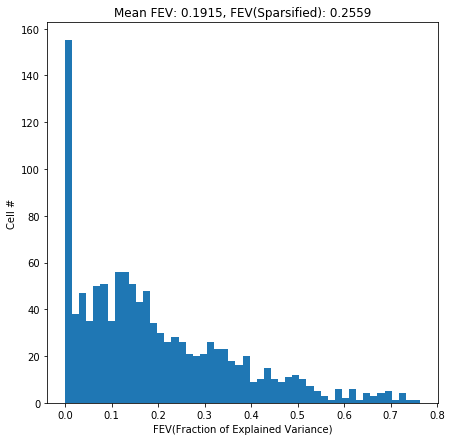

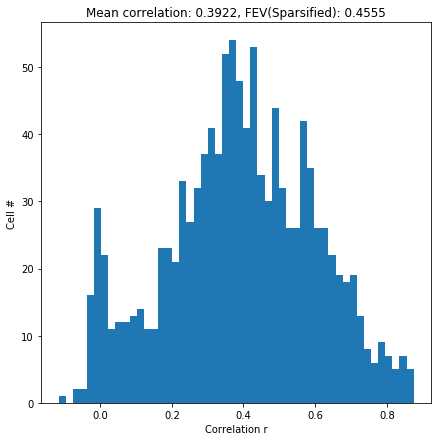

In [195]:
plt.figure(figsize=[7,7])
plt.hist(1-Var_r,bins=50)
plt.title("Mean FEV: %.4f, FEV(Sparsified):% .4f"% ((1-Var_r).mean(),(1-Var_r_sp).mean()))
plt.xlabel("FEV(Fraction of Explained Variance)")
plt.ylabel("Cell #")
plt.savefig("FEV distribution.png")
plt.show()
plt.figure(figsize=[7,7])
plt.title("Mean correlation: %.4f, FEV(Sparsified):% .4f"%(rspCorr.mean(),rspCorr_sp.mean()))
plt.hist(rspCorr,bins=50)
plt.xlabel("Correlation r")
plt.ylabel("Cell #")
plt.savefig("Correlation r distribution.png")
plt.show()

### Goodness of fit correlates with number of significant response

In [249]:
SignSgm3No=((SelAvgRsp>(SelAvgRsp.mean(axis=1)+3*SelAvgRsp.std(axis=1)).reshape((NNSelec,1)))).sum(axis=1)

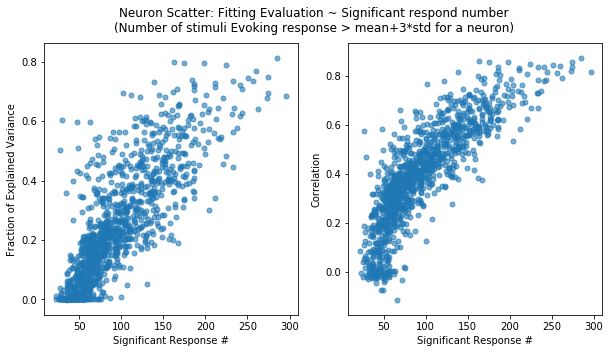

In [256]:
plt.figure(figsize=[10,5])
plt.suptitle("Neuron Scatter: Fitting Evaluation ~ Significant respond number\n(Number of stimuli Evoking response > mean+3*std for a neuron)")
plt.subplot(121)
plt.scatter(SignSgm3No,1-Var_r,s=25,alpha=0.6)
#plt.axis('equal')
plt.ylabel("Fraction of Explained Variance")
plt.xlabel("Significant Response #")
plt.subplot(122)
plt.scatter(SignSgm3No,rspCorr,s=25,alpha=0.6)
plt.ylabel("Correlation")
plt.xlabel("Significant Response #")
#plt.axis('equal')
plt.savefig("SignNoEvalCorr.png")
plt.show()

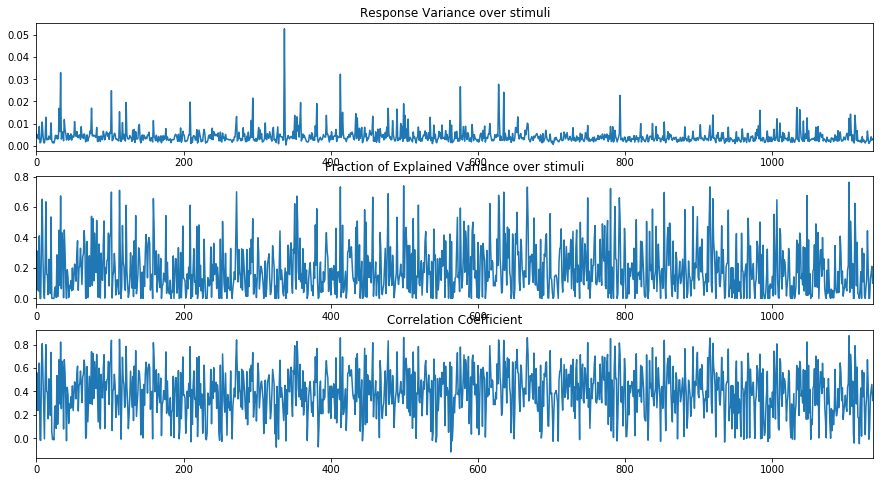

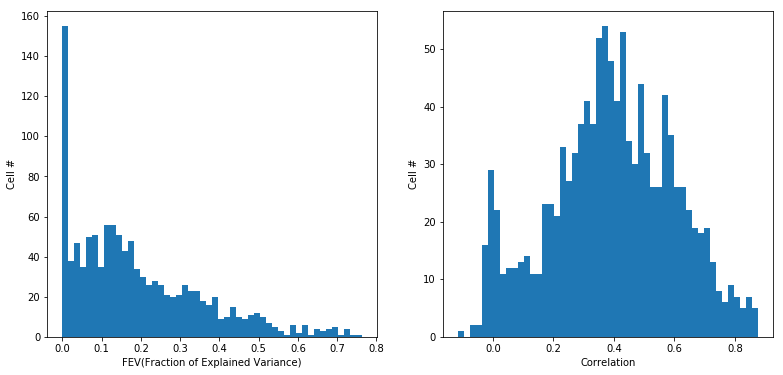

In [206]:
plt.figure(figsize=[15,8])
plt.subplot(311)
plt.plot(cVar)
plt.xlim(0,1137)
plt.title("Response Variance over stimuli")
plt.subplot(312)
plt.plot(1-Var_r)
plt.title("Fraction of Explained Variance over stimuli")
plt.xlim(0,1137)
plt.subplot(313)
plt.plot(rspCorr)
plt.title("Correlation Coefficient")
plt.xlim(0,1137)
plt.figure(figsize=[13,6])
plt.subplot(121)
plt.hist(1-Var_r,bins=50)
plt.xlabel("FEV(Fraction of Explained Variance)")
plt.ylabel("Cell #")
plt.subplot(122)
plt.hist(rspCorr,bins=50)
plt.xlabel("Correlation")
plt.ylabel("Cell #")
plt.show()

### Single Cell Model inspection

In [46]:
rspCorr.argsort() # Rank Ordering of Corr

array([ 383,  145,  563, ...,  667,  915, 1104])

In [201]:
(1-Var_r).argsort()[-300:-1] # Rank Ordering of FEV

array([ 509,   83, 1103,  672,  551,  754,  279,  808,  964,   18,  728,
        938,  426,  395,  800,  281,  193,  503, 1135, 1065,  349,  321,
       1045,   39,  878,  528,  424,  985,  474,  652,  659,  924,  812,
        542,  345, 1022,  673,  979,  186,  510,  307,  770,  237,  564,
        501,  877,  428,  690, 1033,  634,   36,  720,    0,  358,  286,
        607,  835,  396,  505,  514,  626,  901,  316,  641,  980,  604,
        342,  367,  562,  386, 1005,   63,  823,  927,  865,  679, 1038,
        556,  658, 1023,  617,  595,  946,  467, 1037,  394,  583,  114,
        228,  821,  612,  711,   31,   91, 1122,  993, 1085,  507,  241,
         64,  214,  292,  271,  870, 1115,   66,  775,  766,  152,  710,
         69, 1049,  393,  584, 1076, 1120,  733,  869, 1092,  423,  671,
        141,  651,  638,  857, 1093,  154, 1113,  742,    2,  605,   12,
        692,  921,  685, 1107, 1044,  133,   28, 1062,  712,   38,  350,
          7,   88,  346,  150,  148,  425,  153,  7

In [202]:
(1-Var_r).argsort()[:300]

array([ 187,   41,  339,  252,  563,  789, 1111,  210,  383, 1030,   22,
        709,    6, 1079, 1025,  326,  702,  544,  871,   24,  538,  516,
        565,    5,  443,  543,  249, 1131,  158,  831,  969,  848,  115,
        994,  649,  984,  976,   67,  266,  738,  935,  183,  802,  368,
         23, 1063,  686,  923,  231,  784,  219,  466,  949,  142,  801,
        961,  170,  965, 1118, 1121,  986,  957,  194, 1110,   11,  230,
        232,  329,  989,  610,  687,  855,  601,  990, 1073,  952, 1126,
        645,  996, 1052,  813, 1027,  309, 1132,  259,  421,  696,  203,
        781,  226,  591,  539,  145,  536,   68,  797,   21, 1009,  752,
        324,  560,  880, 1083,  103,  566,   87,  440,  777,  695,  248,
         93,  444,  599,  511,  125,  197, 1081,  299,  408,  251,  449,
         44,   84,  555,   70,  486,  684,  195,  884, 1008,  945,  238,
        703,  827,  803,  588,   27,  941,  889,  414,   37, 1078,  689,
        384, 1048,  336,   16,  458, 1001, 1072,  6

In [217]:
(SelAvgRsp[:,nind]>0).sum(axis=1)

array([269, 566, 494, ..., 520, 314, 442])

In [209]:
# Test if the worst fit neurons has very few peaks signal
SignNo[(1-Var_r).argsort()[:300]]

array([ 393,  299,    4,  108,  124,  157,   36,   24,  141,  131,   36,
        144,   47,   84,  114,   98,   14,  110,  135,   43,   43,   89,
         56,   47,   85,  148,  159,   51,  160,  150,   88,  164,  127,
        105,  130,  200,  171,  124,   81,  145,   75,   61,  130,  188,
        117,  130,  178,   71,  137,  135,   63,   87,   58,   70,  122,
        158,   81,   69,  142,  112,  161,  142,  133,  162,   28,   31,
        149,   22,   82,  185,  100,   54,  175,   70,  160,  149,   51,
        111,  161,  230,  191,  184,  283,  192,  347,  276,  158,  260,
        295,  273,  226,  250,  375,  327,  323,  179,  238,  160,  228,
        430,  196,  329,  231,  238,  406,  283,  283,  236,  225,  292,
        278,  324,  386,  231,  624,  178,  373,  315,  215,  299,  288,
        225,  206,  450,  231,  364,  293,  280,  309,  314,  424,  437,
        201,  217,  365,  304,  543,  263,  367,  769,  206,  345,  368,
        372,  594,  419,  656,  288,  424,  435,  3

In [255]:
SignSgm3No[(1-Var_r).argsort()[-300:-1]]

array([124, 101, 107,  74, 106, 148, 139,  68, 112, 111, 128, 109, 113,
       131, 119, 113, 172, 167,  95, 123, 109, 157, 101, 136, 113, 177,
       148, 123, 168, 180, 143, 151, 164,  88, 155, 139, 135, 185, 144,
       158,  43, 137, 160, 155, 144,  72, 156, 145, 186,  61, 163, 135,
       116, 176, 157, 134, 106,  77, 173, 129, 118,  87, 101,  58, 177,
       164, 138,  51,  88, 101, 138,  86, 131,  92, 153, 162, 141, 155,
       186,  98, 139, 145,  47, 125, 186, 127, 170, 111, 158, 141, 118,
        93, 233, 170, 152, 100, 148, 160, 102, 121, 131, 178, 173,  59,
       110, 126, 121,  96, 171,  72, 119, 192,  97, 221, 122,  70, 125,
       152, 179, 148, 107,  63, 185,  78, 122, 123, 152, 151, 149, 104,
       129,  65, 140, 126, 167, 138, 151, 154,  78, 151, 143, 225, 125,
       158,  72, 111, 122, 101, 176, 157, 199, 167, 174, 115, 172,  89,
       135, 159, 164, 131, 153,  27, 124, 144, 137,  91,  49, 198, 146,
       133, 167,  71, 106, 145, 183, 132, 191, 138, 118, 149, 18

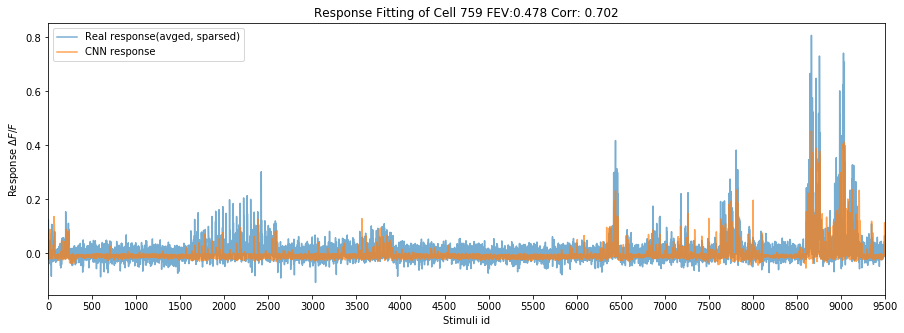

In [204]:
ci=759#44#167#64#1104 #0睫毛tuning 
plt.figure(figsize=[15,5])
plt.plot(SelAvgRsp[ci,:],label="Real response(avged, sparsed)",alpha=0.6)
plt.plot(Rspinfer_np[ci,:],label="CNN response",alpha=0.7)
plt.xlim([0,9501])
plt.xticks(np.arange(0,9501,500))#,np.arange(0,9501,500))
plt.xlabel("Stimuli id")
plt.ylabel(r"Response $\Delta F/F$")
plt.legend()
plt.title("Response Fitting of Cell %d FEV:%.3f Corr: %.3f" % (ci,1-Var_r[ci],rspCorr[ci]))
plt.show()

In [205]:
for ci in range(NNSelec):
    plt.figure(figsize=[15,5])
    plt.plot(SelAvgRsp[ci,:],label="Real response(avged, sparsed)",alpha=0.6)
    plt.plot(Rspinfer_np[ci,:],label="CNN response",alpha=0.7)
    plt.xlim([0,9501])
    plt.xticks(np.arange(0,9501,500))#,np.arange(0,9501,500))
    plt.xlabel("Stimuli id")
    plt.ylabel(r"Response $\Delta F/F$")
    plt.legend()
    plt.title("Response Fitting of Cell %d FEV:%.3f Corr: %.3f\n model_Fact_BN_L11-10_longephparam" 
              % (ci,1-Var_r[ci],rspCorr[ci]))
    plt.savefig(WorkDir+"/Fitting Result/Fitting_c"+str(ci)+".png")
    plt.close()

In [208]:
ci=358
PeakIdx=(SelAvgRsp[ci,:]>0.11).nonzero()[0]
Stimlist=PeakIdx[SelAvgRsp[ci,PeakIdx].argsort()]
Stimlist=Stimlist[::-1]
Rsplist=SelAvgRsp[ci,Stimlist]

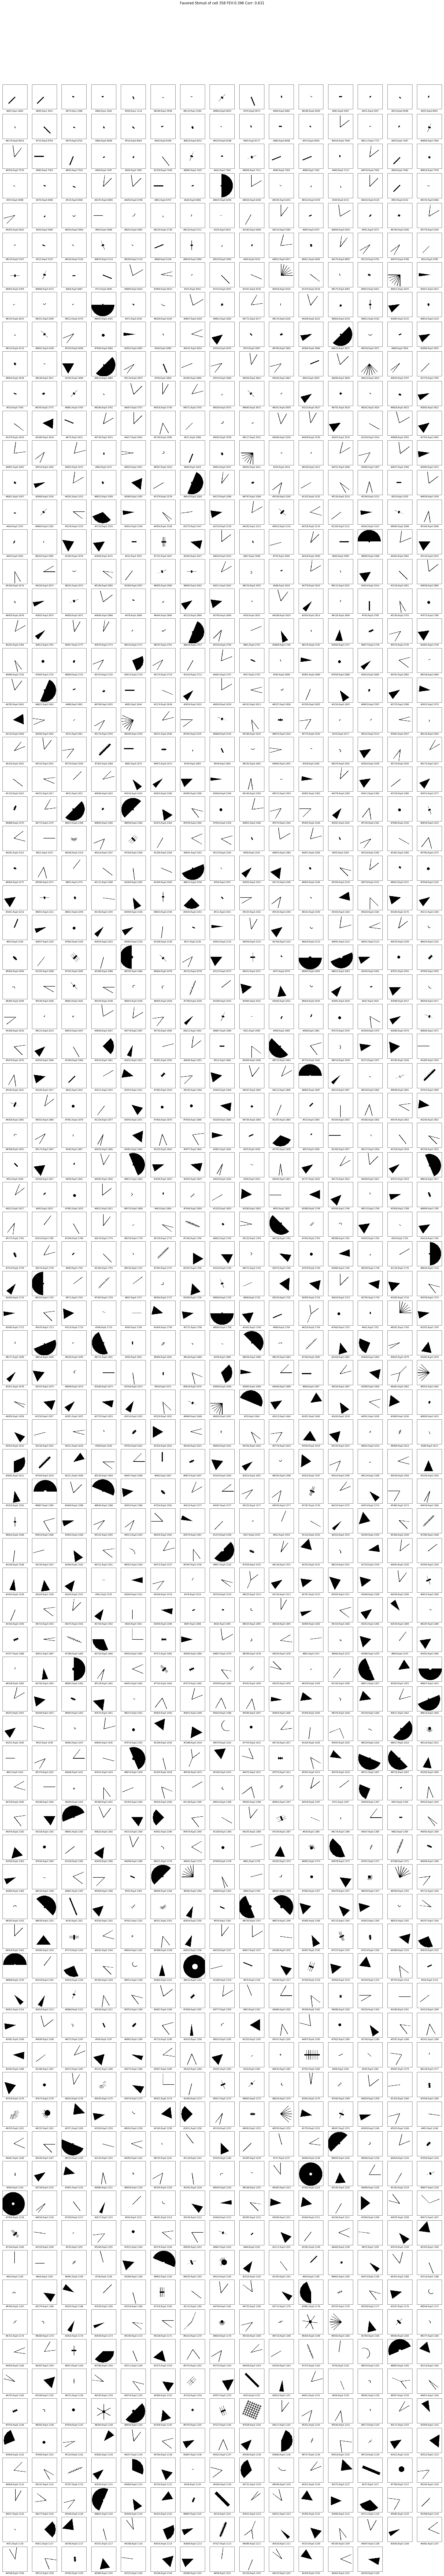

In [209]:
L=len(Stimlist)
H=np.ceil(L/15)
plt.figure(figsize=[30,H*2+1])
#plt.tight_layout()#pad=0.4, w_pad=0.5, h_pad=1.0)
plt.suptitle("Favored Stimuli of cell %d FEV:%.3f Corr: %.3f" % (ci,1-Var_r[ci],rspCorr[ci]),fontsize=15)
for i in range(len(Stimlist)):
    plt.subplot(H,15,i+1)
    si=Stimlist[i]
    plt.imshow(Stimuli[si,:,:],cmap=plt.cm.gray)#,vmin=0,vmax=256)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.xlabel("#%d,Rsp%.4f"%(si,Rsplist[i]),fontsize=9)
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95,
                wspace=0.1, hspace=None)
plt.show()

In [178]:
for ci in range(NNSelec):
    PeakIdx=(SelAvgRsp[ci,:]>0.11).nonzero()[0]
    Stimlist=PeakIdx[SelAvgRsp[ci,PeakIdx].argsort()]
    Stimlist=Stimlist[::-1]
    Rsplist=SelAvgRsp[ci,Stimlist]
    L=len(Stimlist)
    H=np.ceil(L/15)
    plt.figure(figsize=[30,H*2+1])
    plt.suptitle("Favored Stimuli of cell %d FEV:%.3f Corr: %.3f" % (ci,1-Var_r[ci],rspCorr[ci]),fontsize=14)
    for i in range(len(Stimlist)):
        plt.subplot(H,15,i+1)
        si=Stimlist[i]
        plt.imshow(Stimuli[si,:,:],cmap=plt.cm.gray,vmin=0,vmax=256)
        plt.xticks([],[])
        plt.yticks([],[])
        plt.xlabel("#%d,Rsp%.4f"%(si,Rsplist[i]),fontsize=9)
    plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95,
                wspace=0.1, hspace=None)
    plt.savefig(WorkDir+"/Favor_Stim/FavorStim_c"+str(ci)+".png")
    plt.close()

KeyboardInterrupt: 

### View Localized mask

In [456]:
Lpl=Variable(torch.Tensor([[0,1,0],[1,-4,1],[0,1,0]]))
F.conv2d(Variable(spmsk.contiguous().view((1,1,33,33))),Lpl.view((1,1,3,3))).norm(p=2)

Variable containing:
 28.2819
[torch.FloatTensor of size 1]

In [473]:
rspmean=SparsSelAvgRsp.mean(dim=1)

In [474]:
rspmean.numpy().argmax()

337

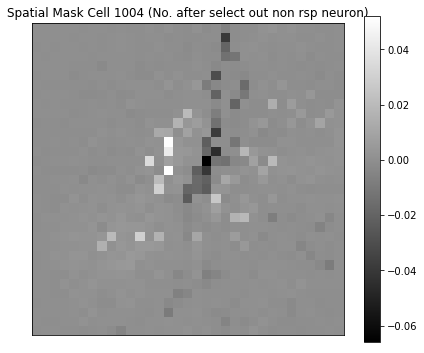

In [201]:
ci=1004# 601
spmsk=modelvis.spatialmsk.data[:,ci]
plt.figure(figsize=[7,6])
plt.title("Spatial Mask Cell %d (No. after select out non rsp neuron)" % ci)
plt.pcolor(spmsk.contiguous().view((33,33)),cmap=plt.cm.gray)
plt.xticks([],[])
plt.yticks([],[])
plt.axis('square')
plt.colorbar()
plt.show()

In [77]:
for ci in range(1137):#750#330#335#290#345
    spmsk=modelvis.spatialmsk.data[:,ci]
    plt.figure(figsize=[7,6])
    plt.title("Spatial Mask Cell %d (No. after select out non rsp neuron)" % ci)
    plt.pcolor(spmsk.contiguous().view((33,33)),cmap=plt.cm.gray)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.axis('square')
    plt.colorbar()
    #plt.show()
    plt.savefig(WorkDir+"/CellMaskFit_BN_LT/Model_FactBN_Mask_c"+str(ci)+".png")
    plt.close()

In [119]:
val=5
for ci in range(1137):#750#330#335#290#345
    spmsk=modelvis.spatialmsk.data[:,ci]
    plt.figure(figsize=[12,7])
    plt.subplot(121)
    plt.title("Spatial Mask Cell %d (No. after select out non rsp neuron)" % ci)
    plt.pcolor(spmsk.contiguous().view((33,33)),cmap=plt.cm.gray)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.axis('square')
    plt.colorbar()
    CellImg=np.zeros((512,512))
    RspArr=np.ones(NNSelec)
    RspArr[ci]=val
    for cj in range(NNSelec):
        rci=CorrTabInv[cj]
        Rsp=RspArr[cj]# in Selected Rsponse it is 1137 
        for pi in range(len(PixList[rci])):
            CellImg[PixList[rci][pi]]=Rsp
    plt.subplot(122)
    plt.imshow(CellImg,cmap="gray")
    #plt.show()
    plt.savefig(WorkDir+"/CellMaskFit_BN_LT_pos/Model_FactBN_Mask+pos_c"+str(ci)+".png")
    plt.close()

### Neuron Position Visulize

In [82]:
CC3std5stdFinal = scipy.io.loadmat(Dir+"/NeuronPosMapping/CC3std5stdFinal.mat")
CC3std5stdFinal = CC3std5stdFinal['CC3std5stdFinal']

In [85]:
tmp=CC3std5stdFinal[0,0]
FigDim=tmp[1]
CellN=tmp[2][0,0]
Pixtmp=tmp[3]
PixList=[0]*CellN
for ci in range(CellN):
    Idx=[ (Pixtmp[0,ci][i,0] % 512,np.int32(Pixtmp[0,ci][i,0] / 512))  for i in range(len(Pixtmp[0,ci]))]
    #Idx=[ np.floor(Pixtmp[0,ci][i] / 512)  for i in range(len(Pixtmp[0,ci]))]
    PixList[ci]=Idx

In [88]:
del tmp,CC3std5stdFinal,Pixtmp,Idx

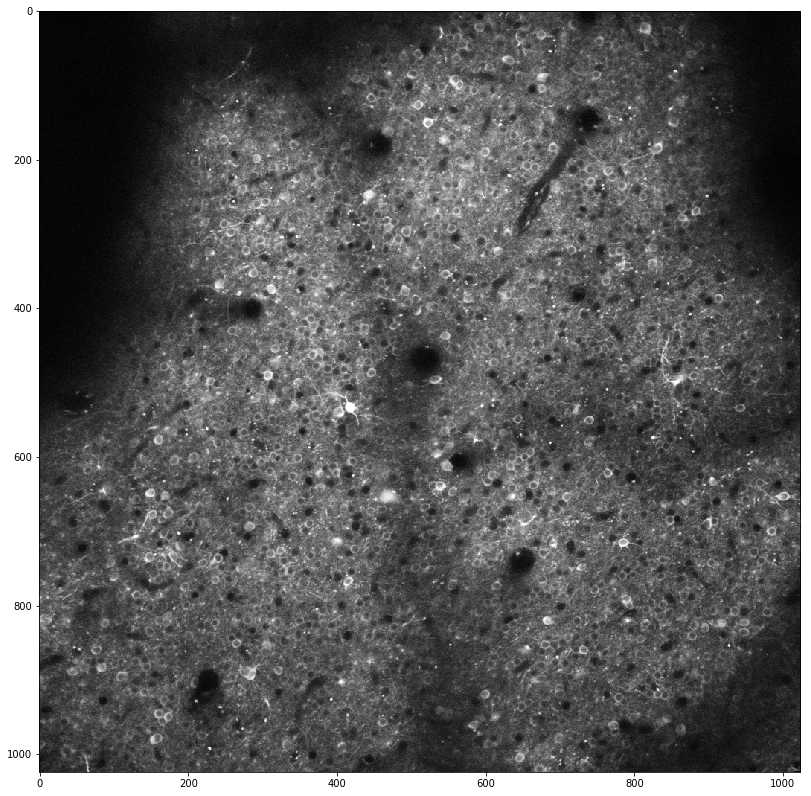

In [93]:
import matplotlib.image as mpimg
from scipy.misc import imresize
ImgingDir=Dir+"/NeuronPosMapping/180-182um.bmp"
img=mpimg.imread(ImgingDir)
plt.figure(1,figsize=[14,14])
plt.imshow(img,cmap="gray")
plt.show()
#imging=Image.open(ImgingDir)

In [115]:
NNSelec=1137
def PlotCellPos(ci,val=5,title="",vlim=(0.9,-0.1)):
    vmax,vmin=vlim
    CellImg=np.zeros((512,512))
    RspArr=np.ones(NNSelec)
    RspArr[ci]=val
    for ci in range(NNSelec):
        rci=CorrTabInv[ci]
        Rsp=RspArr[ci]# in Selected Rsponse it is 1137 
        for pi in range(len(PixList[rci])):
    #        if not len(PixList[ci][pi])==2:
    #            print("Warning",ci,"pixel",pi)
            CellImg[PixList[rci][pi]]=Rsp
    plt.figure(3,figsize=[8,8]);plt.clf()
    plt.imshow(CellImg,cmap="gray")
    plt.show()

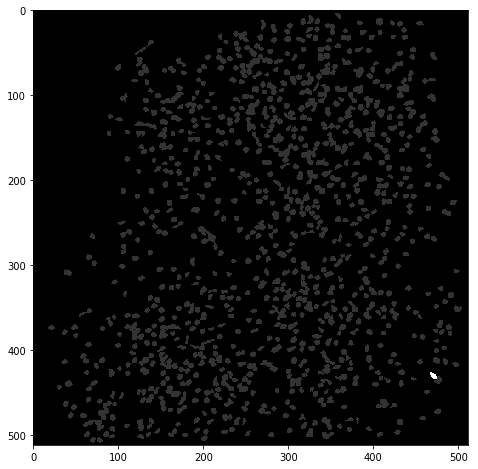

In [116]:
PlotCellPos(1104)

In [ ]:
def PlotRspMap(si,title="",cbarlab="Relative Rsp",vlim=(0.9,-0.1)):
    vmax,vmin=vlim
    if type(si)==int:
        RspArr=SelAvgRsp[:,si];
    elif len(si)==NNSelec:
        RspArr=si
    CellImg=np.zeros((512,512))
    for ci in range(NNSelec):
        rci=CorrTabInv[ci]
        Rsp=RspArr[ci]# in Selected Rsponse it is 1137 
        for pi in range(len(PixList[rci])):
    #        if not len(PixList[ci][pi])==2:
    #            print("Warning",ci,"pixel",pi)
            CellImg[PixList[rci][pi]]=Rsp
    plt.figure(3);plt.clf()
    plt.imshow(CellImg,cmap="gray")
    if title=="" and type(si)==int:
        plt.title("Stimulus"+str(si))
    elif title!="" and type(si)==int:
        plt.title("Stimulus"+str(si)+" "+title)
    else:
        plt.title(title)
    plt.clim(vmax=vmax,vmin=vmin)
    cbar=plt.colorbar()
    cbar.set_label(cbarlab,fontsize=12)
    ax=plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])

### Stimuli Fitting result inspection

In [915]:
i=np.random.choice(ind,1)[0]
i=1938# 1938 #4165
xi=Variable(StimTsr[i:i+1,:,:,:], volatile=True)
Rspi=Variable(SparsSelAvgRsp[:,i], volatile=True)
Rspinfer=modelvis(xi)
loss = nn.functional.mse_loss(Rspinfer,Rspi)
print("Stimulus #%d, Loss %.6f" %(i,loss.data[0]))

Stimulus #3929, Loss 0.003099


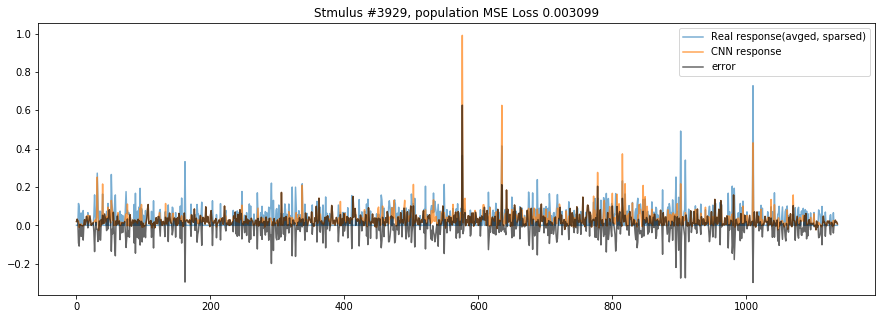

In [916]:
plt.figure(figsize=[15,5])
plt.title("Stmulus #%d, population MSE Loss %.6f" %(i,loss.data[0]))
plt.plot(Rspi.data.numpy(),label="Real response(avged, sparsed)",alpha=0.6)
plt.plot(Rspinfer.data.numpy()[0],label="CNN response",alpha=0.7)
plt.plot(Rspinfer.data.numpy()[0]-Rspi.data.numpy(),color='black',alpha=0.6,label="error")
plt.legend()
plt.show()

### View Model parameters

In [239]:
modelvis.fc1.weight.max()

Variable containing:
 1.2184
[torch.FloatTensor of size 1]

In [425]:
modelvis.conv2.weight.data.mean()

-0.1295009310789324

In [426]:
modelvis.conv1.bias

Parameter containing:
-0.3237
-0.3671
-0.2419
-1.1294
 0.6956
 1.1308
-2.2817
 0.4728
-0.9968
-1.9834
-1.6275
-0.7067
 1.1024
-1.7224
 0.5519
-0.1657
-0.6748
 0.5169
-0.3863
 1.4974
 1.7804
 1.7697
 0.8893
 0.6533
-0.2064
-1.6772
 1.0343
 0.0210
-0.5052
-1.5002
-0.3038
-1.8245
 0.5031
-0.6529
 0.2764
 0.8547
-2.7376
-1.1429
 1.3860
-0.4562
[torch.FloatTensor of size 40]

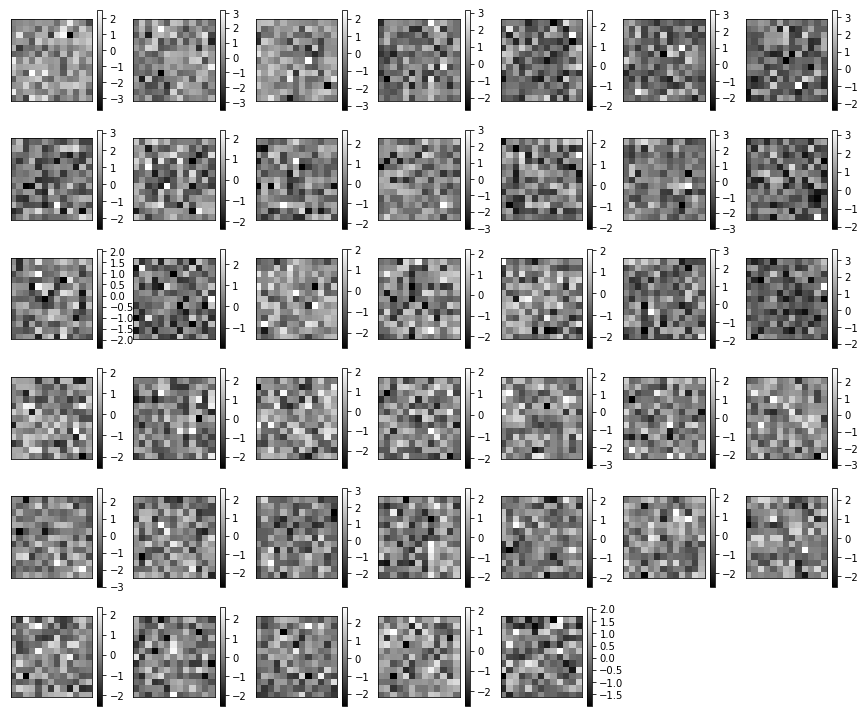

In [72]:
plt.figure(figsize=[15,15])
for i in range(40):
    plt.subplot(7,7,i+1)
    plt.pcolor(modelvis.conv1.weight.data[i,0,:,:],cmap=plt.cm.gray)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.axis('square')
    plt.colorbar()
plt.show()

### View Activation

In [523]:
modelvis.conv2.weight.std()

Variable containing:
 0.9986
[torch.FloatTensor of size 1]

In [530]:
Activ_2.min()

Variable containing:
-1556.8813
[torch.FloatTensor of size 1]

In [535]:
modelvis.conv2.weight.data[:,1,:,:].std()

1.0235485397182813

In [547]:
modelvis.conv2.weight.data[:,28,:,:]


(0 ,.,.) = 
 -5.1165e-01 -1.4331e+00 -1.7805e+00 -8.9007e-01 -4.4061e-01
 -5.5482e-01  4.0849e-01 -7.1568e-03  1.0804e+00  6.7154e-01
 -9.5394e-01  4.1002e-01 -5.6934e-01 -6.1669e-01 -1.5564e+00
 -1.5838e+00 -2.1293e-02  1.5619e+00 -3.7183e-01 -1.2403e+00
 -5.4871e-01  6.9496e-01 -9.4914e-01 -1.3135e-02  2.0676e+00

(1 ,.,.) = 
  1.1344e+00 -5.9832e-01  3.6384e-01  1.6299e-01  6.0279e-02
 -1.0406e+00 -7.3411e-01 -4.4923e-01  3.4408e-02 -1.1304e+00
 -6.2966e-01 -2.9376e-01 -3.0483e-01 -2.0074e+00  2.1974e-01
  3.9670e-01 -3.4338e-01  6.2100e-01 -6.9938e-01  9.8002e-01
 -8.4496e-01  7.5834e-01  4.4756e-01  1.9767e-01 -9.5949e-01

(2 ,.,.) = 
  6.8153e-01 -1.3833e-02  2.4266e-01 -5.0901e-01 -3.0177e-01
  7.1144e-01 -8.2007e-01  7.3123e-01 -8.3068e-01 -4.3807e-01
  8.8956e-02 -8.3246e-01 -2.8689e-02 -8.2216e-02 -2.6719e-02
  2.9051e-01 -9.0667e-01 -7.1087e-01  2.1441e-01 -1.2063e+00
 -1.3969e+00 -6.7074e-01 -1.2936e-01 -1.4705e-01  1.3727e+00
...

(37,.,.) = 
 -1.9389e+00 -9.0268e-01  4.8

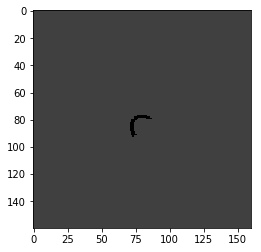

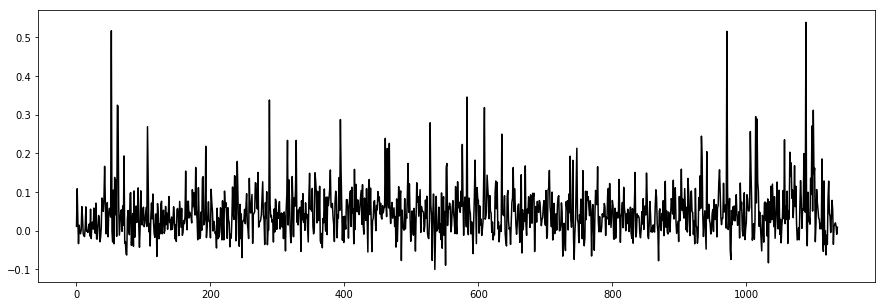

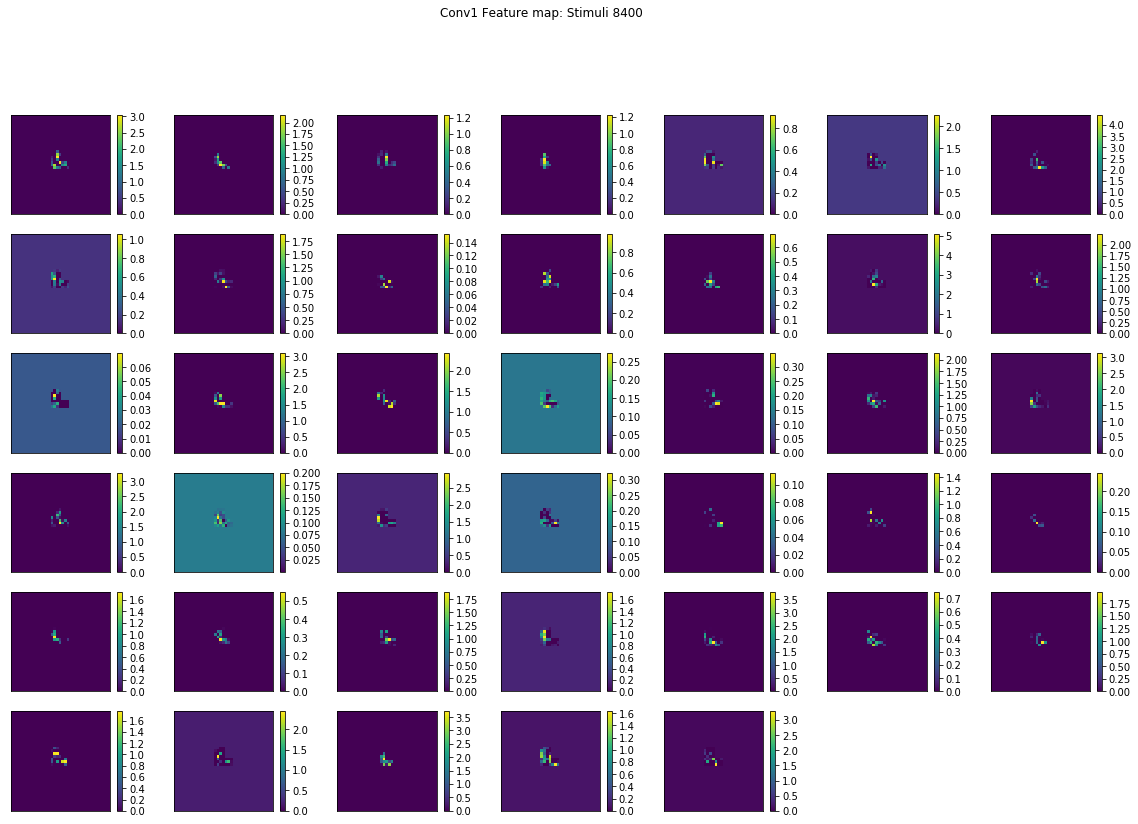

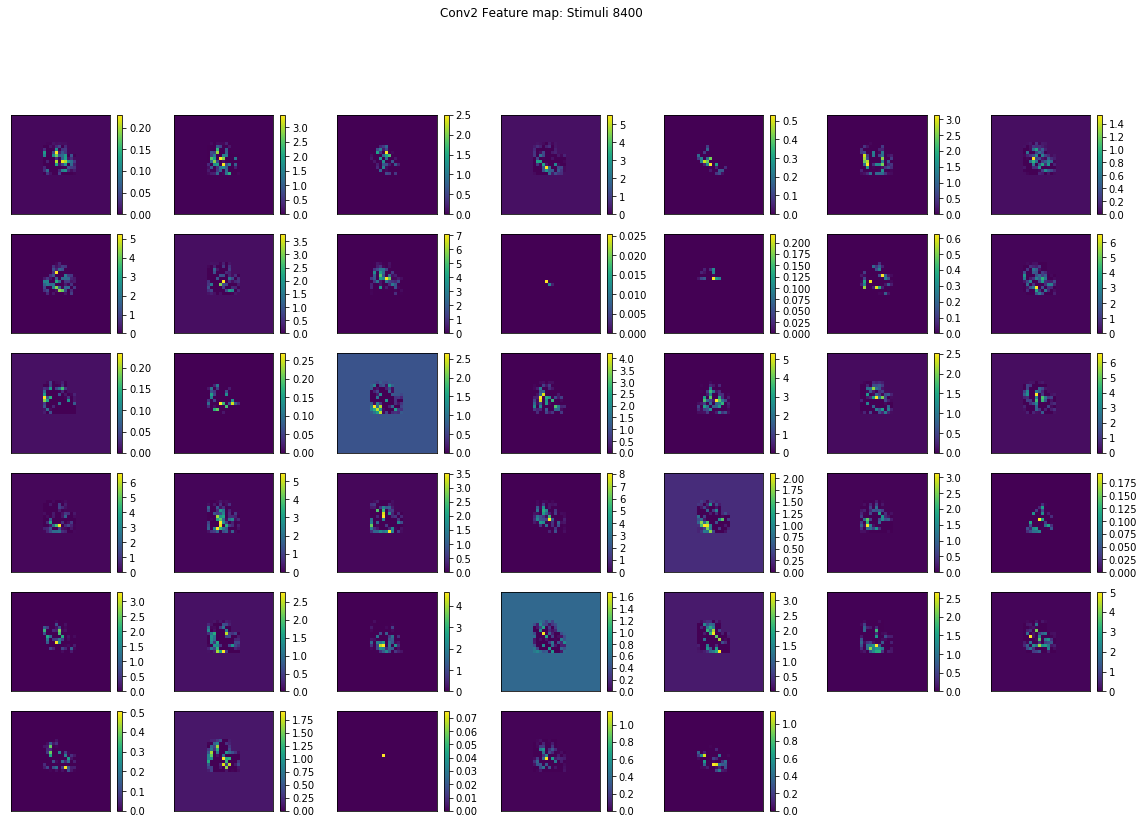

In [74]:
# First Layer Activation
#si=np.random.choice(ind,1)[0]
si=8400
plt.figure()
plt.imshow(Stimuli[si,:,:],cmap=plt.cm.gray,vmin=0,vmax=256)
plt.figure(figsize=[15,5])
#for i in range(8):
#    plt.plot(FullRsp[Msk,i,si],alpha=0.6)# Msk is the selecting mask (omit no response neurons)
plt.plot(SelAvgRsp[:,si],color='black')
plt.show()

xi=Variable(StimTsr[si:si+1,:,:,:], volatile=True)
Rspi=Variable(SparsSelAvgRsp[:,si], volatile=True)
Activ_1=F.relu(modelvis.bn1(modelvis.conv1(xi)))
Activ_2=F.relu(modelvis.bn2(modelvis.conv2(Activ_1)))
plt.figure(figsize=[20,15])
plt.suptitle("Conv1 Feature map: Stimuli %d" %si )
for j in range(40):
    plt.subplot(7,7,j+1)
    plt.pcolor(Activ_1.data[0,j,:,:])#,cmap=plt.cm.gray)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.axis('square')
    plt.colorbar()
plt.figure(figsize=[20,15])
plt.suptitle("Conv2 Feature map: Stimuli %d" %si )
for j in range(40):
    plt.subplot(7,7,j+1)
    plt.pcolor(Activ_2.data[0,j,:,:])#,cmap=plt.cm.gray)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.axis('square')
    plt.colorbar()
plt.show()

### Correlation Matrix in Neural population

In [770]:
Corrmat=np.corrcoef(SelAvgRsp, rowvar=True)

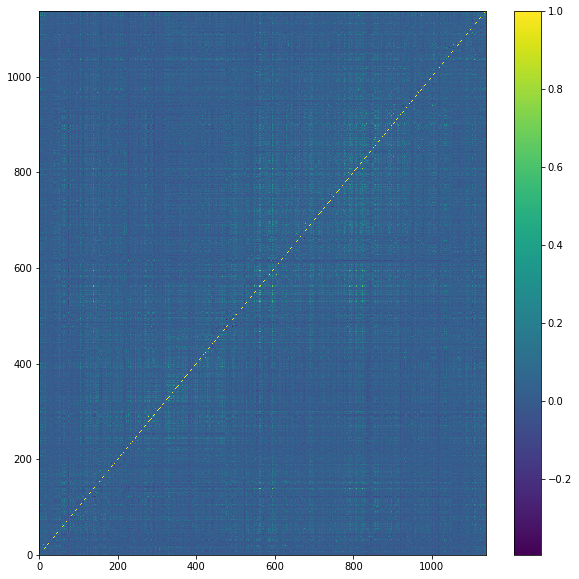

In [772]:
plt.figure(figsize=[10,10])
plt.pcolor(Corrmat)
plt.colorbar()
plt.show()

## Issue & details to discuss

The training Fails majorly because of the **sparsity of signal** !! We are fitting noise now. 
Need a better loss function! 

About Data and Loss
* Sparseness of Data (input and output both). Can we Train well?
* Noisiness of Response Data 
    * Must avoid fitting noise in the end!!
* Which Loss is good for use? MSE (L2) is the easiest

About Training 
* Batch size?
* Now the training

About Model Structure
* Depth? how many convolution layers (now (1 conv 1 pooling 1 relu) 1 Linear regression)
* Size of convolution kernel. 
    * And its relationship to receptive field of V1 neuron
* Other fancy convolution method? 
    * Deformable conv
* Better Linear layer (Too many params now!!!~$10^8$)
* Newer idea other than CNN? [Hinton's Capsule Network](https://medium.com/ai³-theory-practice-business/understanding-hintons-capsule-networks-part-i-intuition-b4b559d1159b)

Other Biological Constraint?
* Differentiate between Inhibitory and Excitatory ?
* Constraint the strength of input

-----------

## Miscelany

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        #self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        #self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if args.cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if args.cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

## Comparing with Pretrained VGG models?

In [2]:
cnn = models.vgg19(pretrained=True).features

In [124]:
y=StimVar[1,0,1,1:5]*torch.from_numpy(1.5)

RuntimeError: from_numpy expects an np.ndarray but got float